walls = red
food = red
bacteria = green

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from random import randint

%matplotlib qt 

def display(A):
    maxX = A.shape[0]
    maxY = A.shape[1]
    B = np.zeros((maxY, maxX,3))
    for ix in range(0,maxX):
        for iy in range(0,maxY):
            B[maxY-1-iy,ix,:] = A[ix,iy,:]
 
    plt.rcParams['figure.figsize'] = [15, 15/maxX*maxY]
    plt.imshow(B); 
    plt.axis('off'); 
    plt.show()
    plt.draw()
    plt.pause(0.01)

In [2]:
def food():
    foodX = np.random.randint(1,maxX-1)
    foodY = np.random.randint(1,maxY-1)
    return [foodX,foodY]
    #food is red

In [3]:
def bacter0(food):
    bacterX = np.random.randint(1,maxX-1)
    bacterY = np.random.randint(1,maxY-1)
    bacter = [bacterX,bacterY]
    if bacter!=foods:
        return [[bacterX,bacterY]]
    else:
        bacter0(food)

    #bacteria is green
    

In [4]:
def move(bacterium): #a single bacterium, all cells move the same way
    global maxX, maxY,A
    newpos = bacterium
    r = np.random.random()
    
    for c in range(0,len(bacterium)):
        
        x0 = bacterium[c][0]
        y0 = bacterium[c][1]
        if r<=0.25:
        #go left
            x = x0-1
            y = y0
        elif r<=0.5:
            #go right
            x = x0+1
            y = y0
        elif r<=0.75:
            #go up
            x = x0
            y = y0+1
        elif r<=1:
            #go down
            x=x0
            y =y0-1
        newpos[c][0]= x
        newpos[c][1]=y
    return newpos

In [5]:
def findNeighbor(x,y):
    n1 = [x-1,y]
    n2 = [x+1,y]
    n3 = [x,y-1]
    n4 = [x,y+1]
    neighbors = [n1,n2,n3,n4]
    neighbors =  [i for i in neighbors if 0<=i[0]<maxX and 0<=i[1]<maxY]
    return neighbors
        
    

In [6]:
def isNeighborFood(bacter,food):
    x = bacter[0]
    y = bacter[1]
    neighbors = findNeighbor(x,y)
    for i in range (0,np.size(neighbors,0)):
        if neighbors[i] == food:
            output = food
            break
        else:
            output = None
    return output

In [7]:
def growth(original,food): 
    new = original
    for i in range(0,len(original)):
        current = original[i] #select one cell within the bacterium and check if it's neighbor is food
        check = isNeighborFood(current,food)
        
        if check is not None:
            new = np.vstack((new,check)) #if the neighbor is food, add to bacteria
            
    original = new
    return original

In [8]:
def checkOutside(bacters):
    new = bacters
    nbacter = len(bacters)
    
    for b in range(0,nbacter):
        valid = [] #0 is valid, 1 is not valid
        for c in range(0,len(bacters[b])):

            if 0<=bacters[b][c][0]<maxX and 0<=bacters[b][c][1]<maxY:
                valid.append(0)
            else:
                valid.append(1)

        check = sum(valid)
        print(valid)
        if check !=0:
            new[b]=None

            
    bactersNew = [i for i in new if i!=None] 
    print(bactersNew)
    return bactersNew

[[[14, 8]], [[10, 11]], [[16, 13]], [[12, 6]], [[12, 7]]]
[14, 8]


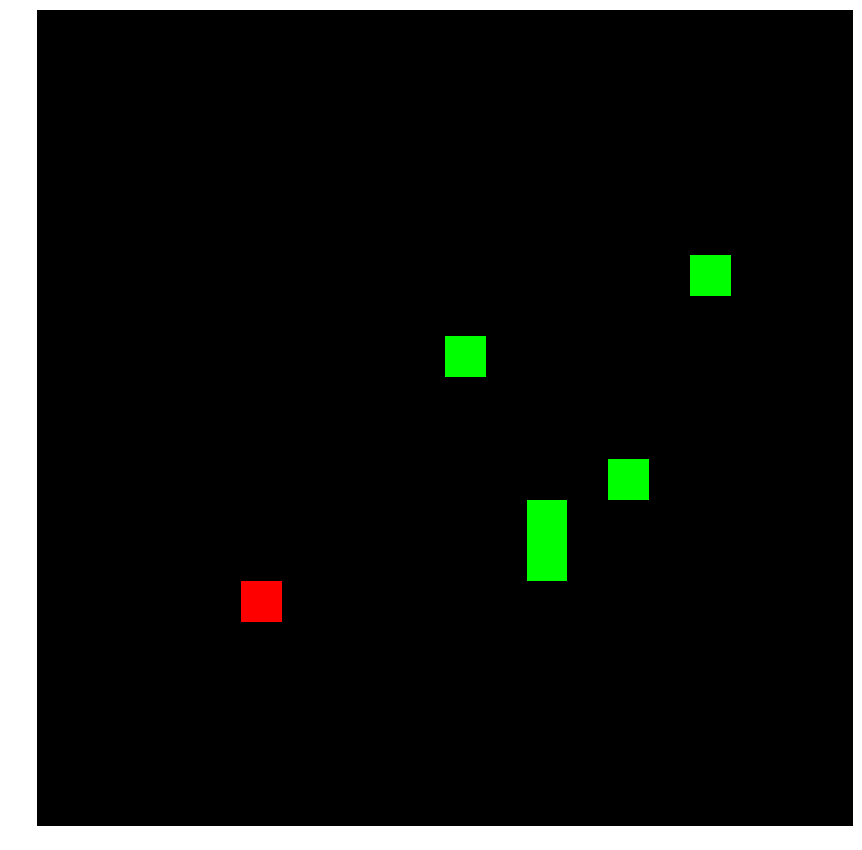

<Figure size 1080x1080 with 0 Axes>

In [9]:
#initial conditions

maxX = maxY = 20

A = np.zeros((maxX, maxY,3))
#A[:,:,:]=255



foods = food()
A[foods[0],foods[0],0]=1. #add in red food
bacterA = bacter0(foods)
bacterB = bacter0(foods)
bacterC = bacter0(foods)
bacterD = bacter0(foods)
bacterE = bacter0(foods)
bacters = [bacterA,bacterB,bacterC,bacterD,bacterE]
print(bacters)
print(bacters[0][0])

for i in range(0,len(bacters)):
    for j in range(0,len(bacters[i])):
        A[bacters[i][j][0],bacters[i][j][1],1] = 1.  #add in green bacteria

display(A)



[0]
[0]
[0]
[0]
[0]
[[[15, 8]], [[11, 11]], [[15, 13]], [[12, 5]], [[13, 7]]]


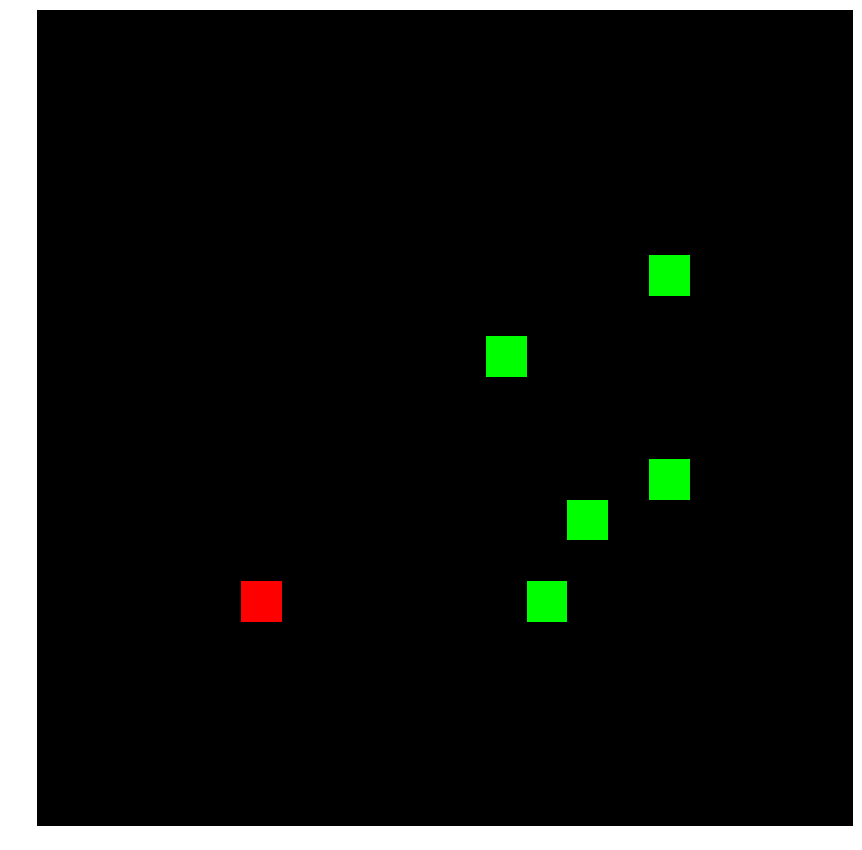

<Figure size 1080x1080 with 0 Axes>

[0]
[0]
[0]
[0]
[0]
[[[15, 9]], [[11, 12]], [[15, 12]], [[13, 5]], [[13, 6]]]


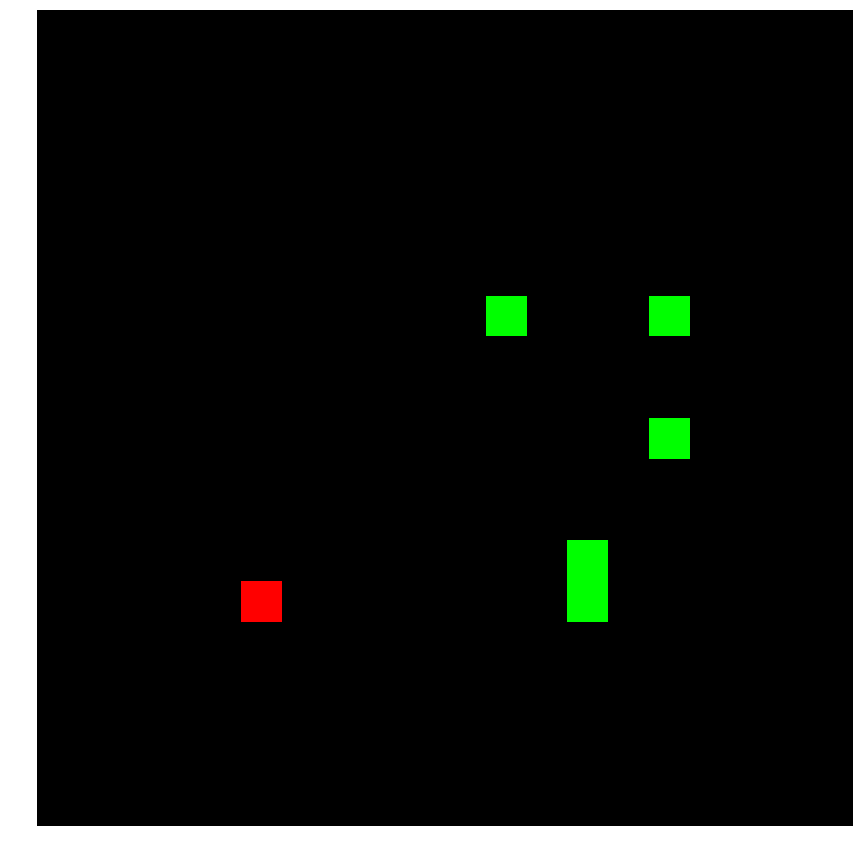

<Figure size 1080x1080 with 0 Axes>

[0]
[0]
[0]
[0]
[0]
[[[15, 8]], [[12, 12]], [[14, 12]], [[12, 5]], [[13, 7]]]


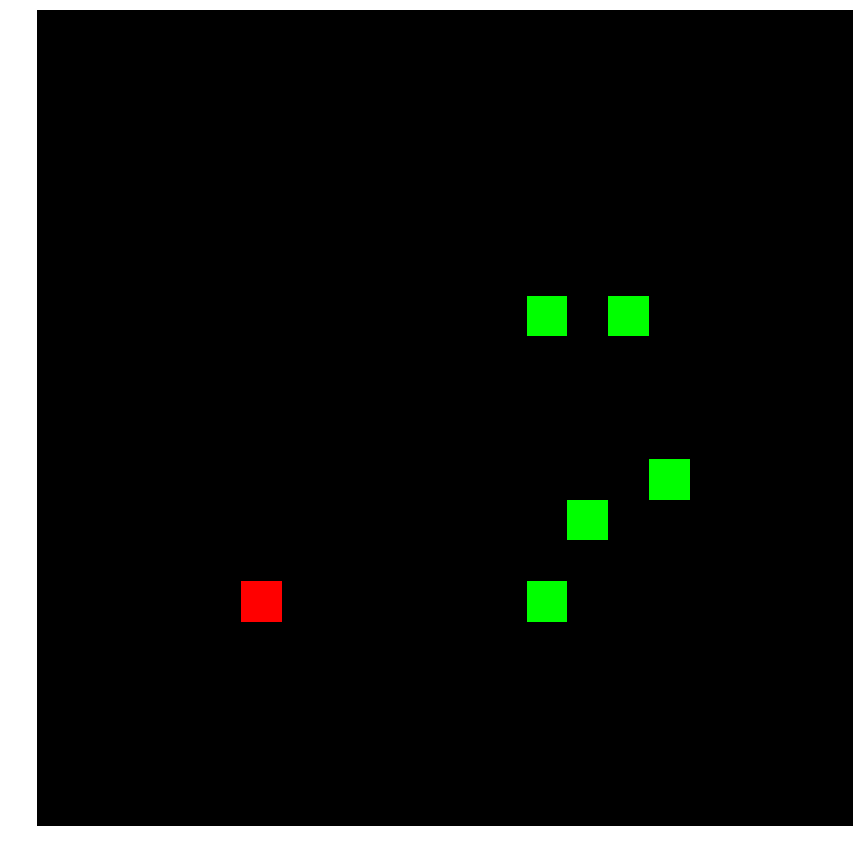

<Figure size 1080x1080 with 0 Axes>

[0]
[0]
[0]
[0]
[0]
[[[15, 9]], [[11, 12]], [[13, 12]], [[12, 6]], [[12, 7]]]


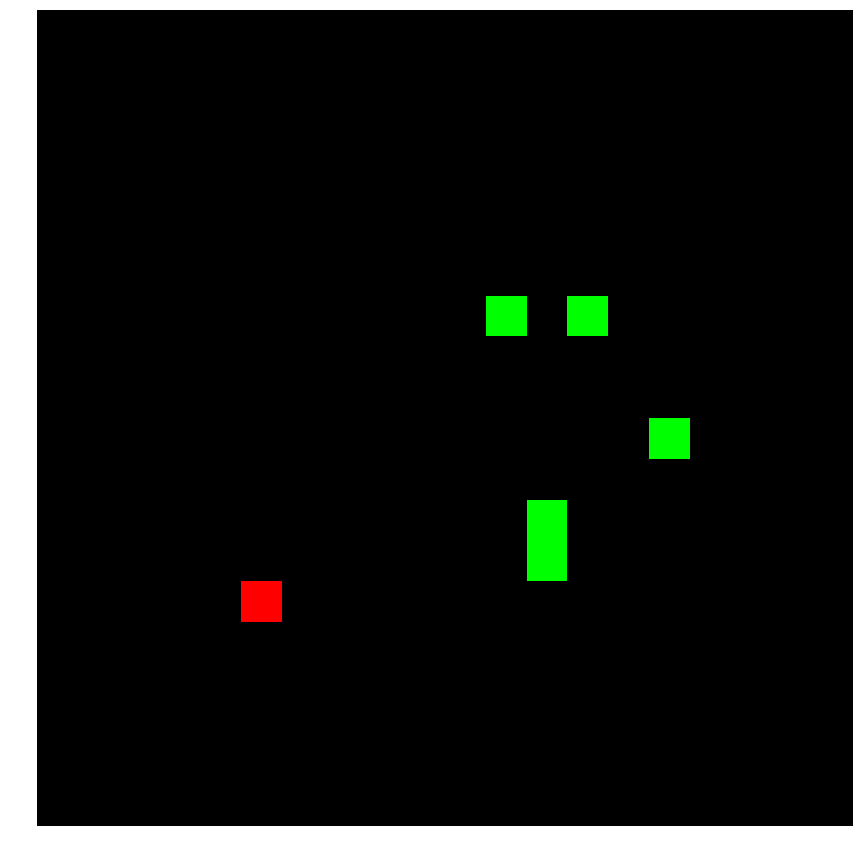

<Figure size 1080x1080 with 0 Axes>

[0]
[0]
[0]
[0]
[0]
[[[14, 9]], [[10, 12]], [[13, 13]], [[12, 5]], [[13, 7]]]


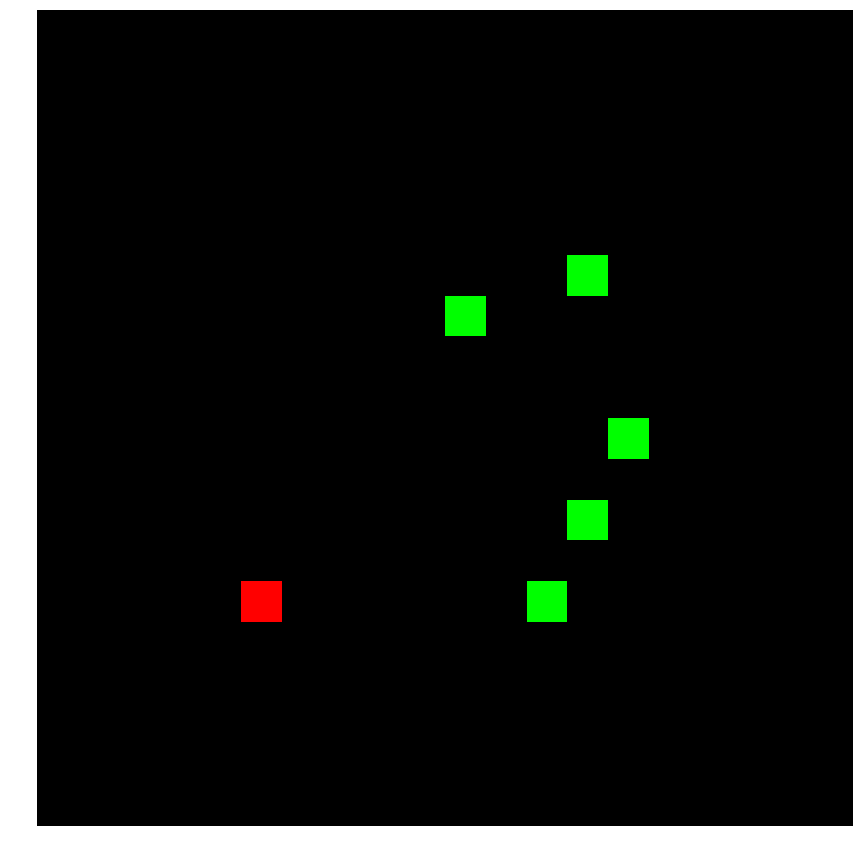

<Figure size 1080x1080 with 0 Axes>

[0]
[0]
[0]
[0]
[0]
[[[14, 10]], [[9, 12]], [[13, 12]], [[12, 4]], [[12, 7]]]


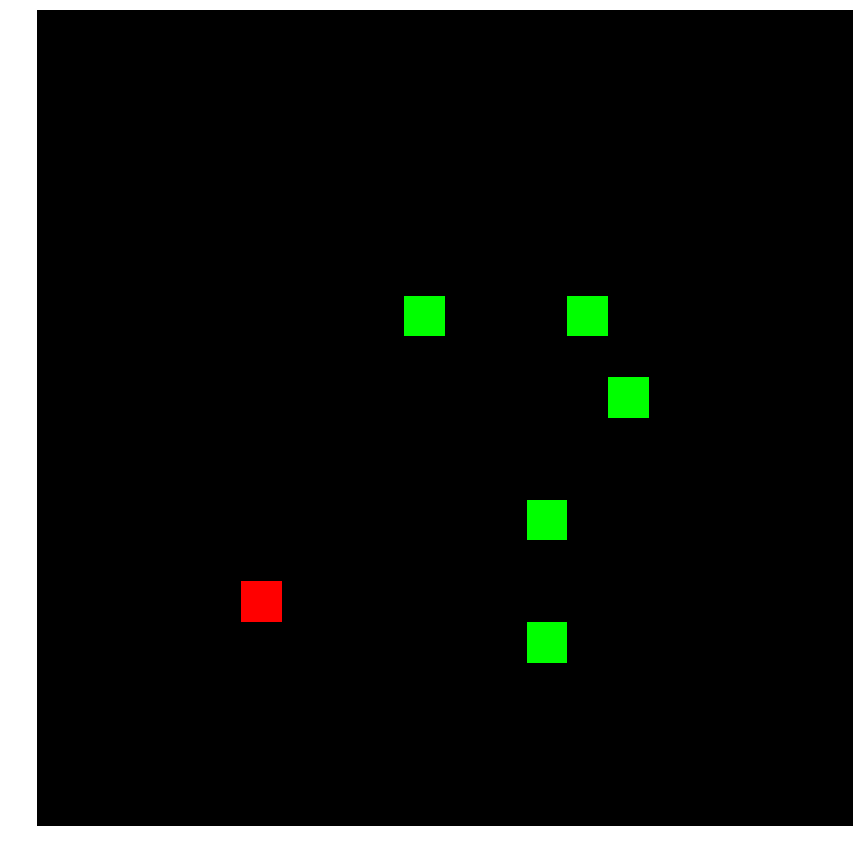

<Figure size 1080x1080 with 0 Axes>

[0]
[0]
[0]
[0]
[0]
[[[14, 11]], [[8, 12]], [[13, 11]], [[12, 5]], [[13, 7]]]


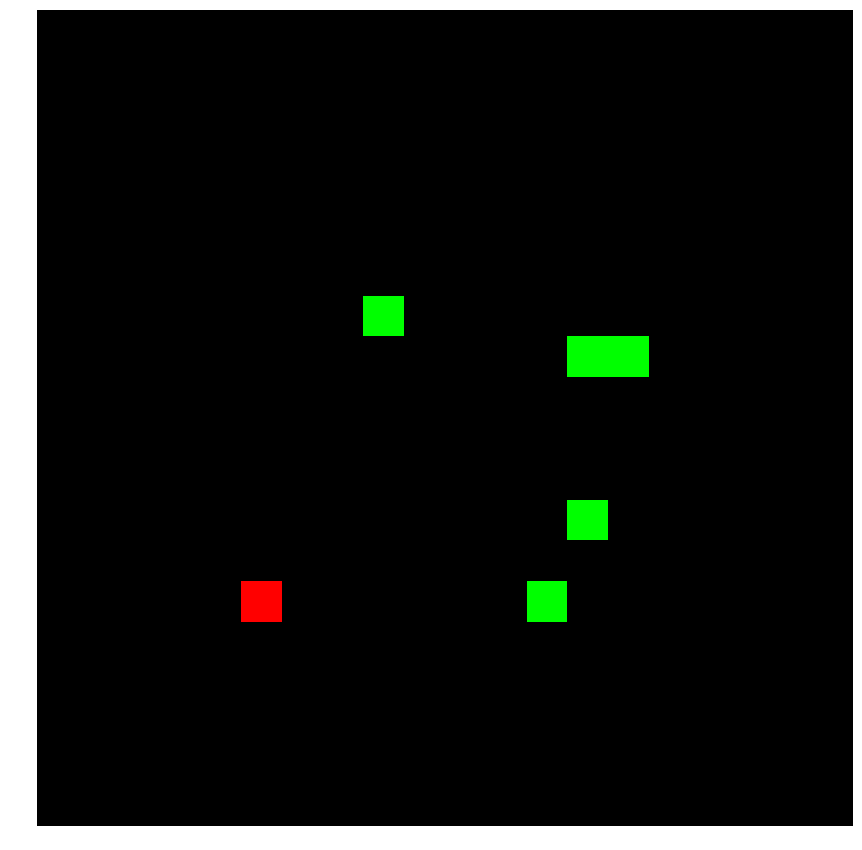

<Figure size 1080x1080 with 0 Axes>

[0]
[0]
[0]
[0]
[0]
[[[14, 10]], [[7, 12]], [[12, 11]], [[11, 5]], [[13, 8]]]


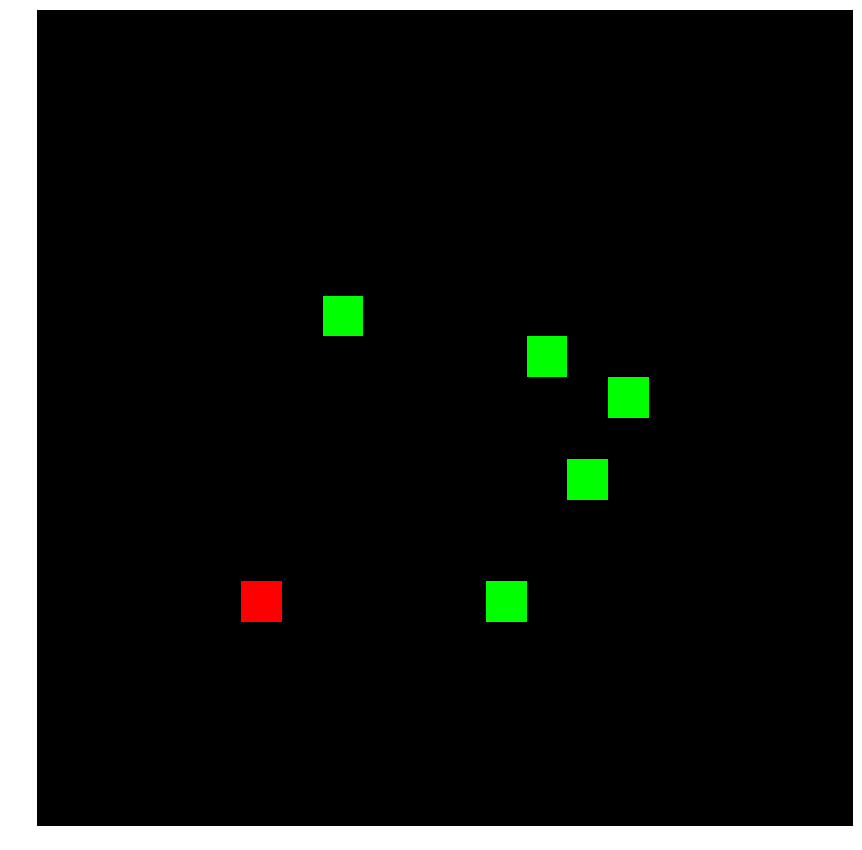

<Figure size 1080x1080 with 0 Axes>

[0]
[0]
[0]
[0]
[0]
[[[15, 10]], [[8, 12]], [[13, 11]], [[11, 6]], [[13, 9]]]


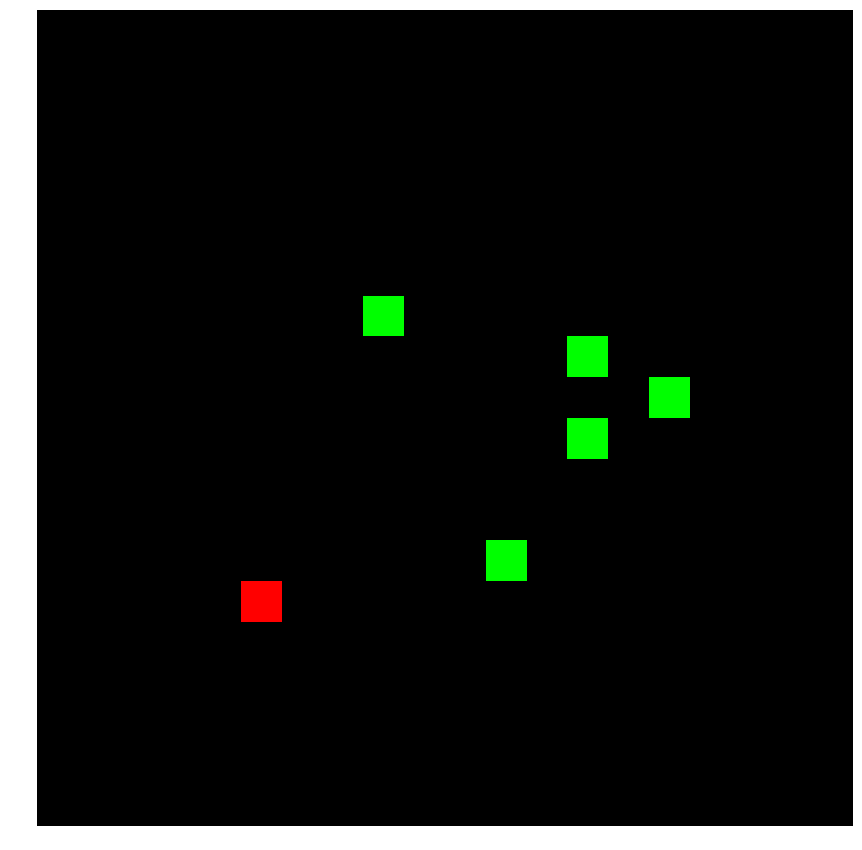

<Figure size 1080x1080 with 0 Axes>

[0]
[0]
[0]
[0]
[0]
[[[16, 10]], [[8, 11]], [[13, 10]], [[10, 6]], [[13, 8]]]


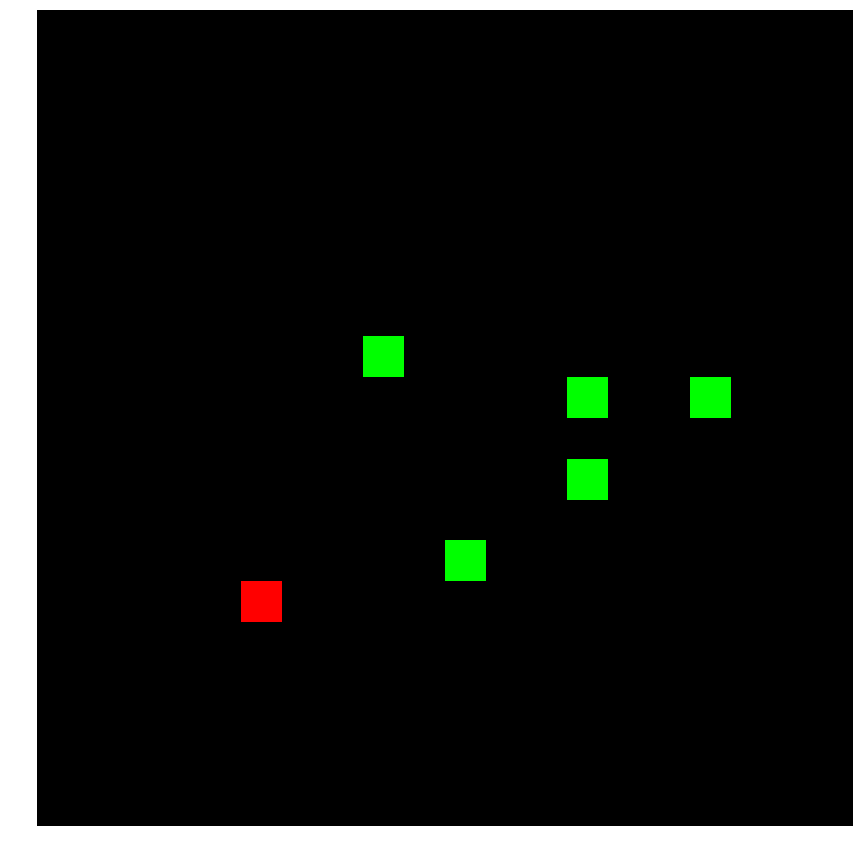

<Figure size 1080x1080 with 0 Axes>

[0]
[0]
[0]
[0]
[0]
[[[15, 10]], [[9, 11]], [[12, 10]], [[9, 6]], [[12, 8]]]


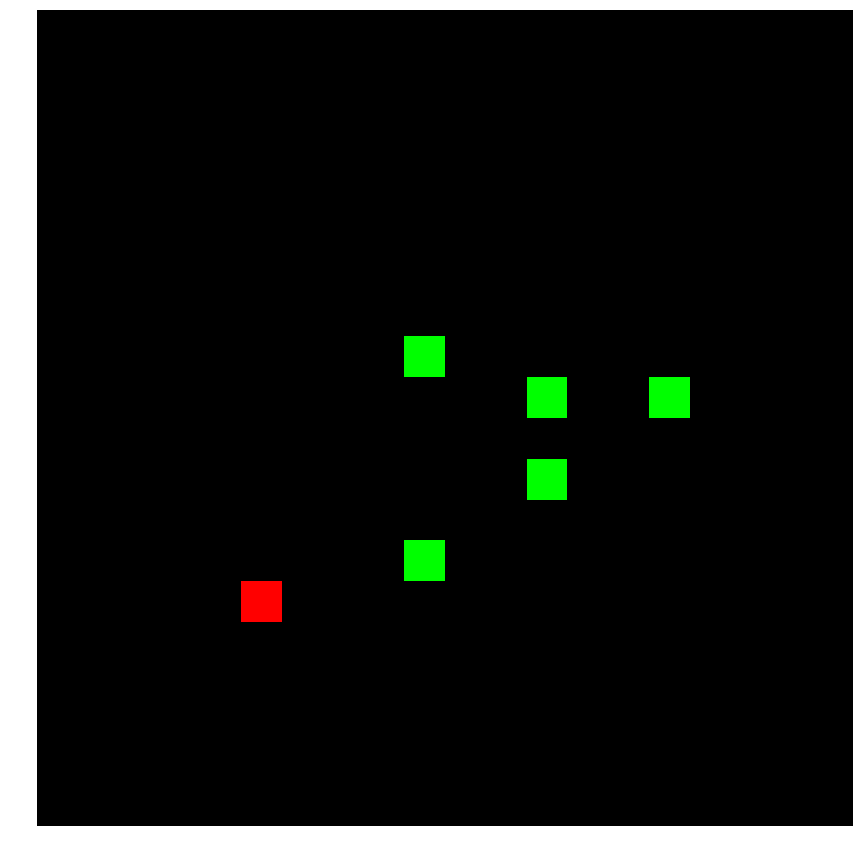

<Figure size 1080x1080 with 0 Axes>

[0]
[0]
[0]
[0]
[0]
[[[16, 10]], [[8, 11]], [[11, 10]], [[10, 6]], [[11, 8]]]


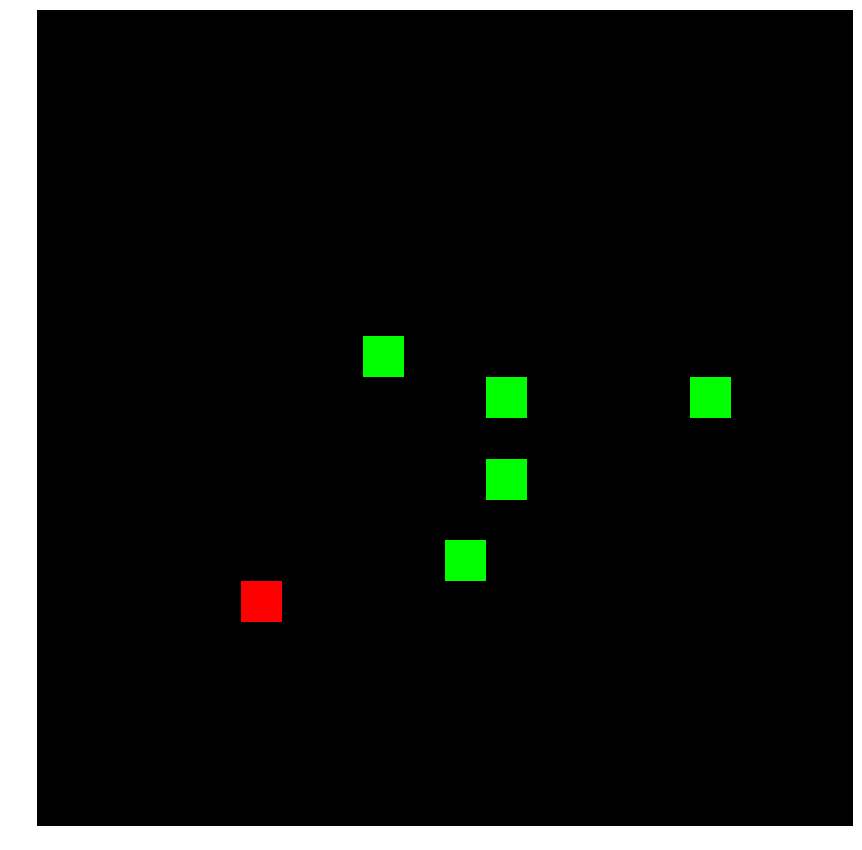

<Figure size 1080x1080 with 0 Axes>

[0]
[0]
[0]
[0]
[0]
[[[15, 10]], [[7, 11]], [[12, 10]], [[10, 7]], [[12, 8]]]


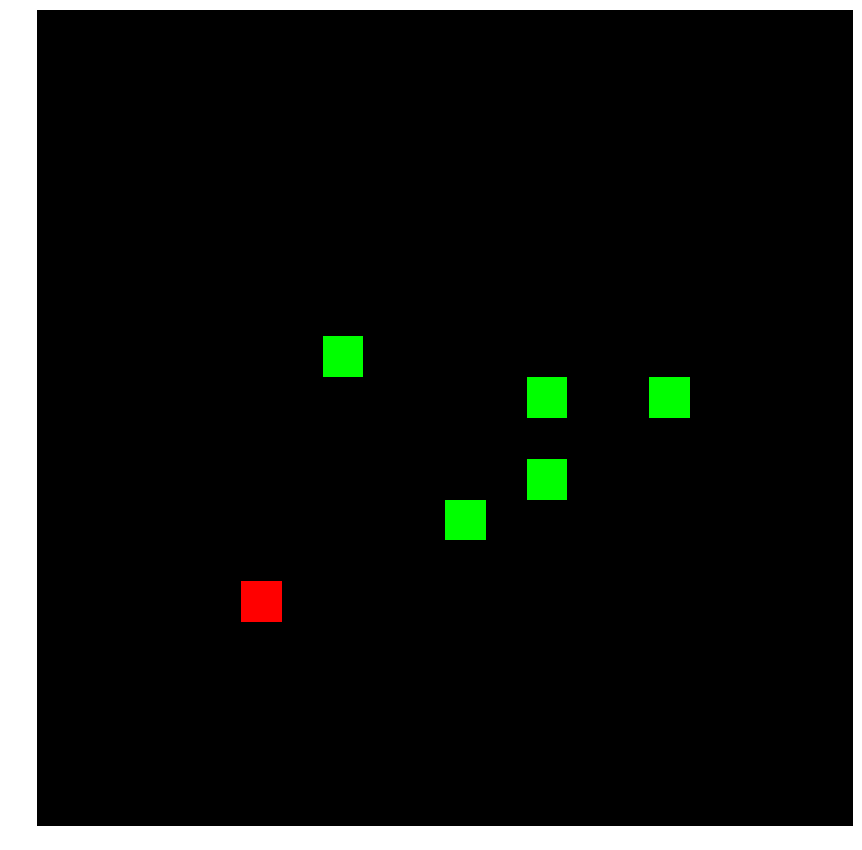

<Figure size 1080x1080 with 0 Axes>

[0]
[0]
[0]
[0]
[0]
[[[16, 10]], [[8, 11]], [[12, 9]], [[10, 8]], [[12, 7]]]


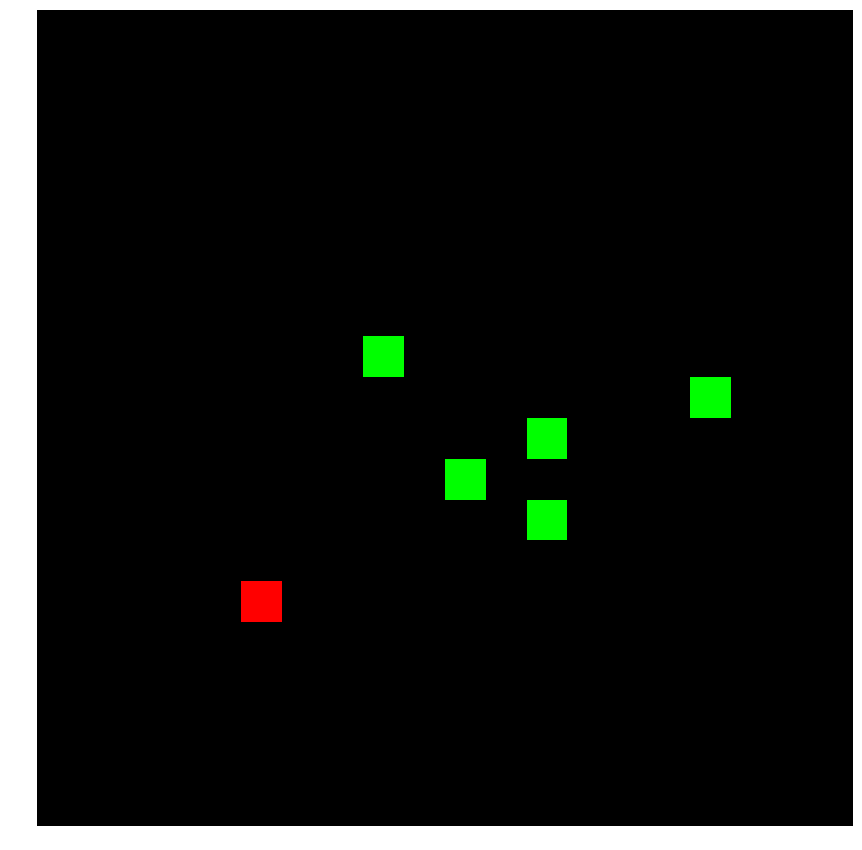

<Figure size 1080x1080 with 0 Axes>

[0]
[0]
[0]
[0]
[0]
[[[16, 9]], [[8, 12]], [[11, 9]], [[10, 9]], [[12, 6]]]


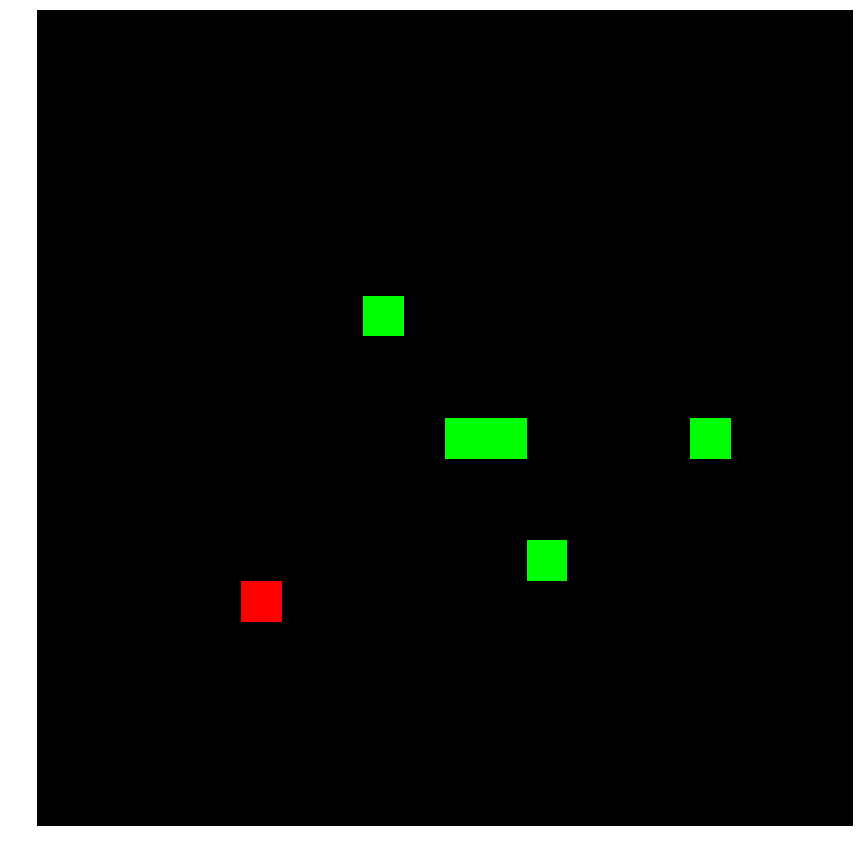

<Figure size 1080x1080 with 0 Axes>

[0]
[0]
[0]
[0]
[0]
[[[15, 9]], [[8, 11]], [[11, 8]], [[9, 9]], [[13, 6]]]


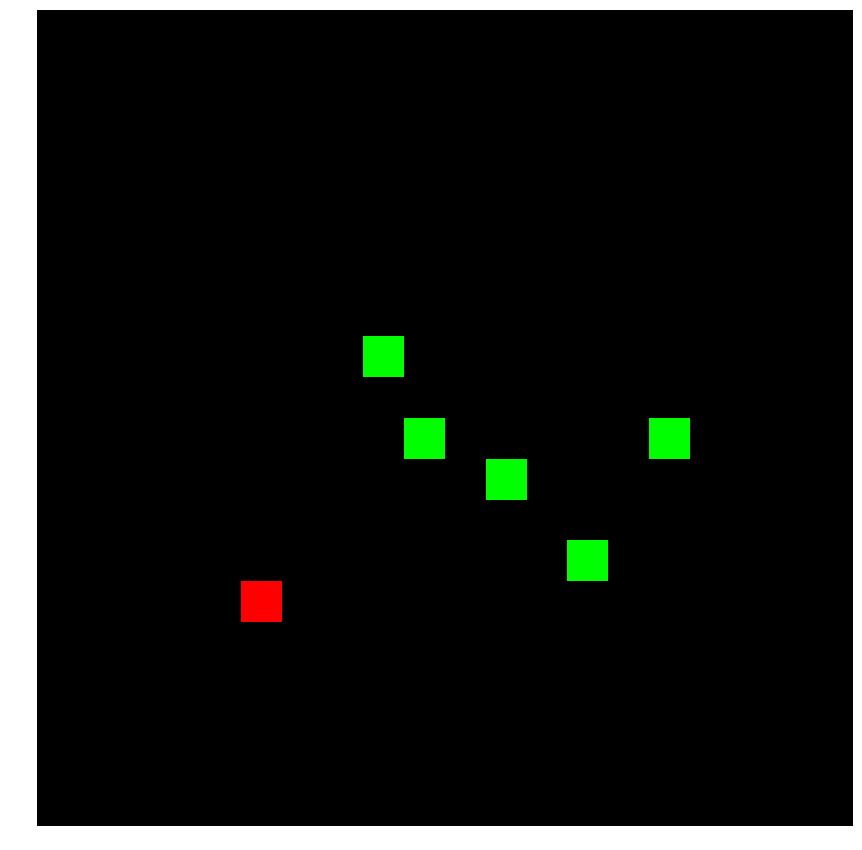

<Figure size 1080x1080 with 0 Axes>

[0]
[0]
[0]
[0]
[0]
[[[15, 10]], [[8, 12]], [[11, 7]], [[9, 10]], [[12, 6]]]


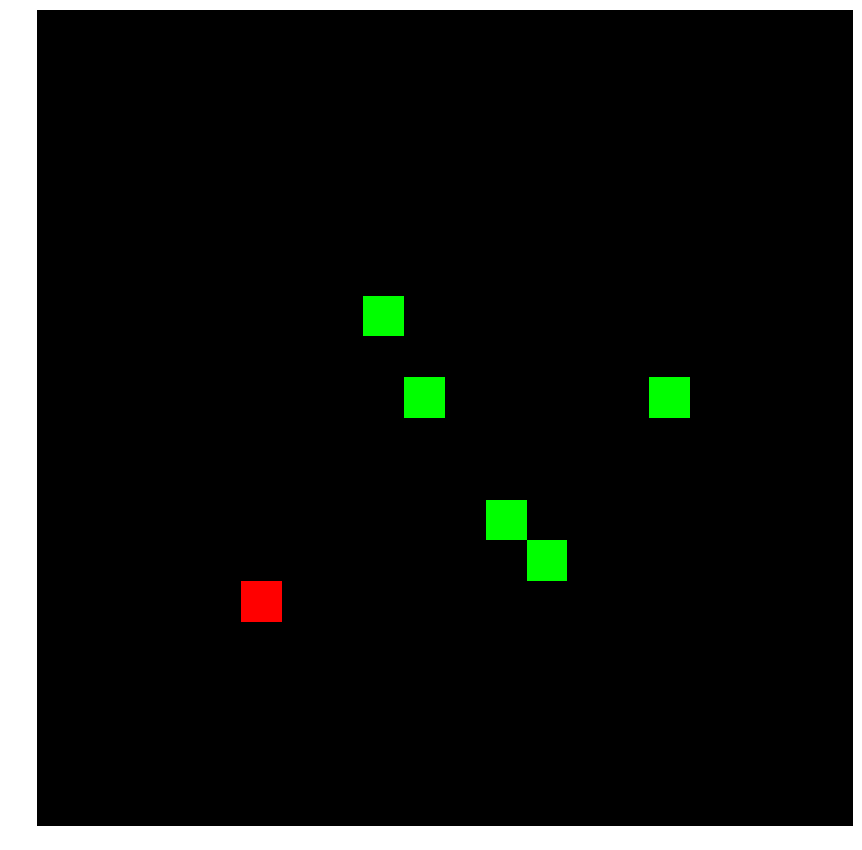

<Figure size 1080x1080 with 0 Axes>

[0]
[0]
[0]
[0]
[0]
[[[16, 10]], [[8, 13]], [[11, 8]], [[10, 10]], [[12, 7]]]


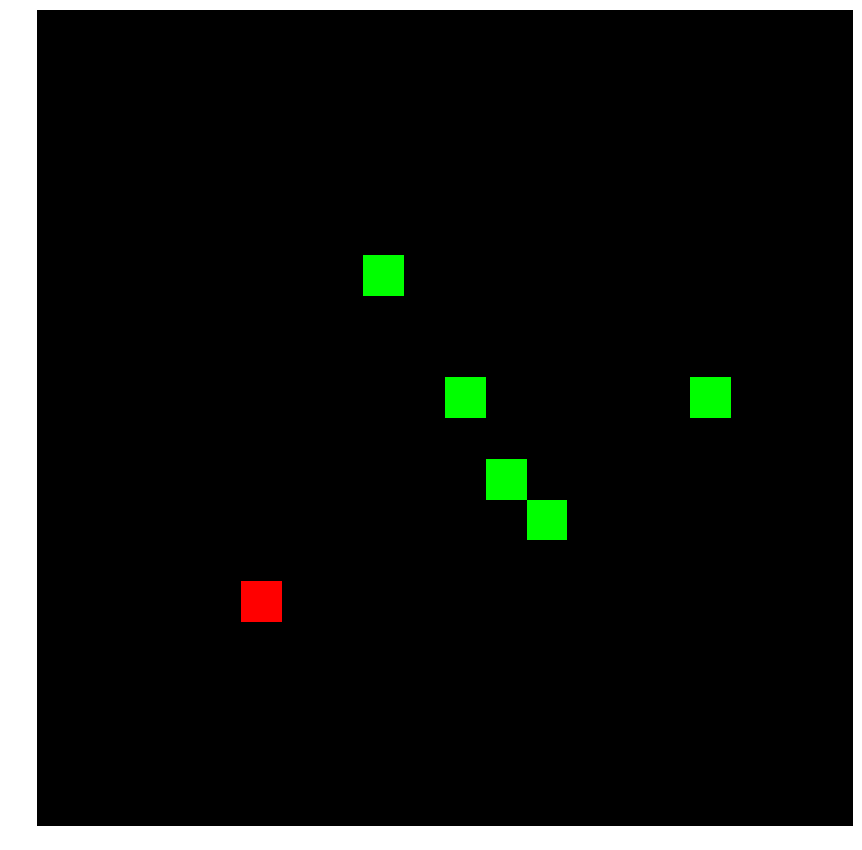

<Figure size 1080x1080 with 0 Axes>

[0]
[0]
[0]
[0]
[0]
[[[16, 11]], [[8, 14]], [[12, 8]], [[9, 10]], [[12, 6]]]


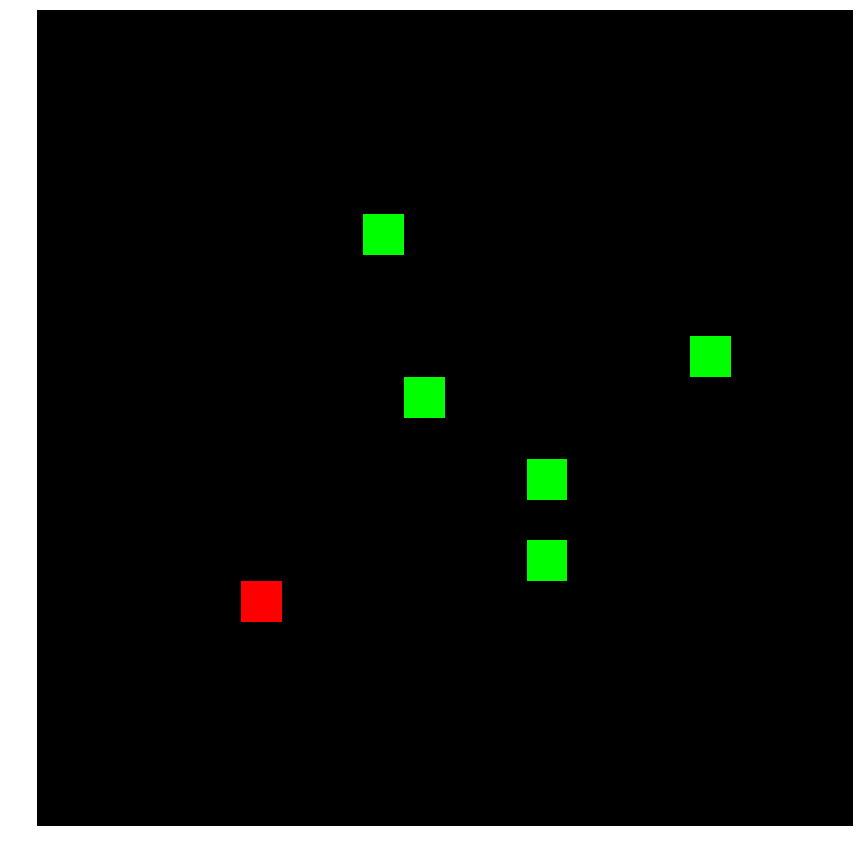

<Figure size 1080x1080 with 0 Axes>

[0]
[0]
[0]
[0]
[0]
[[[15, 11]], [[9, 14]], [[12, 9]], [[9, 11]], [[12, 7]]]


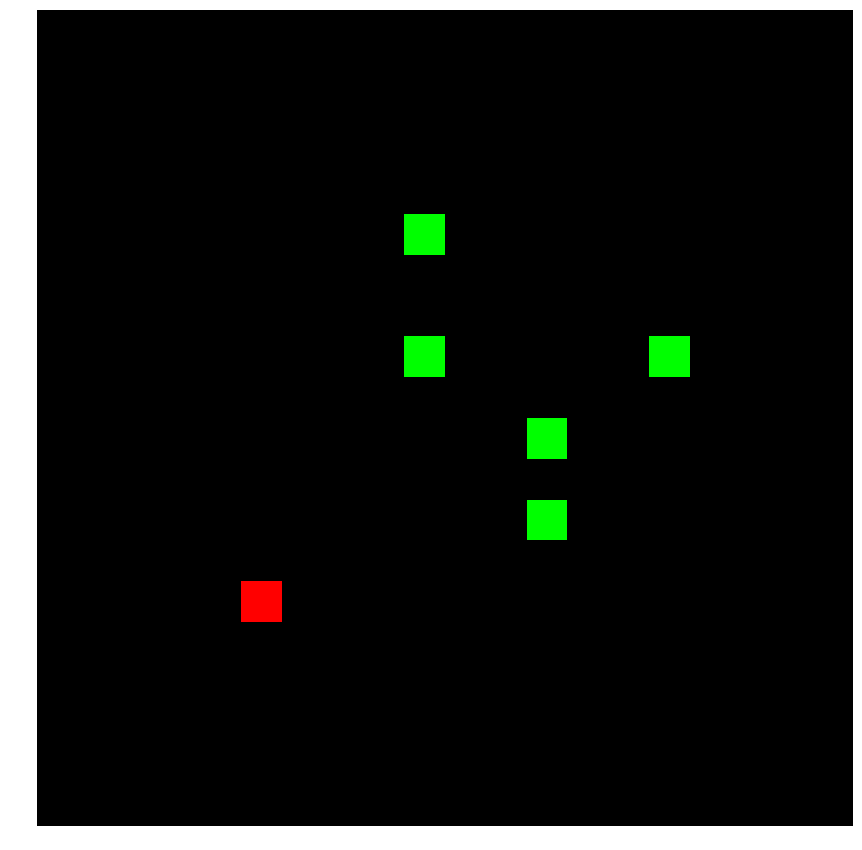

<Figure size 1080x1080 with 0 Axes>

[0]
[0]
[0]
[0]
[0]
[[[15, 10]], [[10, 14]], [[13, 9]], [[8, 11]], [[11, 7]]]


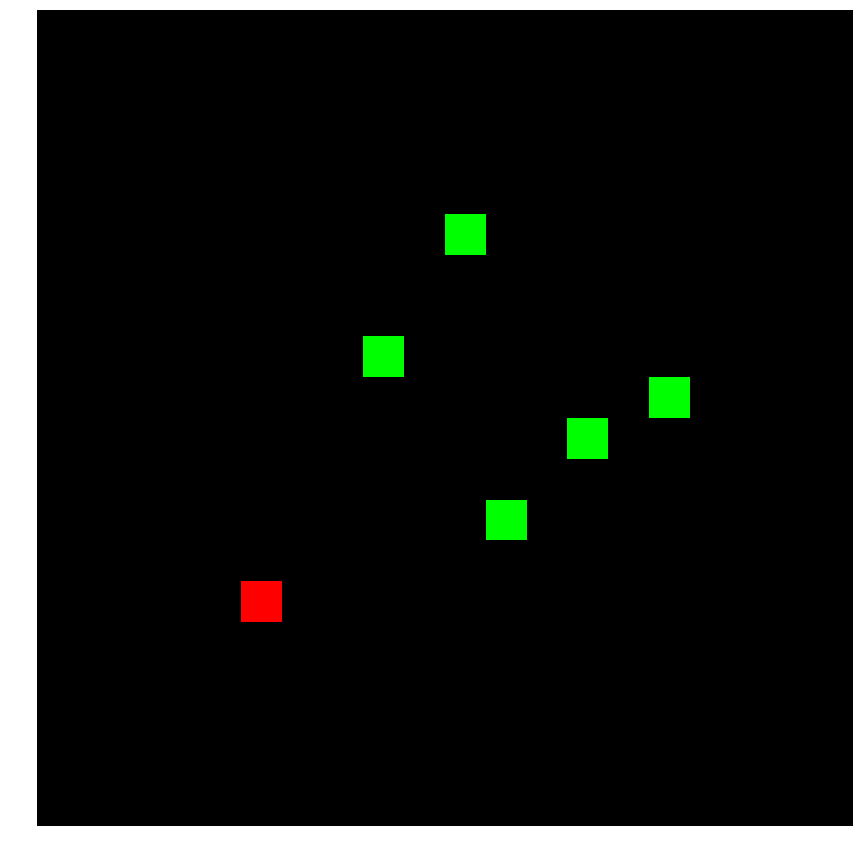

<Figure size 1080x1080 with 0 Axes>

[0]
[0]
[0]
[0]
[0]
[[[14, 10]], [[11, 14]], [[14, 9]], [[9, 11]], [[10, 7]]]


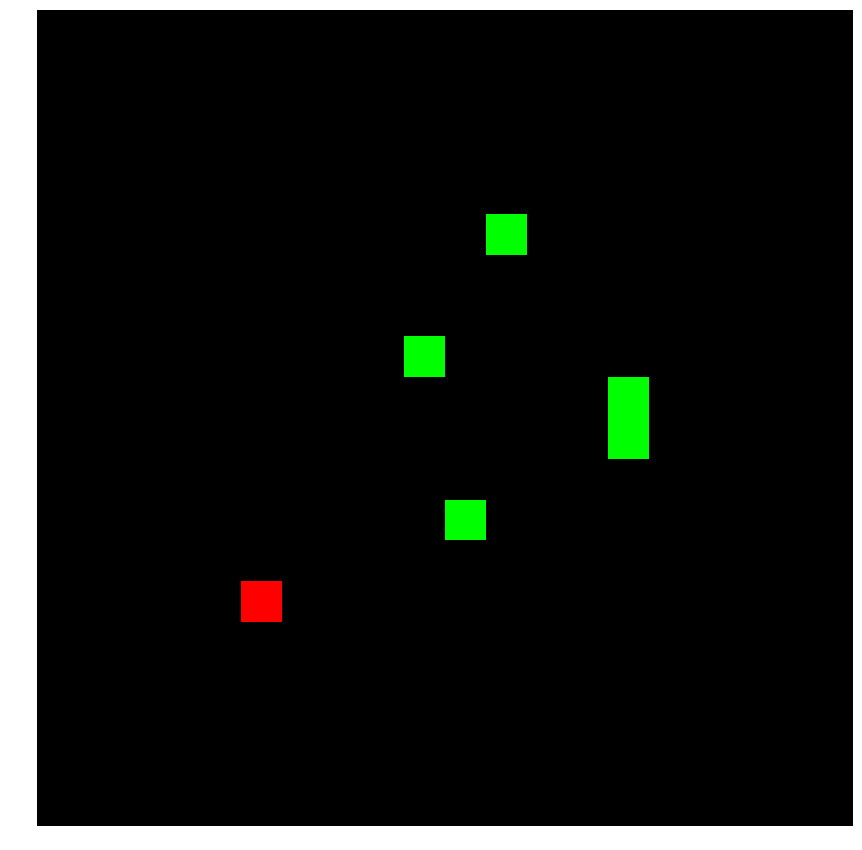

<Figure size 1080x1080 with 0 Axes>

[0]
[0]
[0]
[0]
[0]
[[[15, 10]], [[10, 14]], [[13, 9]], [[8, 11]], [[10, 8]]]


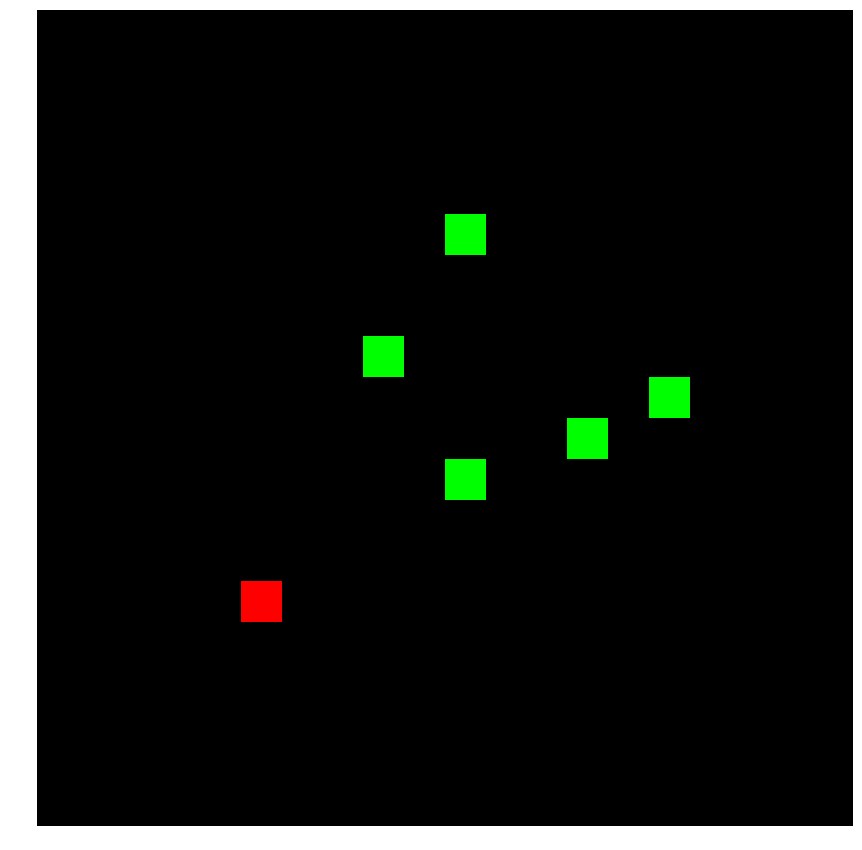

<Figure size 1080x1080 with 0 Axes>

[0]
[0]
[0]
[0]
[0]
[[[16, 10]], [[10, 13]], [[13, 8]], [[7, 11]], [[10, 7]]]


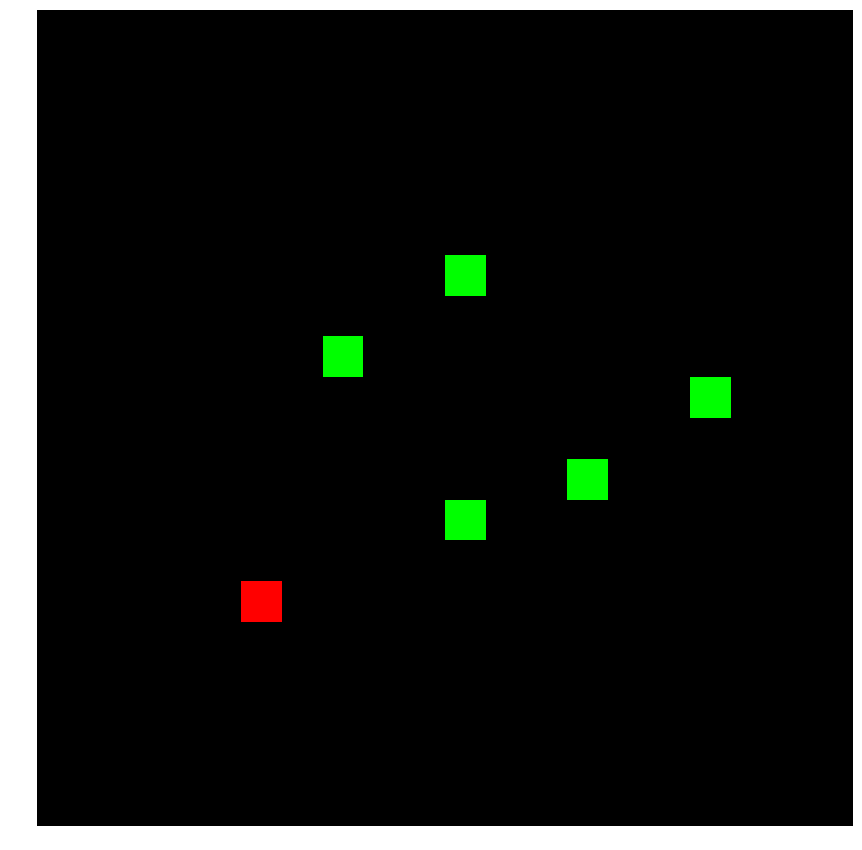

<Figure size 1080x1080 with 0 Axes>

[0]
[0]
[0]
[0]
[0]
[[[15, 10]], [[10, 14]], [[13, 9]], [[6, 11]], [[10, 6]]]


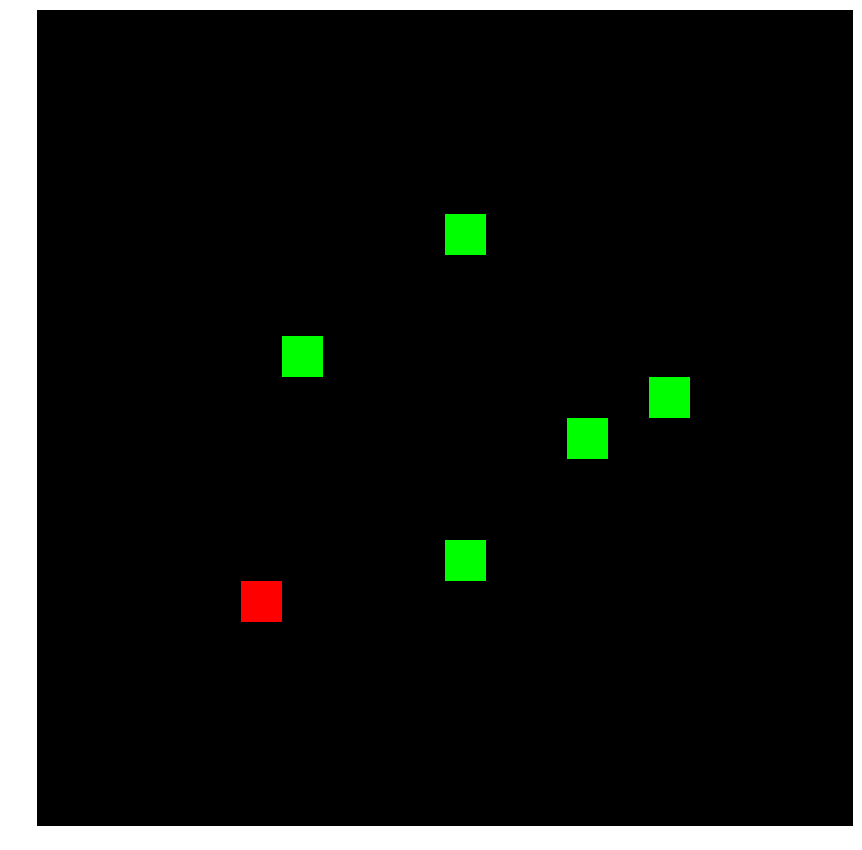

<Figure size 1080x1080 with 0 Axes>

[0]
[0]
[0]
[0]
[0]
[[[16, 10]], [[10, 15]], [[14, 9]], [[7, 11]], [[11, 6]]]


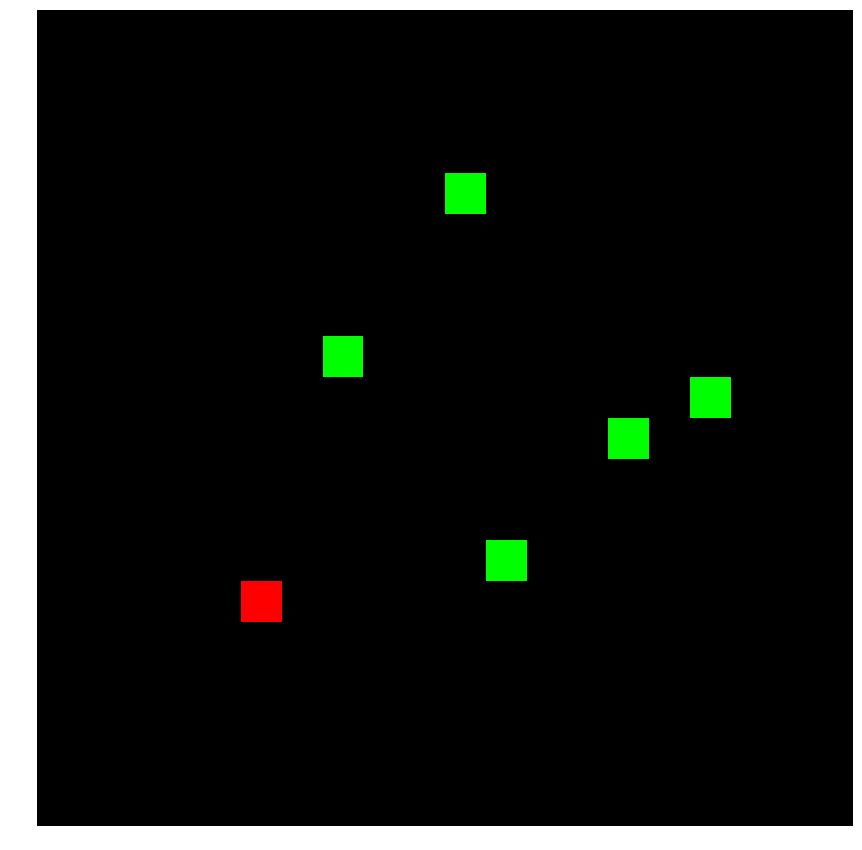

<Figure size 1080x1080 with 0 Axes>

[0]
[0]
[0]
[0]
[0]
[[[16, 9]], [[9, 15]], [[13, 9]], [[7, 12]], [[10, 6]]]


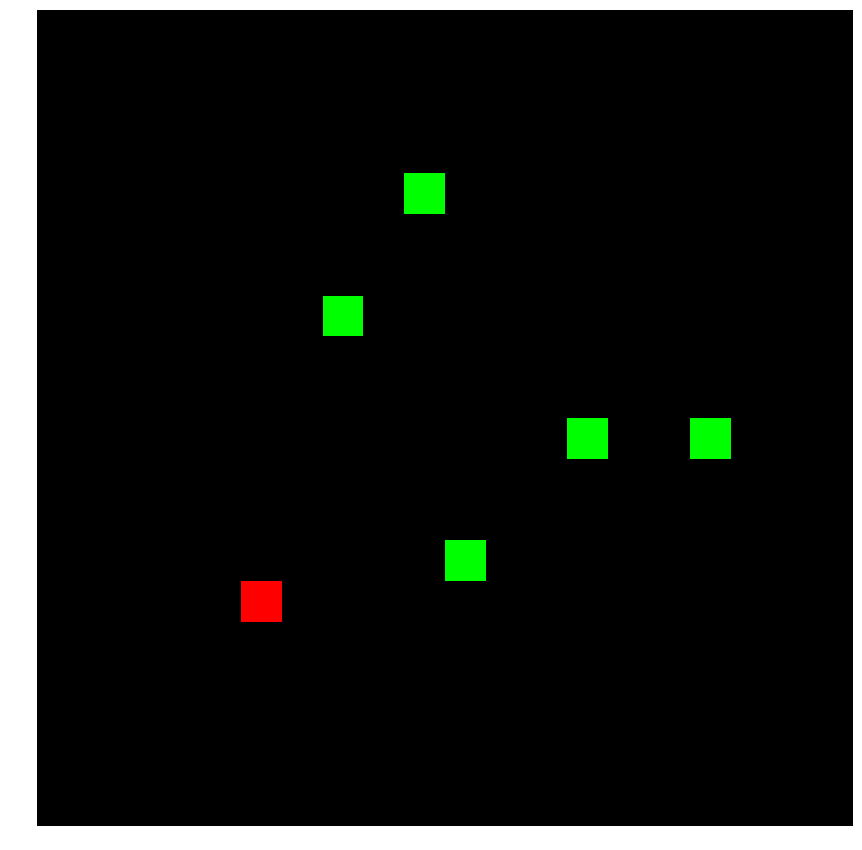

<Figure size 1080x1080 with 0 Axes>

[0]
[0]
[0]
[0]
[0]
[[[16, 8]], [[10, 15]], [[12, 9]], [[8, 12]], [[10, 7]]]


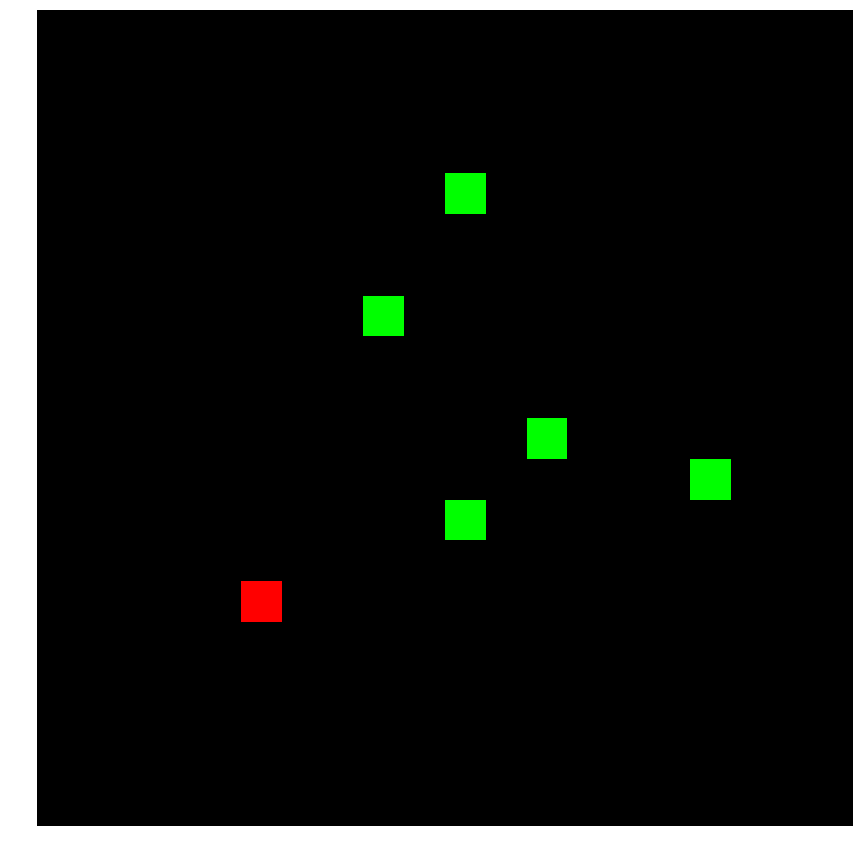

<Figure size 1080x1080 with 0 Axes>

[0]
[0]
[0]
[0]
[0]
[[[15, 8]], [[10, 16]], [[11, 9]], [[9, 12]], [[9, 7]]]


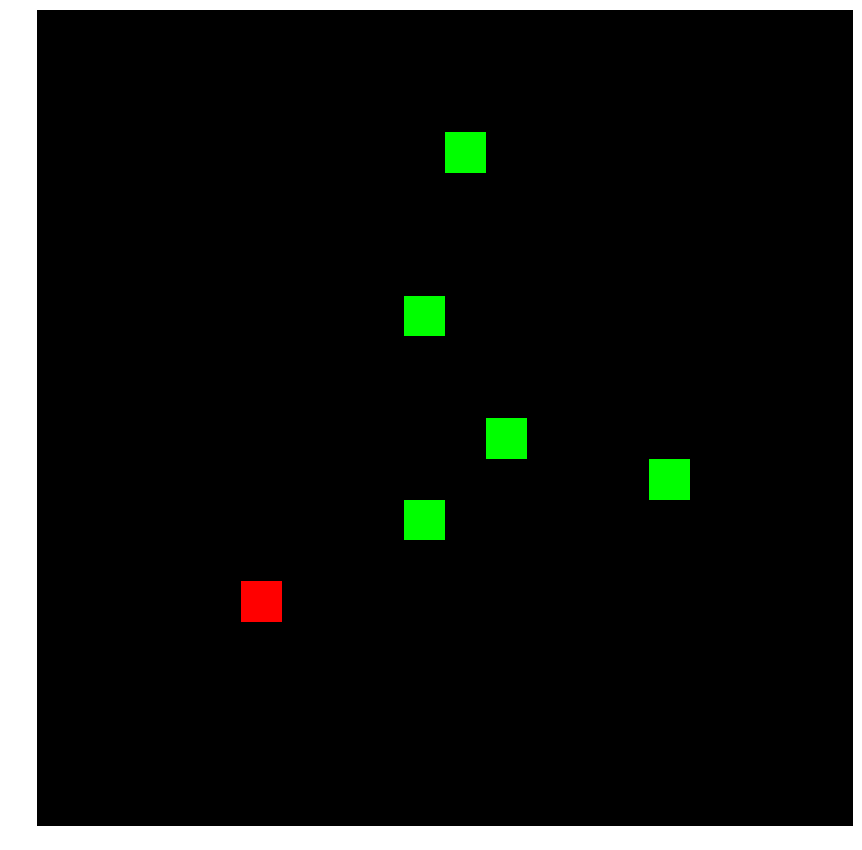

<Figure size 1080x1080 with 0 Axes>

[0]
[0]
[0]
[0]
[0]
[[[14, 8]], [[10, 15]], [[10, 9]], [[10, 12]], [[9, 8]]]


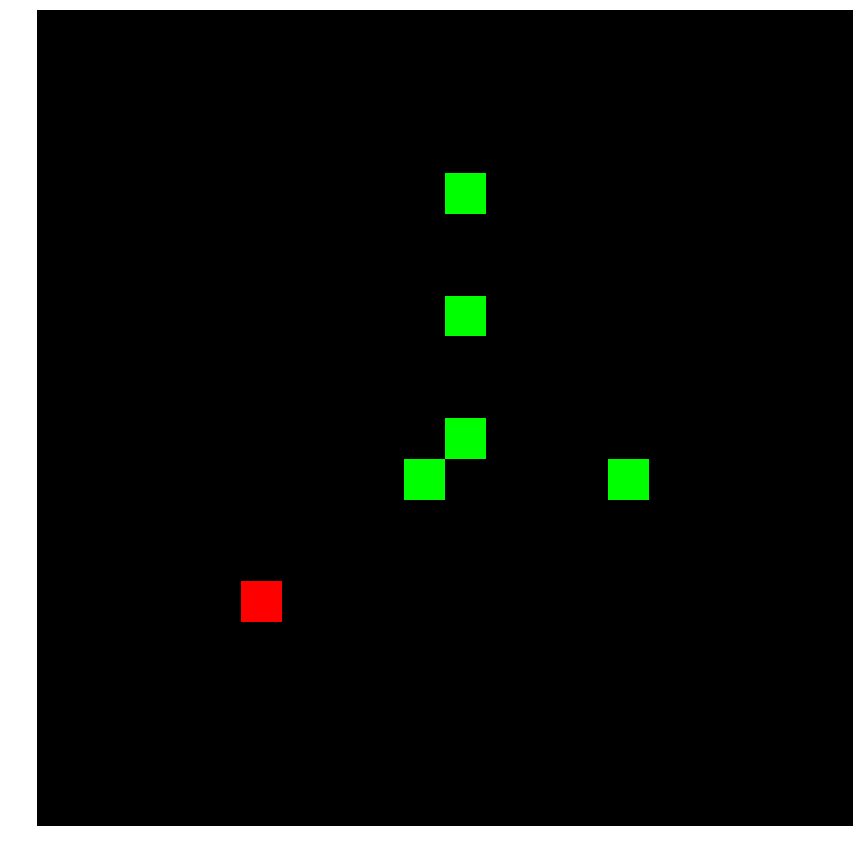

<Figure size 1080x1080 with 0 Axes>

[0]
[0]
[0]
[0]
[0]
[[[14, 7]], [[10, 16]], [[10, 8]], [[10, 13]], [[8, 8]]]


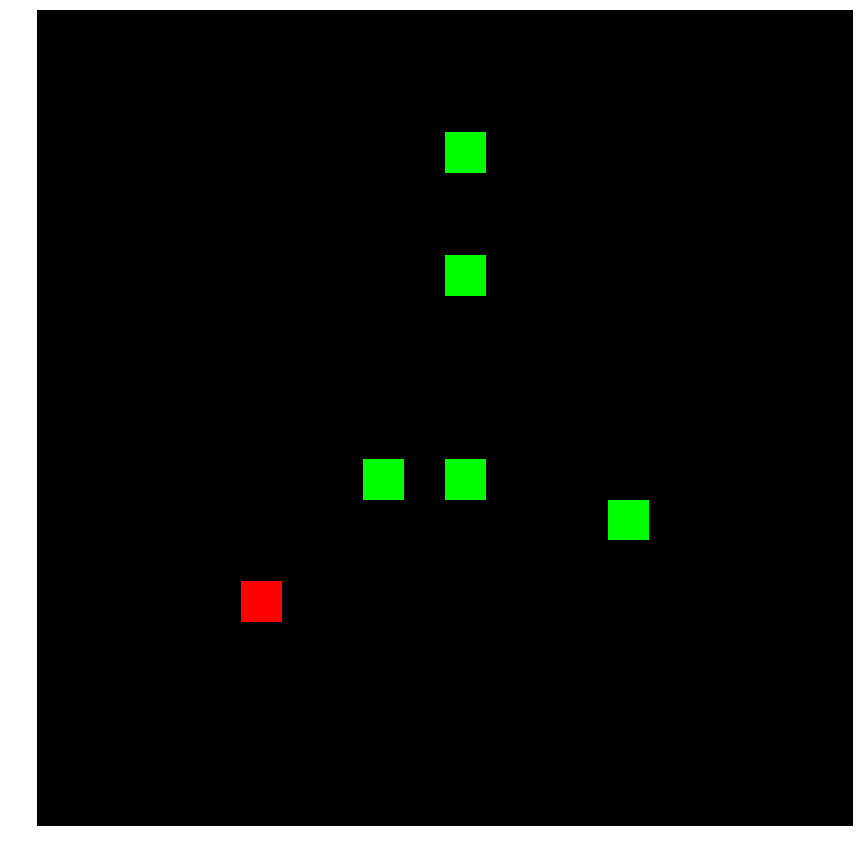

<Figure size 1080x1080 with 0 Axes>

[0]
[0]
[0]
[0]
[0]
[[[14, 6]], [[11, 16]], [[10, 9]], [[11, 13]], [[9, 8]]]


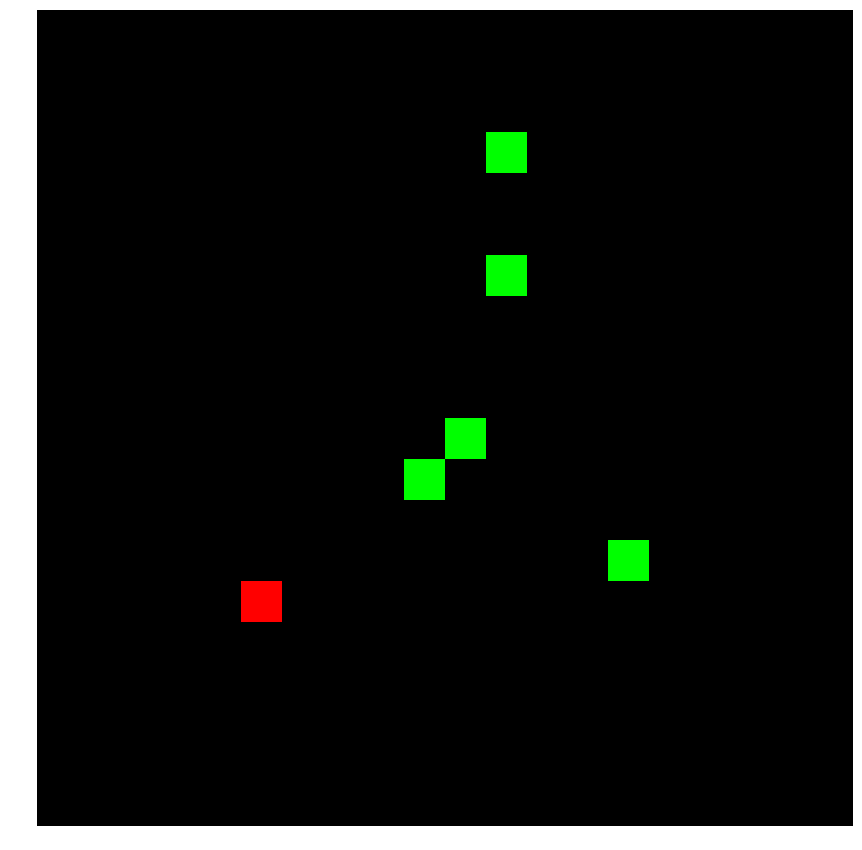

<Figure size 1080x1080 with 0 Axes>

[0]
[0]
[0]
[0]
[0]
[[[14, 7]], [[12, 16]], [[9, 9]], [[12, 13]], [[9, 9]]]


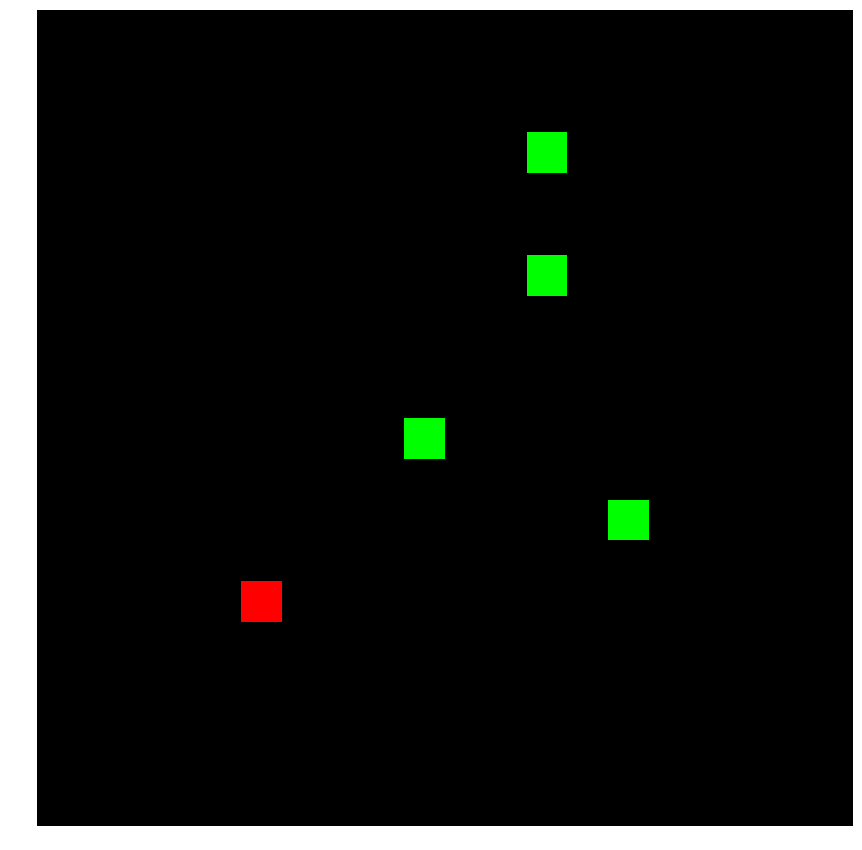

<Figure size 1080x1080 with 0 Axes>

[0]
[0]
[0]
[0]
[0]
[[[13, 7]], [[13, 16]], [[9, 10]], [[11, 13]], [[8, 9]]]


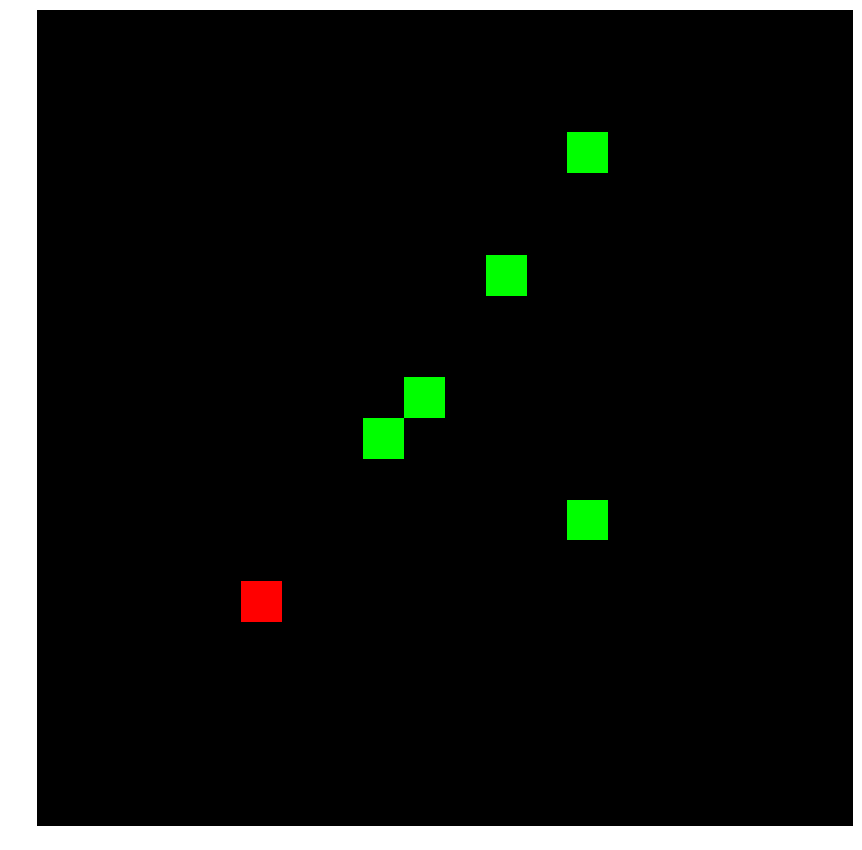

<Figure size 1080x1080 with 0 Axes>

[0]
[0]
[0]
[0]
[0]
[[[14, 7]], [[13, 15]], [[9, 9]], [[11, 12]], [[8, 10]]]


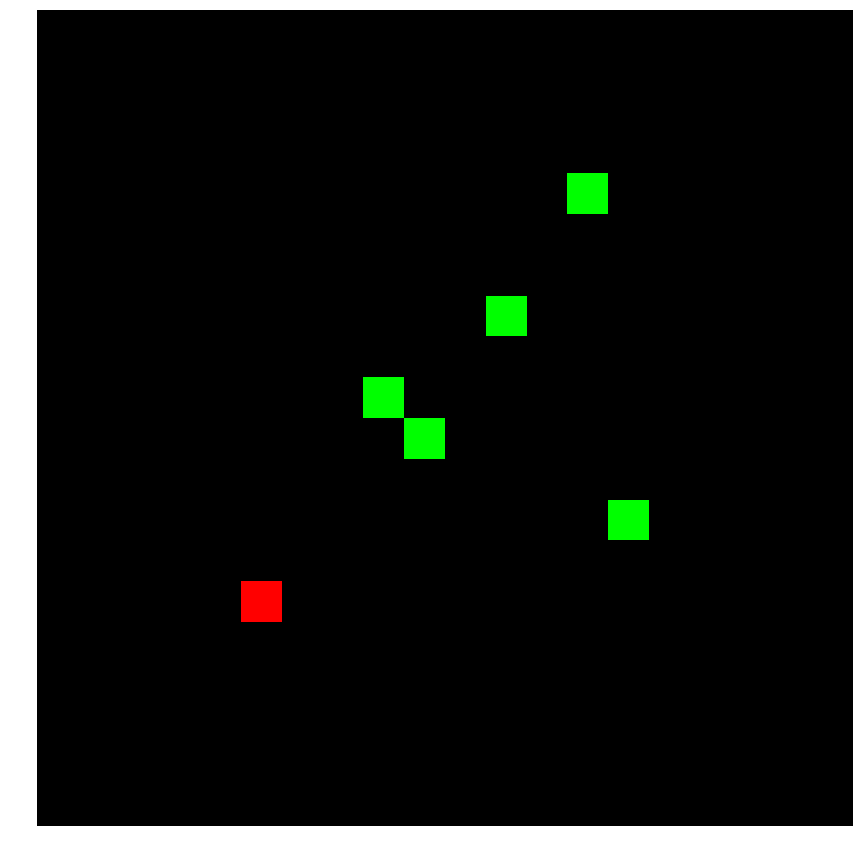

<Figure size 1080x1080 with 0 Axes>

[0]
[0]
[0]
[0]
[0]
[[[15, 7]], [[14, 15]], [[9, 8]], [[11, 13]], [[8, 9]]]


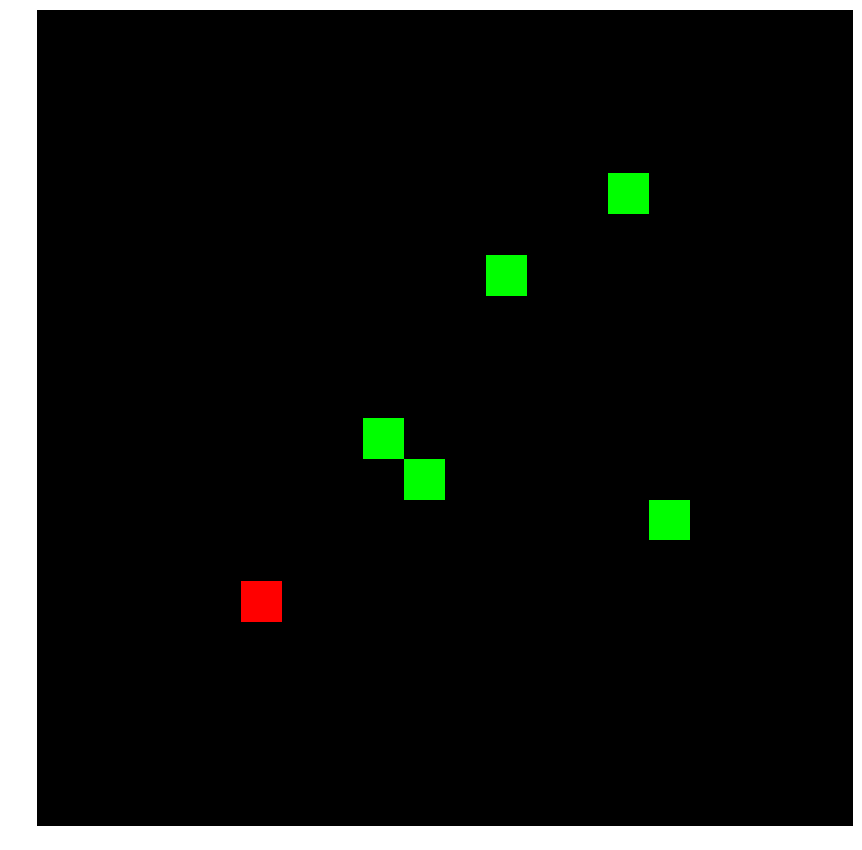

<Figure size 1080x1080 with 0 Axes>

[0]
[0]
[0]
[0]
[0]
[[[15, 6]], [[15, 15]], [[10, 8]], [[11, 14]], [[8, 10]]]


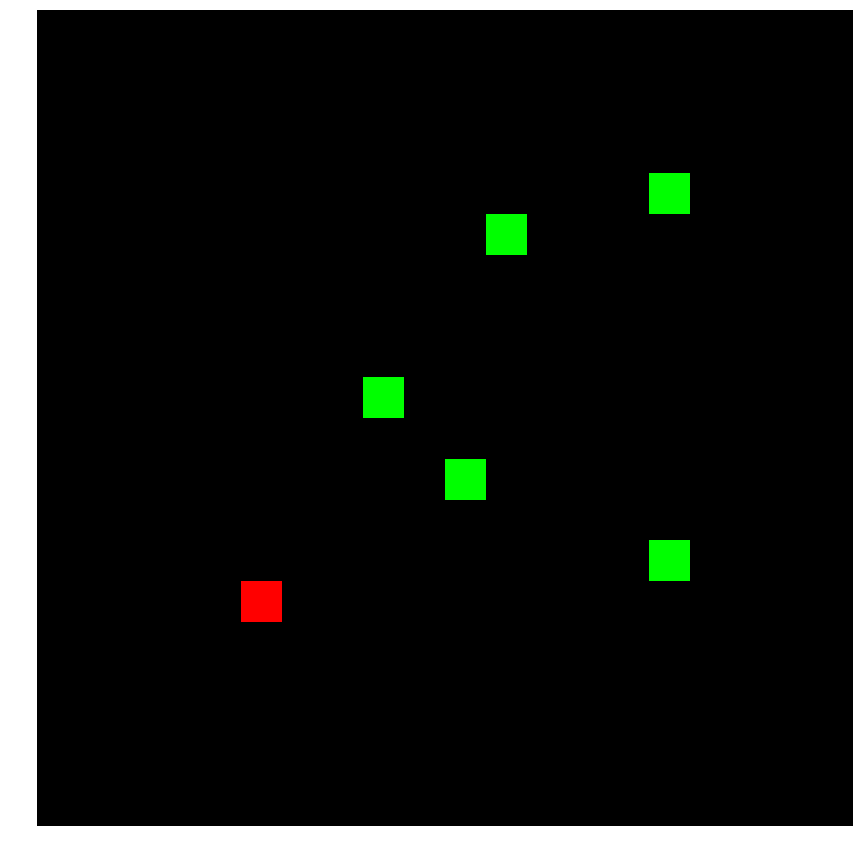

<Figure size 1080x1080 with 0 Axes>

[0]
[0]
[0]
[0]
[0]
[[[15, 5]], [[16, 15]], [[10, 7]], [[11, 15]], [[7, 10]]]


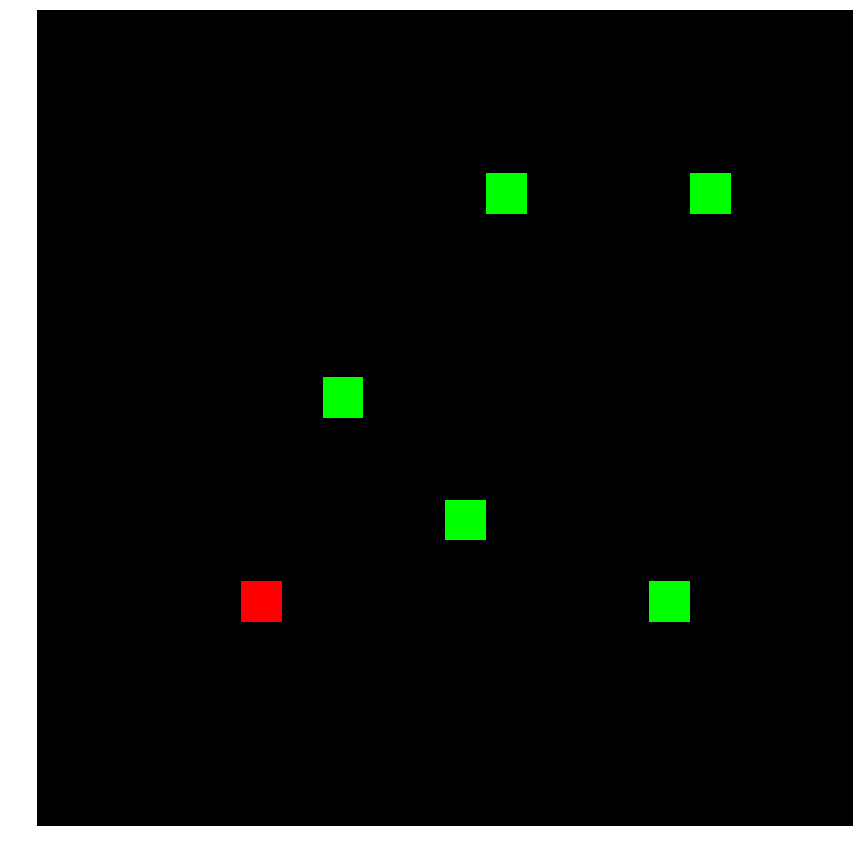

<Figure size 1080x1080 with 0 Axes>

[0]
[0]
[0]
[0]
[0]
[[[14, 5]], [[16, 16]], [[11, 7]], [[12, 15]], [[7, 11]]]


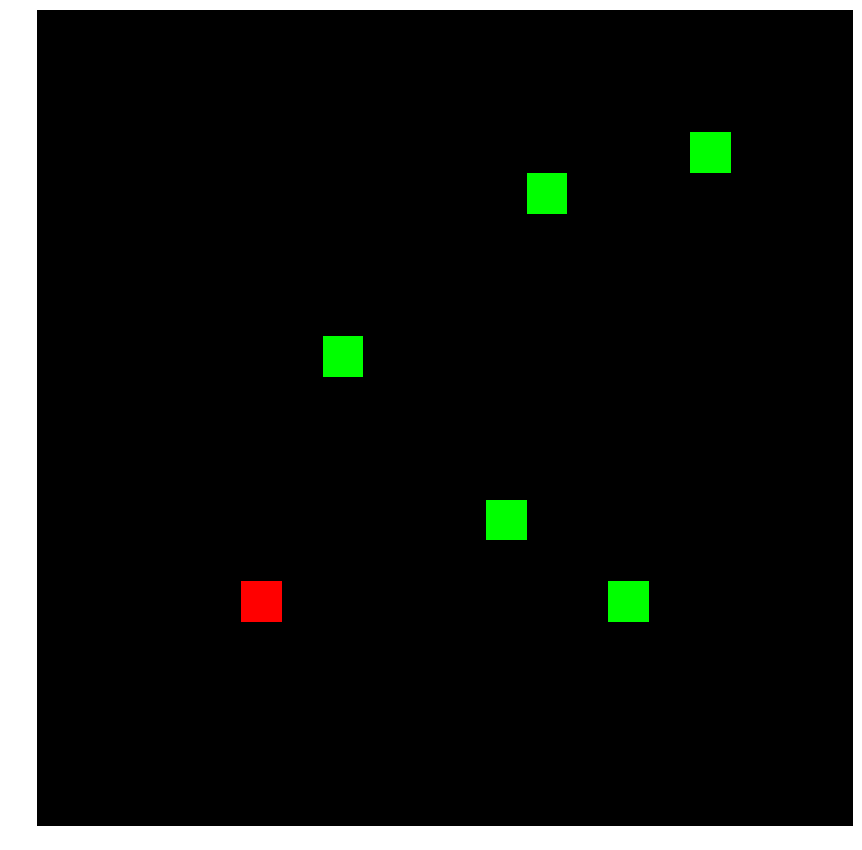

<Figure size 1080x1080 with 0 Axes>

[0]
[0]
[0]
[0]
[0]
[[[14, 4]], [[16, 17]], [[10, 7]], [[13, 15]], [[7, 12]]]


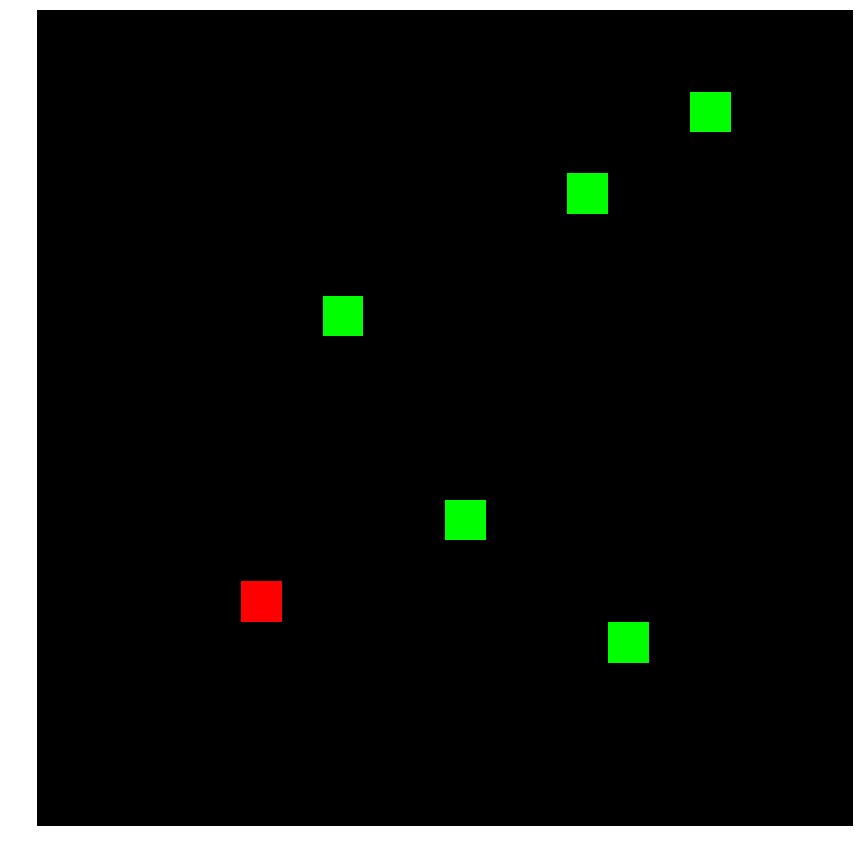

<Figure size 1080x1080 with 0 Axes>

[0]
[0]
[0]
[0]
[0]
[[[13, 4]], [[17, 17]], [[11, 7]], [[14, 15]], [[7, 13]]]


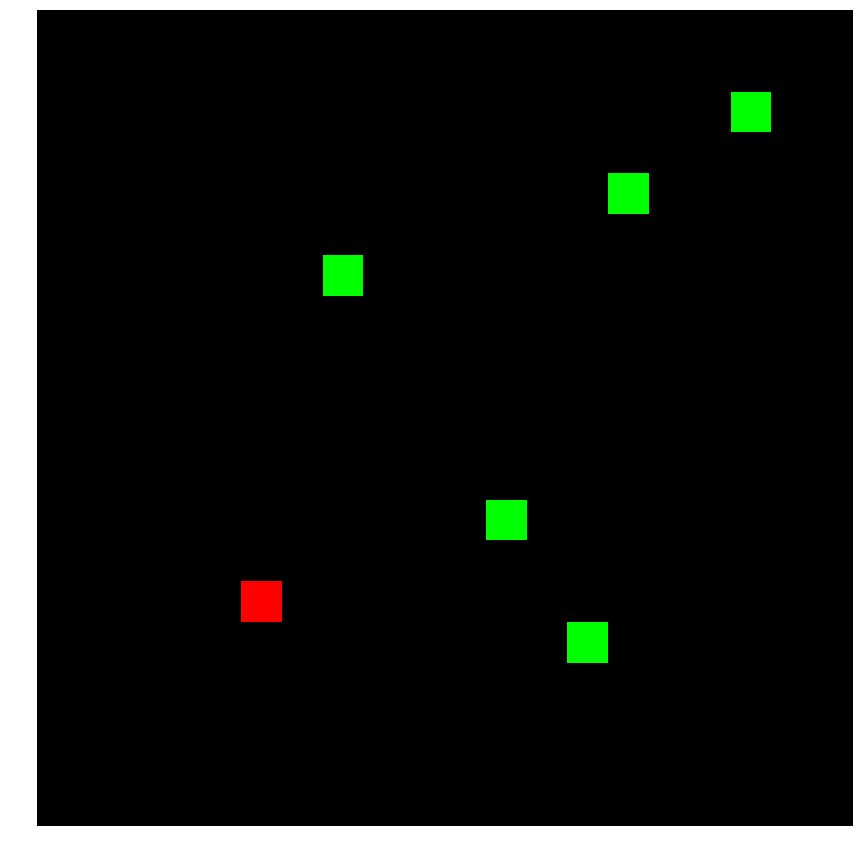

<Figure size 1080x1080 with 0 Axes>

[0]
[0]
[0]
[0]
[0]
[[[13, 5]], [[18, 17]], [[11, 8]], [[13, 15]], [[7, 12]]]


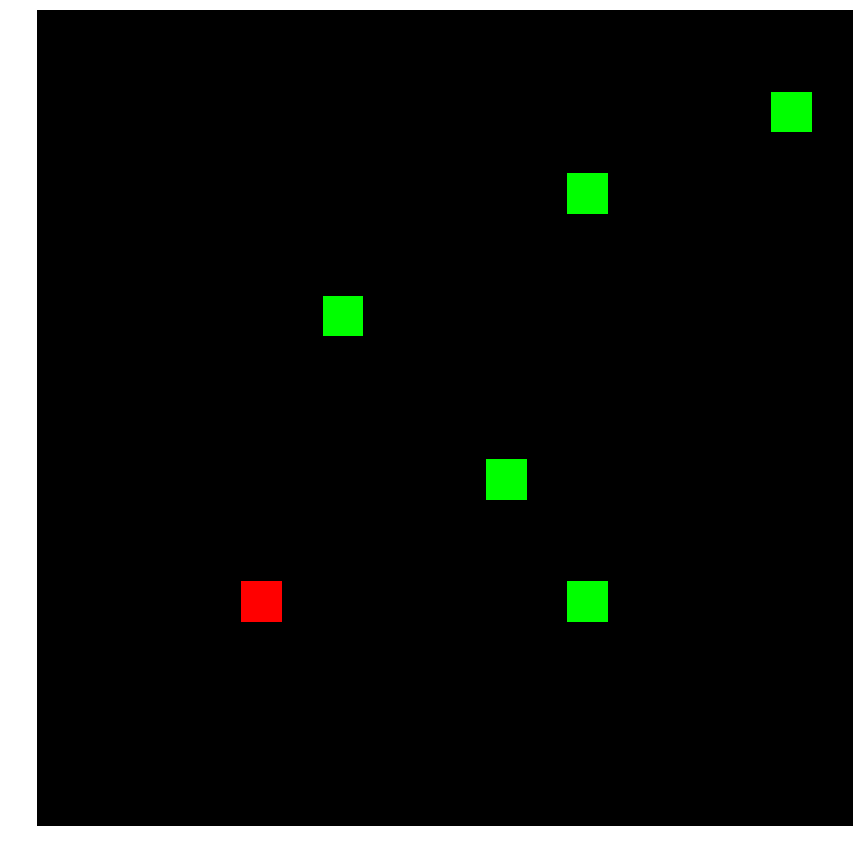

<Figure size 1080x1080 with 0 Axes>

[0]
[0]
[0]
[0]
[0]
[[[12, 5]], [[18, 16]], [[12, 8]], [[13, 14]], [[7, 13]]]


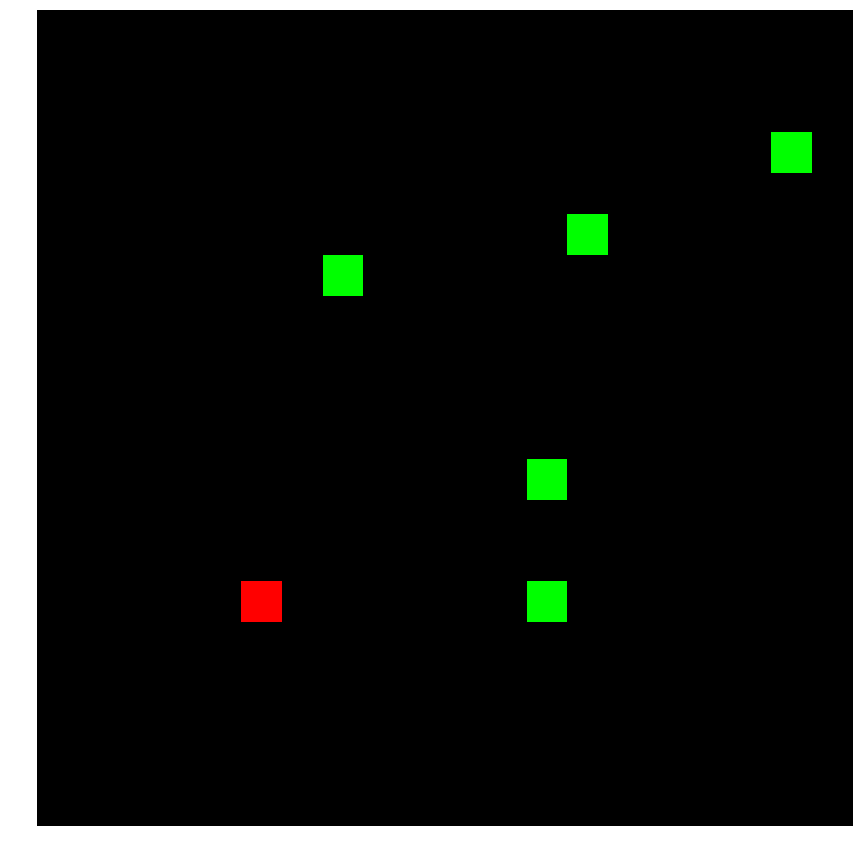

<Figure size 1080x1080 with 0 Axes>

[0]
[0]
[0]
[0]
[0]
[[[12, 4]], [[17, 16]], [[12, 9]], [[14, 14]], [[7, 12]]]


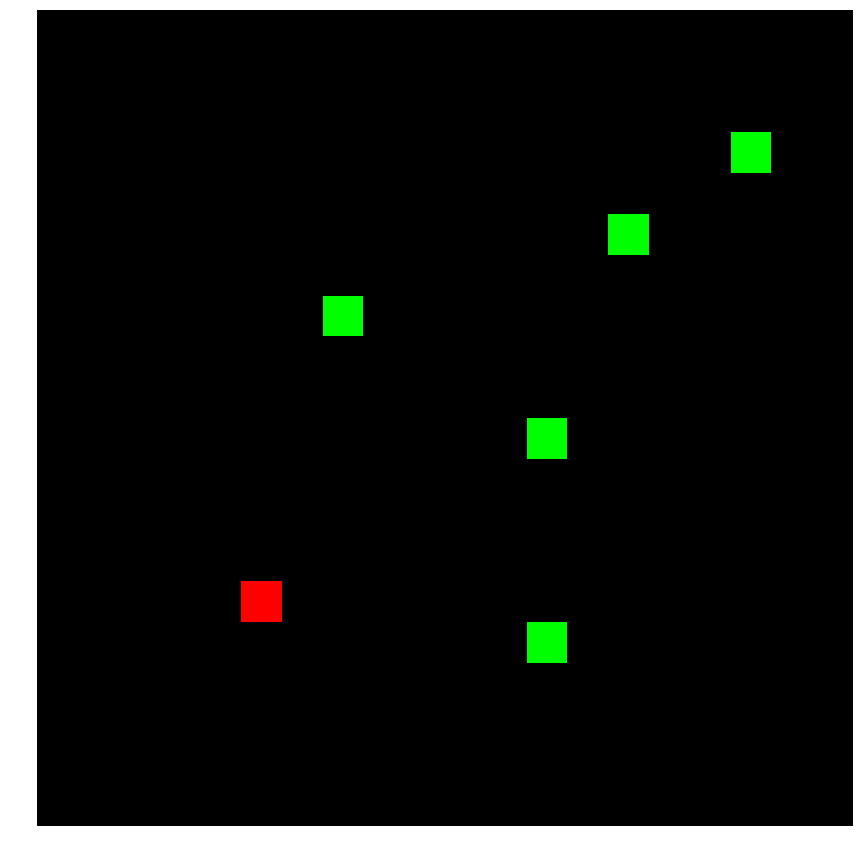

<Figure size 1080x1080 with 0 Axes>

[0]
[0]
[0]
[0]
[0]
[[[13, 4]], [[17, 17]], [[11, 9]], [[13, 14]], [[8, 12]]]


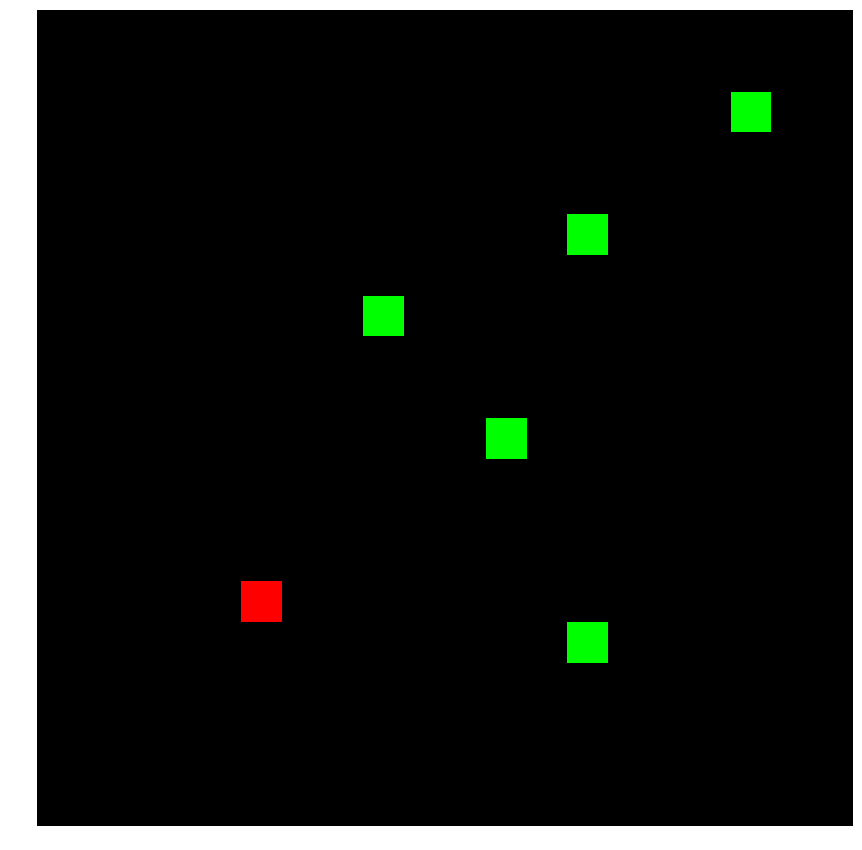

<Figure size 1080x1080 with 0 Axes>

[0]
[0]
[0]
[0]
[0]
[[[14, 4]], [[17, 16]], [[11, 8]], [[12, 14]], [[8, 13]]]


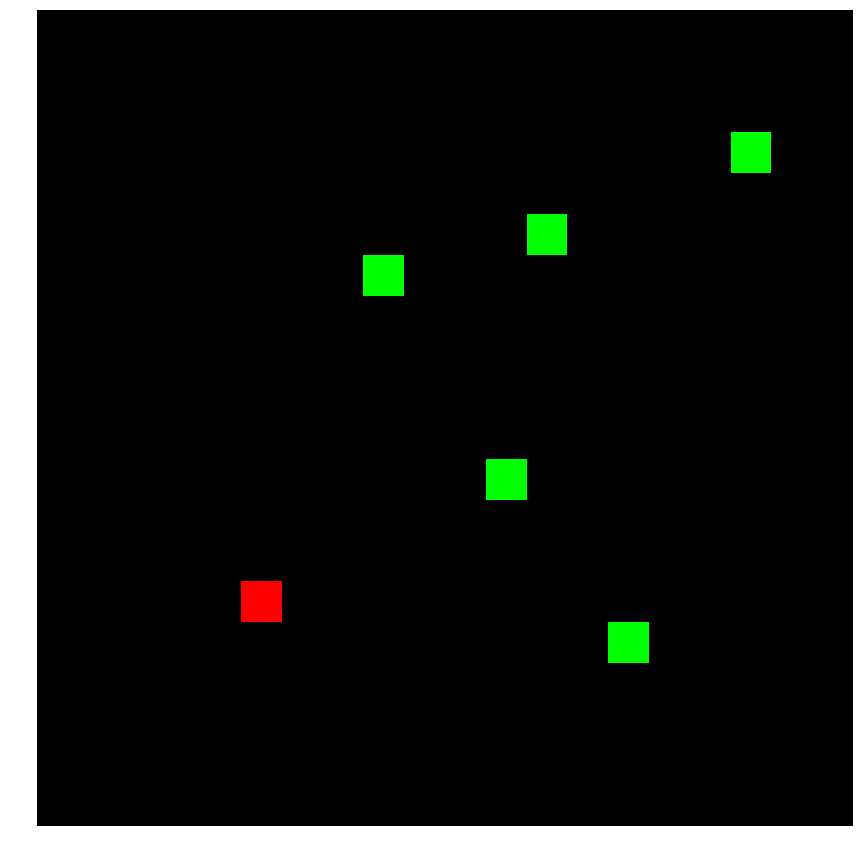

<Figure size 1080x1080 with 0 Axes>

[0]
[0]
[0]
[0]
[0]
[[[15, 4]], [[17, 17]], [[10, 8]], [[12, 13]], [[9, 13]]]


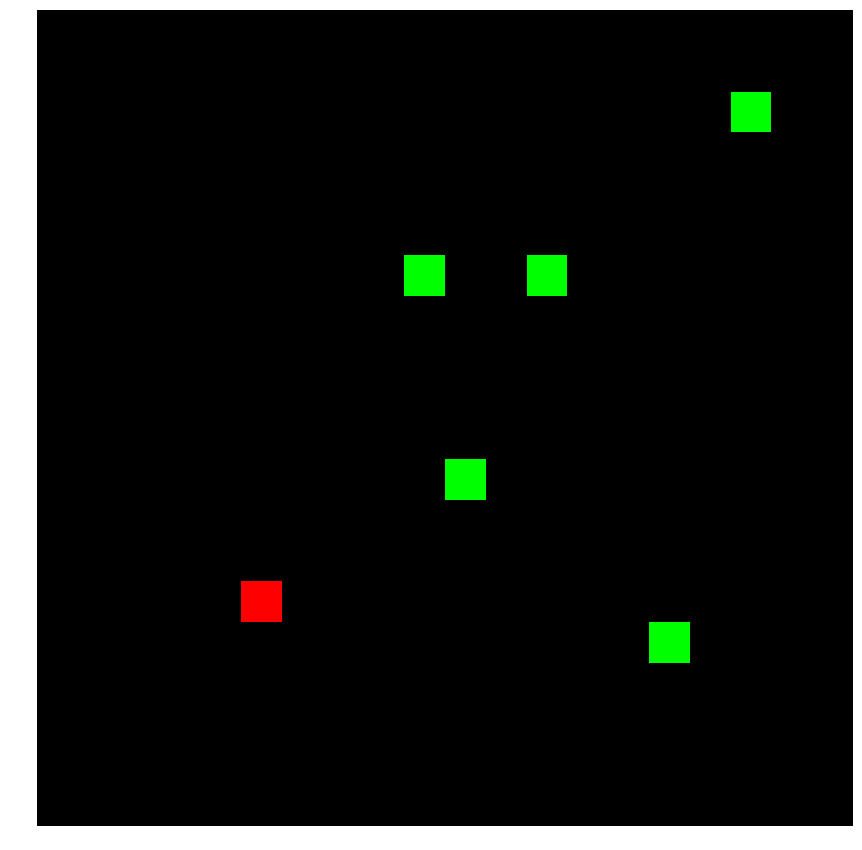

<Figure size 1080x1080 with 0 Axes>

[0]
[0]
[0]
[0]
[0]
[[[15, 3]], [[17, 18]], [[10, 7]], [[11, 13]], [[9, 12]]]


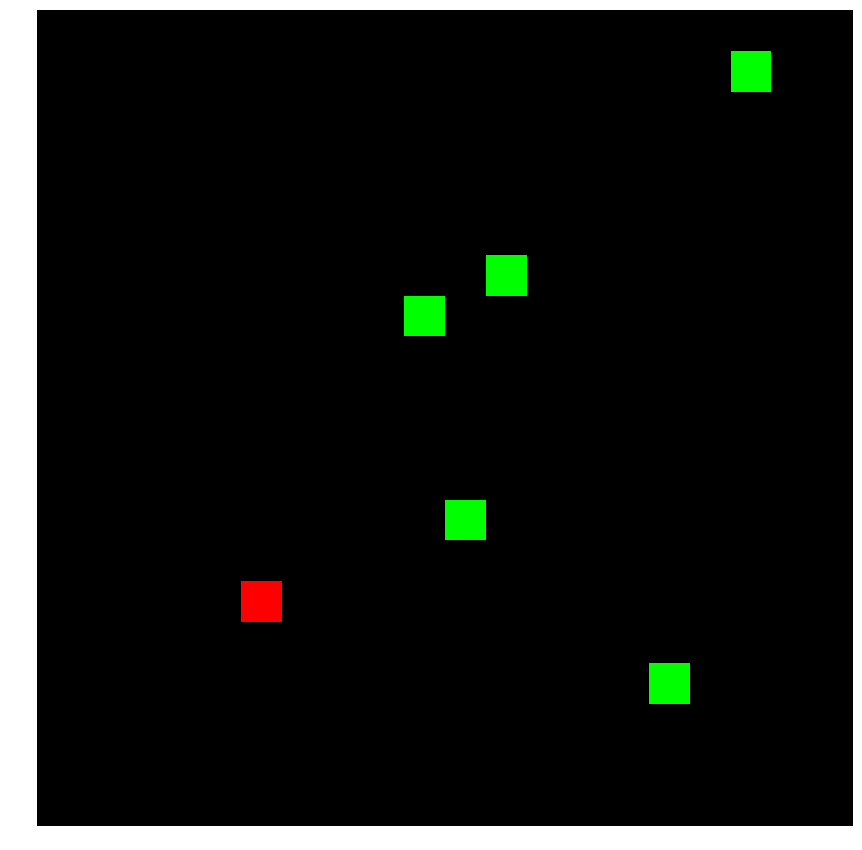

<Figure size 1080x1080 with 0 Axes>

[0]
[0]
[0]
[0]
[0]
[[[15, 2]], [[17, 19]], [[10, 8]], [[10, 13]], [[9, 11]]]


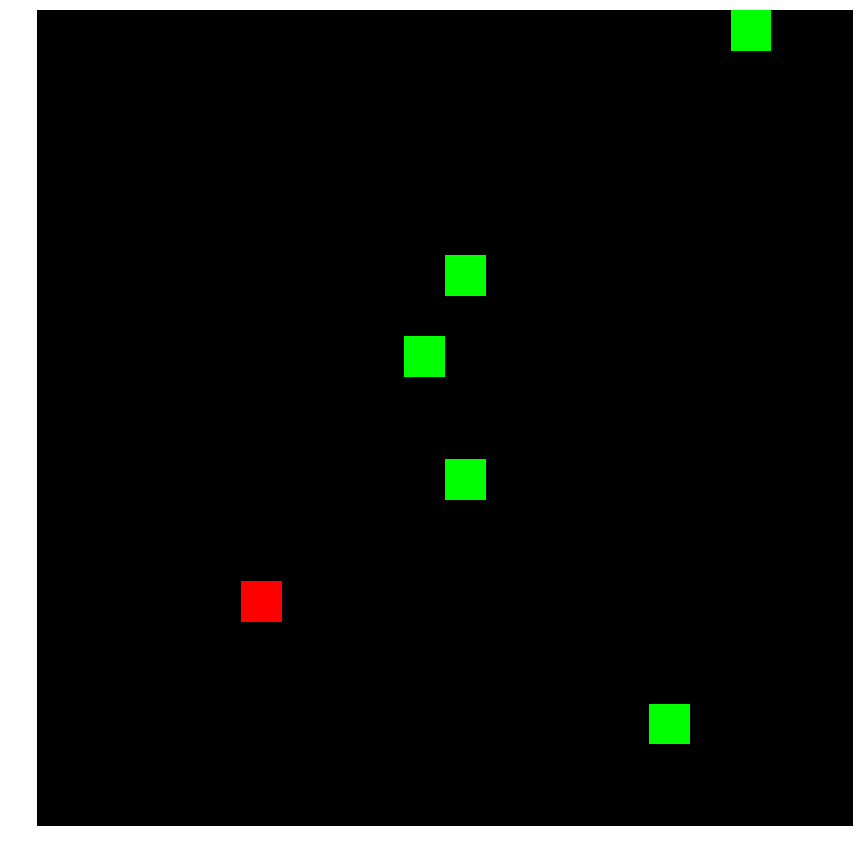

<Figure size 1080x1080 with 0 Axes>

[0]
[0]
[0]
[0]
[0]
[[[16, 2]], [[16, 19]], [[10, 9]], [[10, 14]], [[10, 11]]]


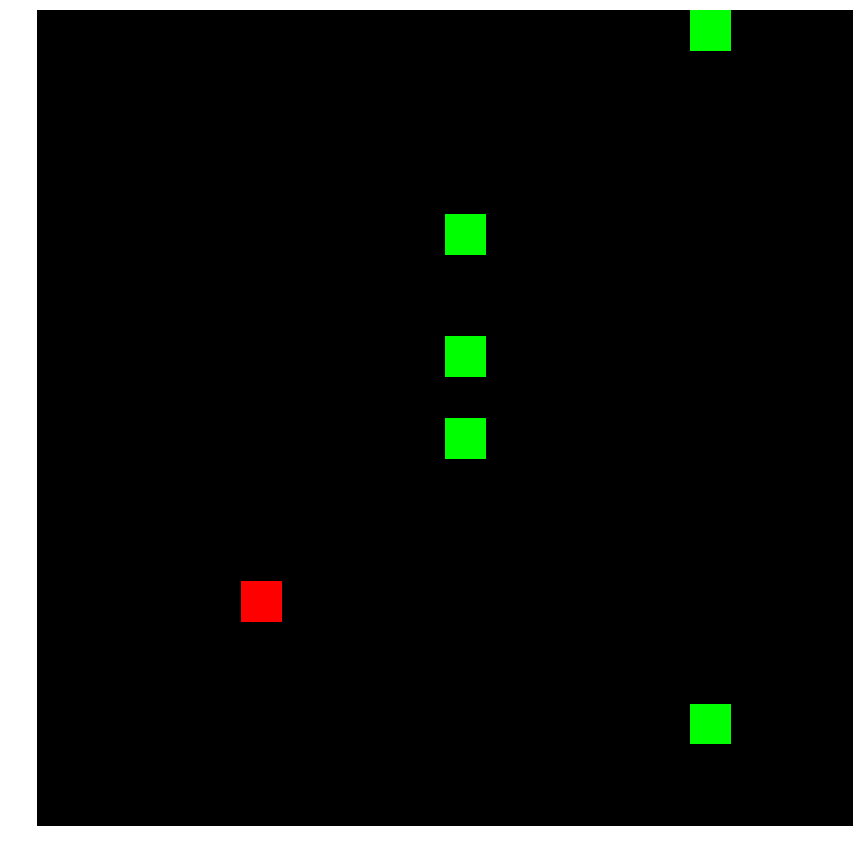

<Figure size 1080x1080 with 0 Axes>

[0]
[1]
[0]
[0]
[0]
[[[16, 3]], [[9, 9]], [[10, 15]], [[10, 10]]]


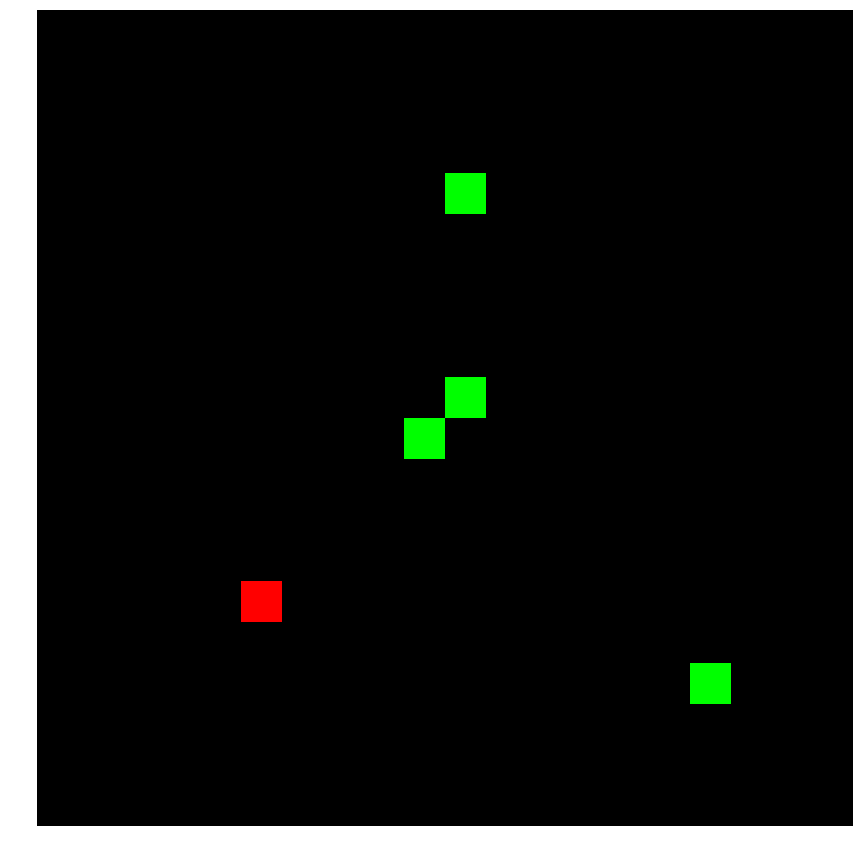

<Figure size 1080x1080 with 0 Axes>

[0]
[0]
[0]
[0]
[[[16, 2]], [[9, 10]], [[10, 16]], [[10, 9]]]


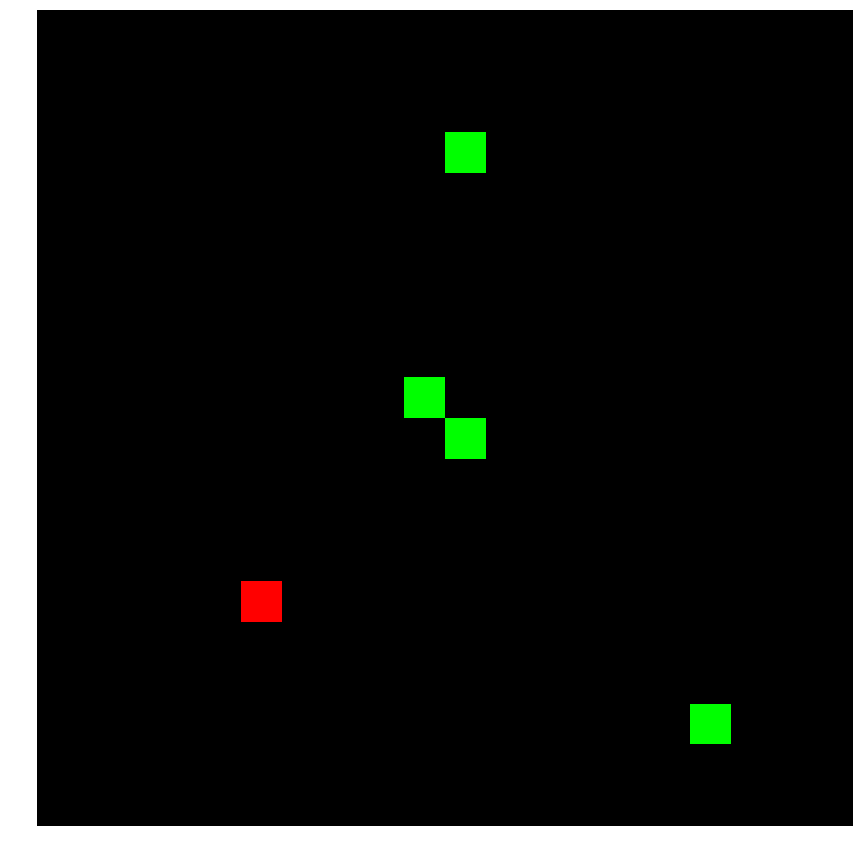

<Figure size 1080x1080 with 0 Axes>

[0]
[0]
[0]
[0]
[[[15, 2]], [[8, 10]], [[10, 15]], [[10, 10]]]


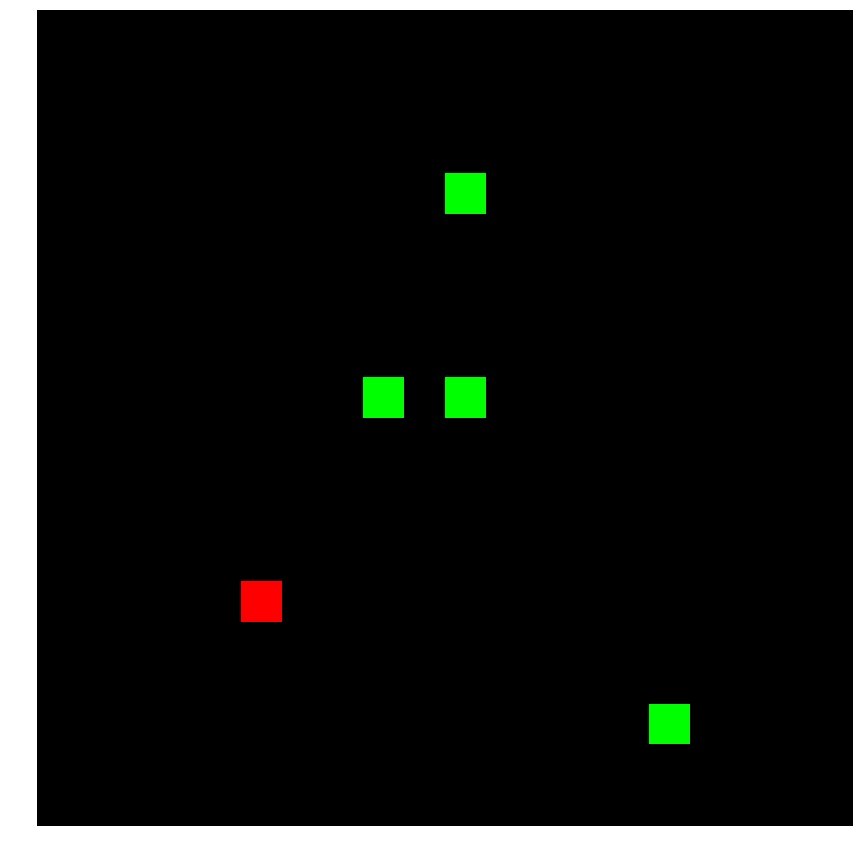

<Figure size 1080x1080 with 0 Axes>

[0]
[0]
[0]
[0]
[[[16, 2]], [[9, 10]], [[9, 15]], [[10, 9]]]


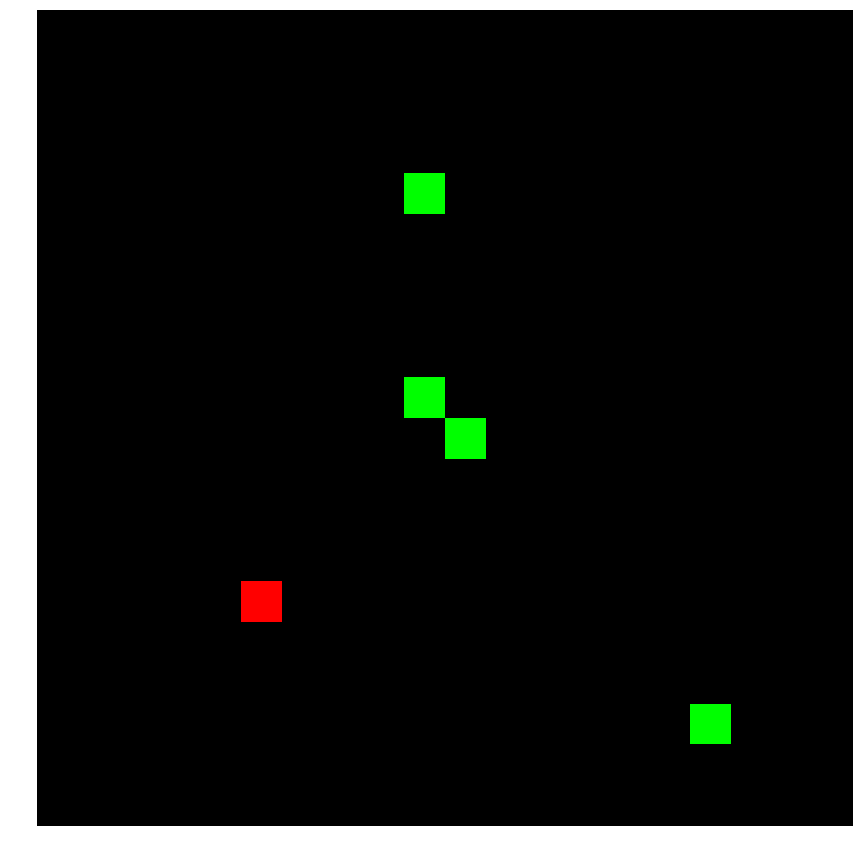

<Figure size 1080x1080 with 0 Axes>

[0]
[0]
[0]
[0]
[[[16, 3]], [[9, 11]], [[10, 15]], [[10, 10]]]


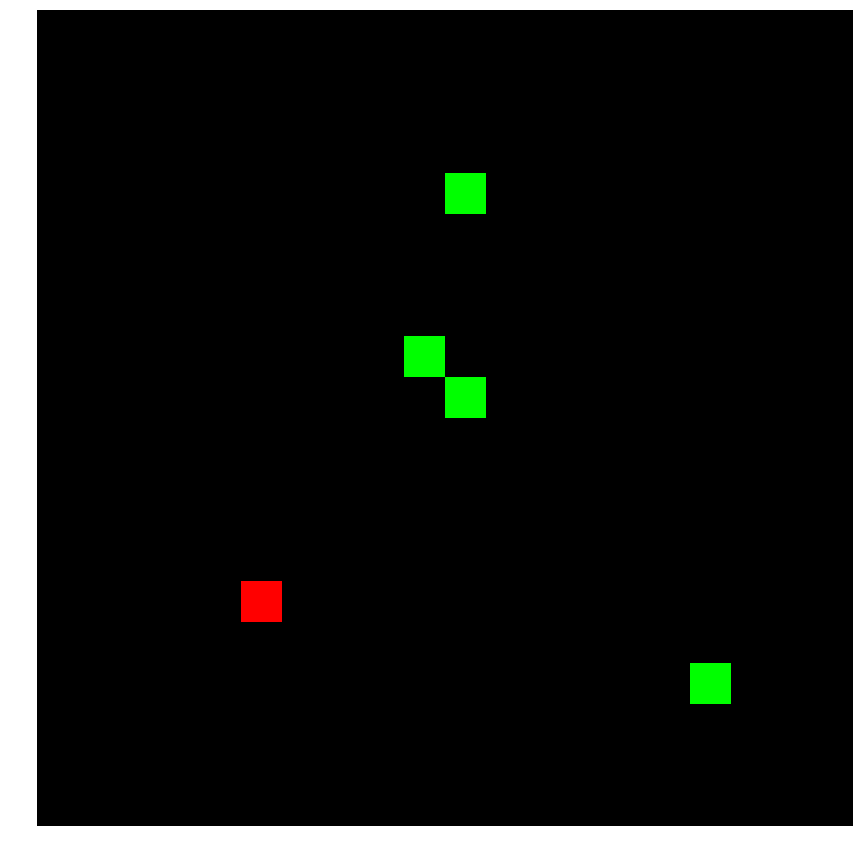

<Figure size 1080x1080 with 0 Axes>

[0]
[0]
[0]
[0]
[[[15, 3]], [[9, 12]], [[10, 14]], [[11, 10]]]


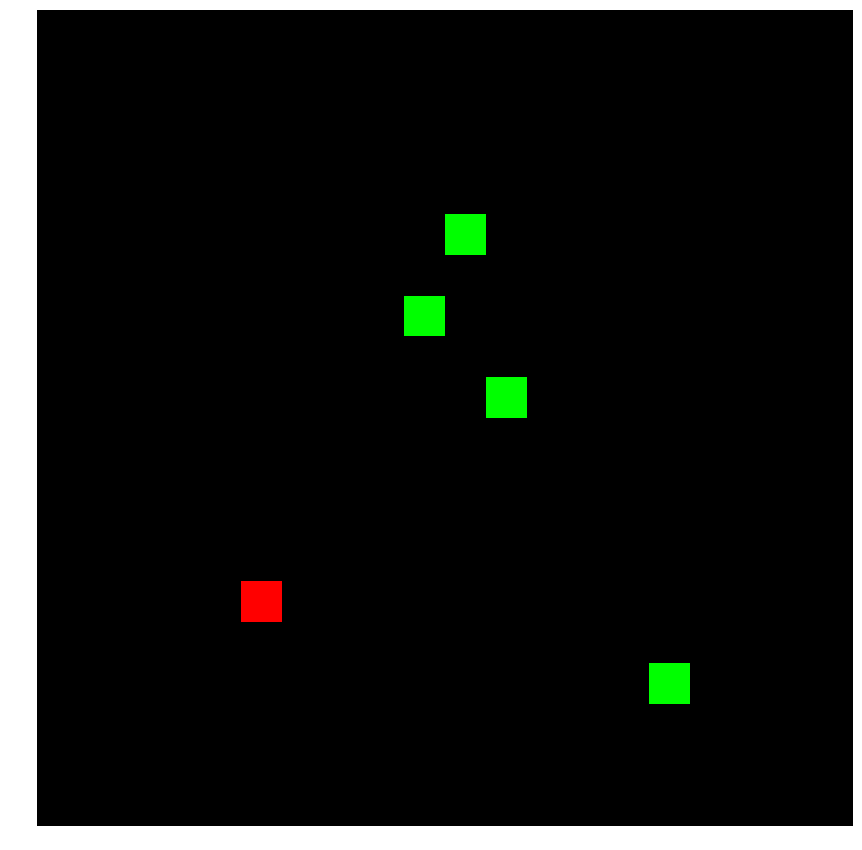

<Figure size 1080x1080 with 0 Axes>

[0]
[0]
[0]
[0]
[[[15, 4]], [[9, 13]], [[9, 14]], [[11, 11]]]


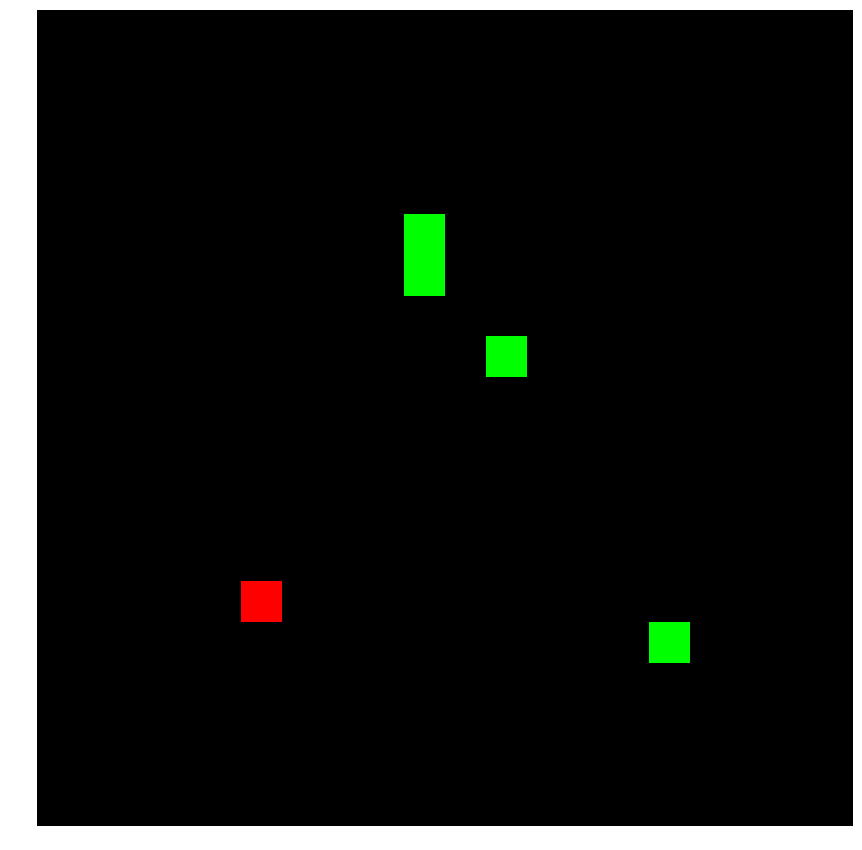

<Figure size 1080x1080 with 0 Axes>

[0]
[0]
[0]
[0]
[[[16, 4]], [[9, 12]], [[10, 14]], [[12, 11]]]


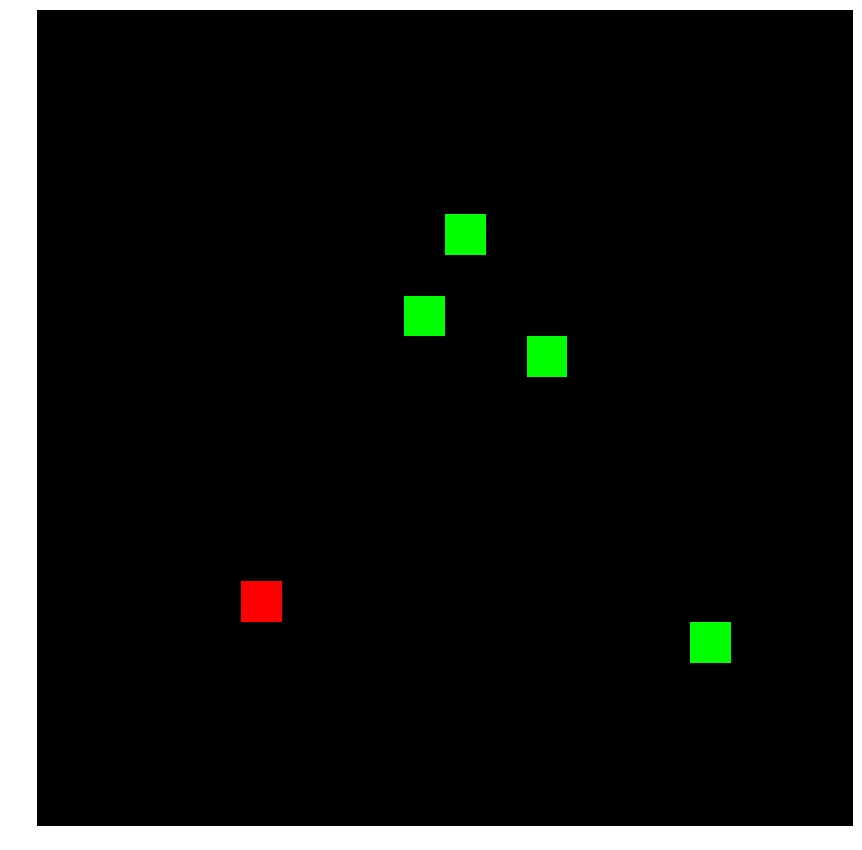

<Figure size 1080x1080 with 0 Axes>

[0]
[0]
[0]
[0]
[[[17, 4]], [[9, 11]], [[10, 15]], [[13, 11]]]


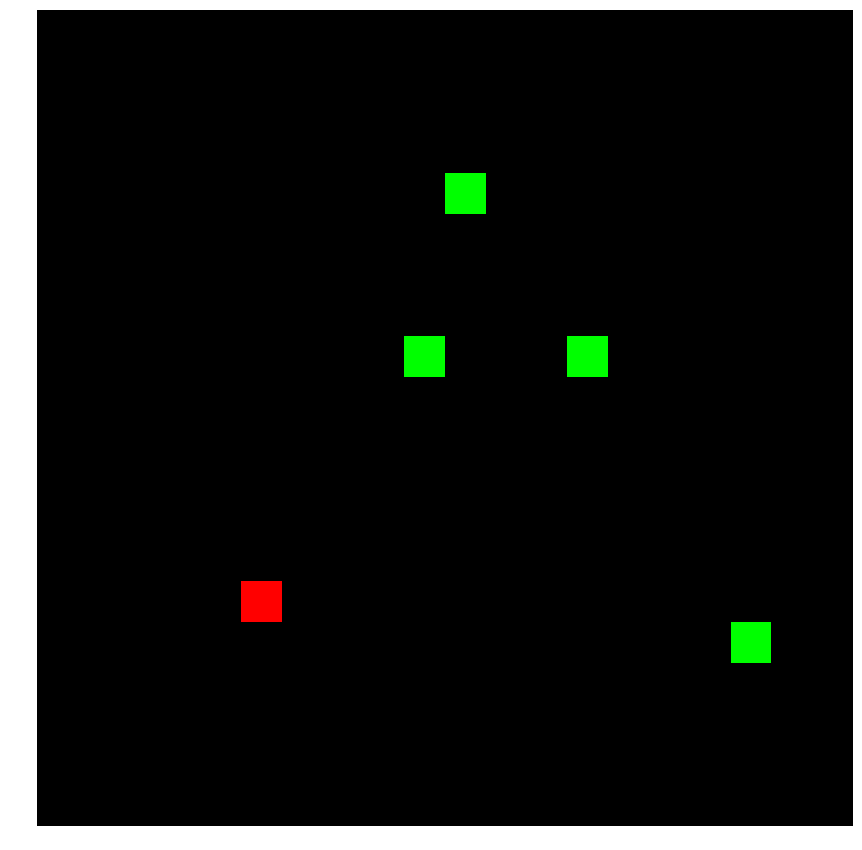

<Figure size 1080x1080 with 0 Axes>

[0]
[0]
[0]
[0]
[[[18, 4]], [[9, 12]], [[9, 15]], [[12, 11]]]


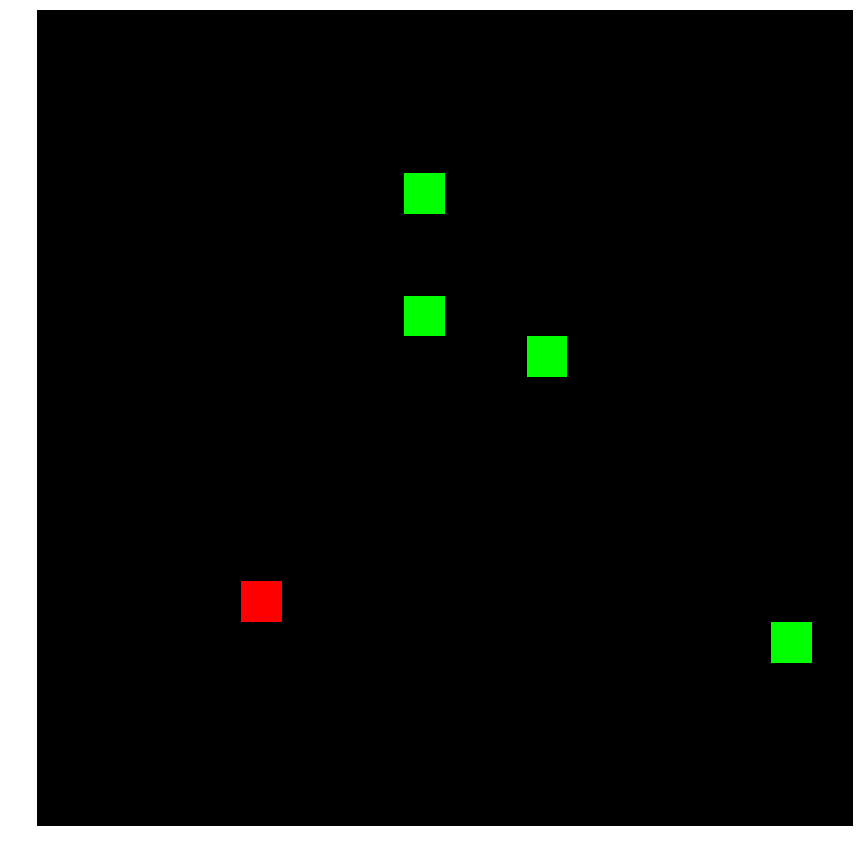

<Figure size 1080x1080 with 0 Axes>

[0]
[0]
[0]
[0]
[[[19, 4]], [[9, 13]], [[9, 14]], [[13, 11]]]


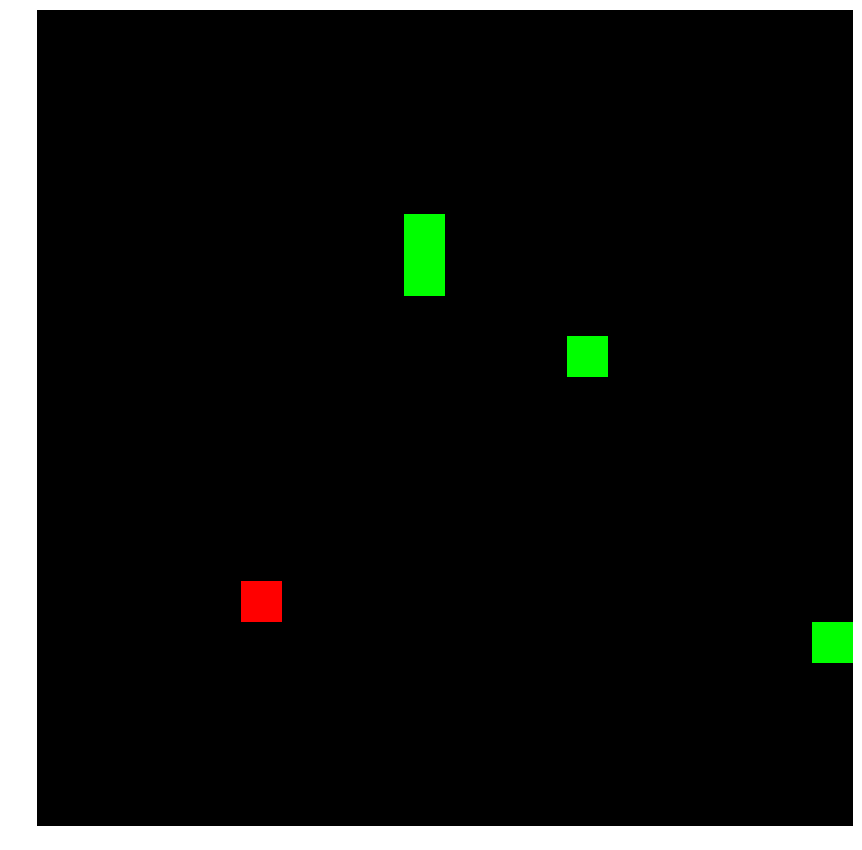

<Figure size 1080x1080 with 0 Axes>

[0]
[0]
[0]
[0]
[[[18, 4]], [[9, 14]], [[8, 14]], [[14, 11]]]


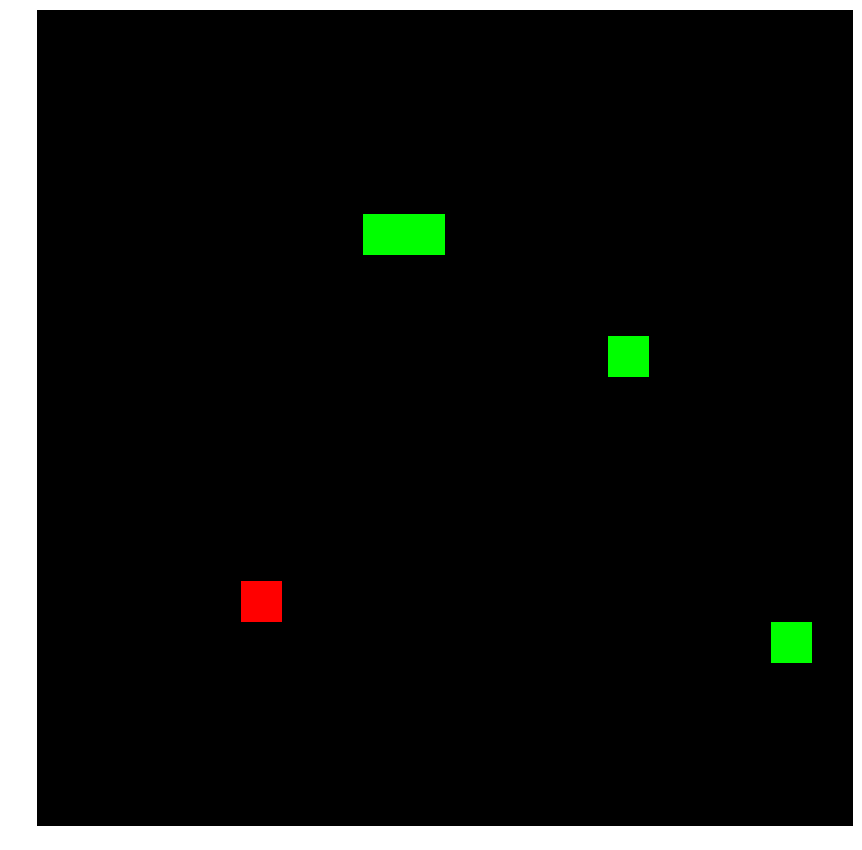

<Figure size 1080x1080 with 0 Axes>

[0]
[0]
[0]
[0]
[[[18, 3]], [[9, 15]], [[8, 15]], [[15, 11]]]


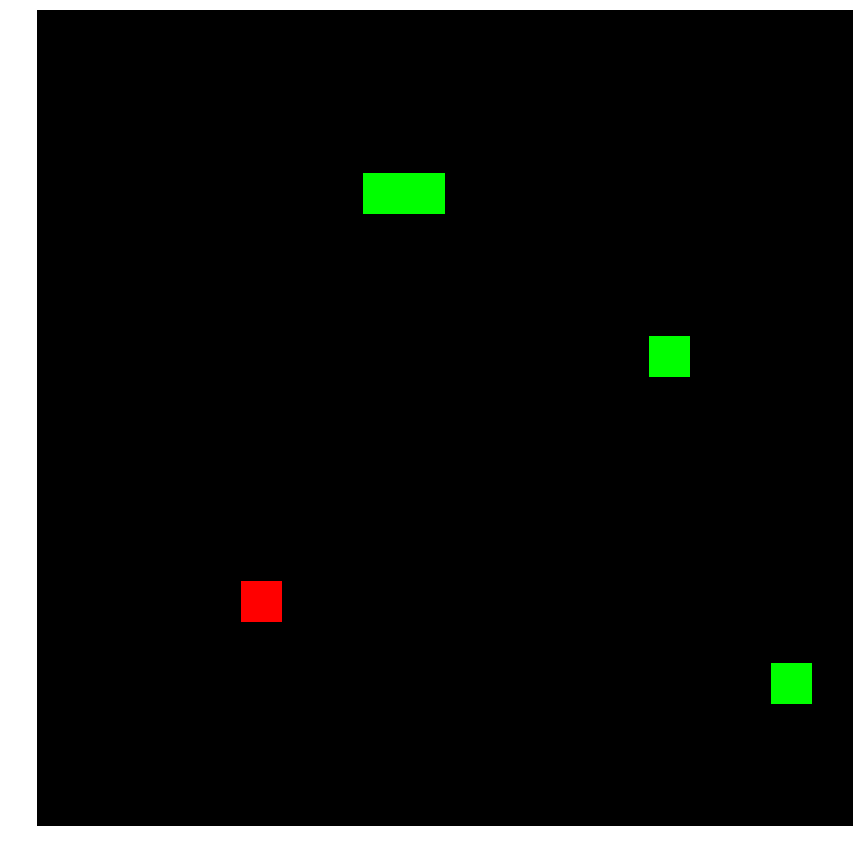

<Figure size 1080x1080 with 0 Axes>

[0]
[0]
[0]
[0]
[[[19, 3]], [[8, 15]], [[9, 15]], [[14, 11]]]


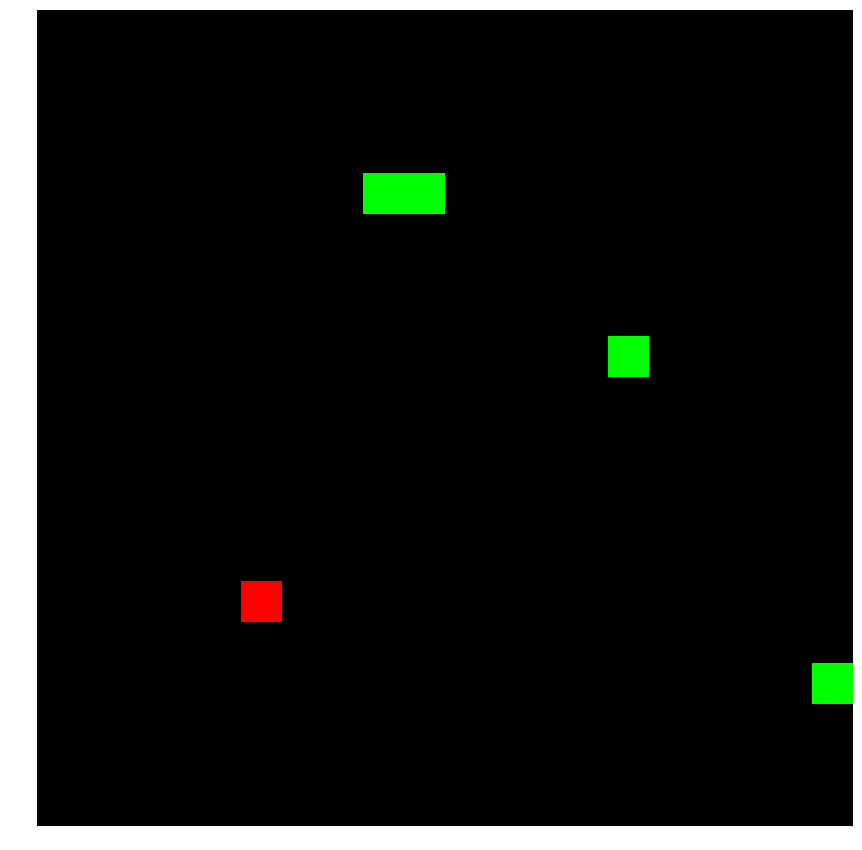

<Figure size 1080x1080 with 0 Axes>

[0]
[0]
[0]
[0]
[[[18, 3]], [[9, 15]], [[8, 15]], [[14, 12]]]


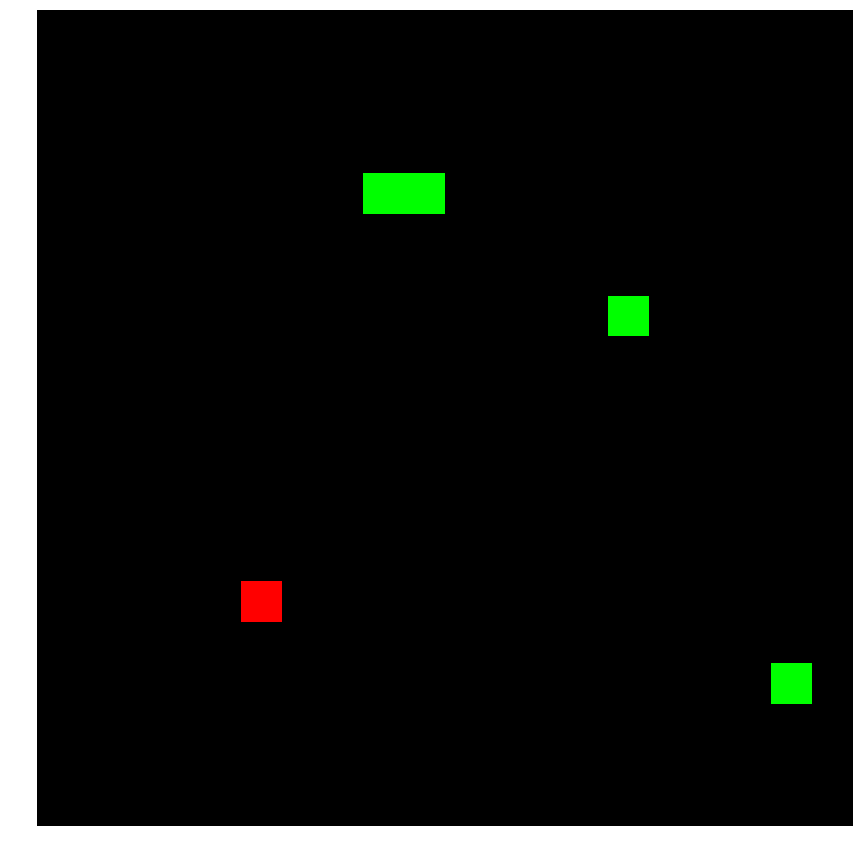

<Figure size 1080x1080 with 0 Axes>

[0]
[0]
[0]
[0]
[[[18, 2]], [[9, 14]], [[8, 16]], [[14, 13]]]


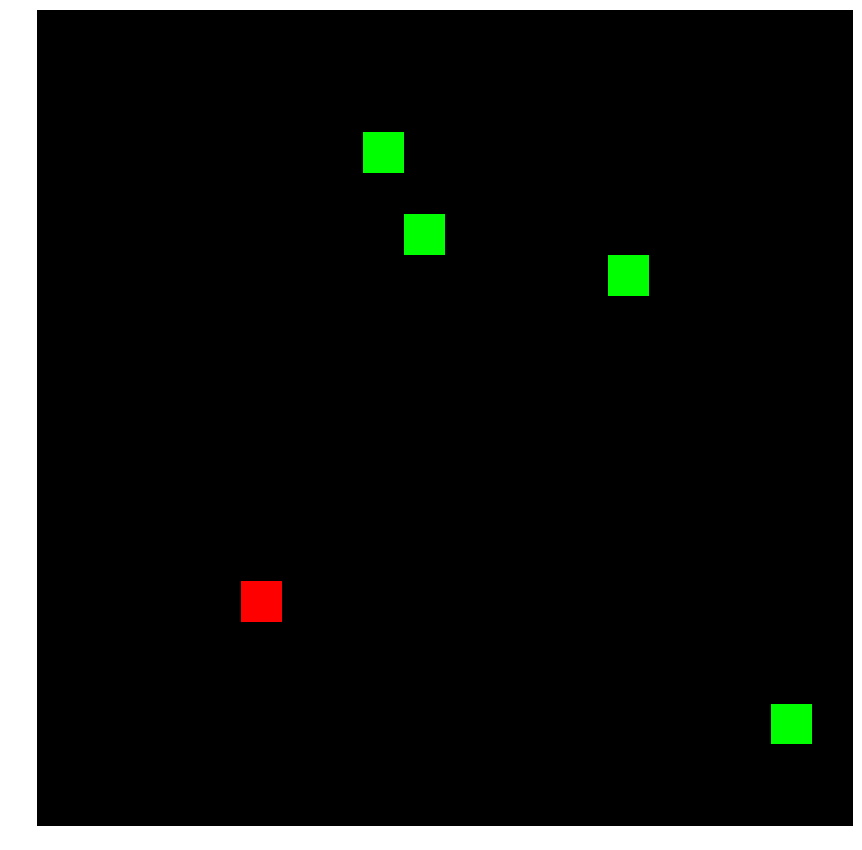

<Figure size 1080x1080 with 0 Axes>

[0]
[0]
[0]
[0]
[[[17, 2]], [[9, 15]], [[8, 17]], [[15, 13]]]


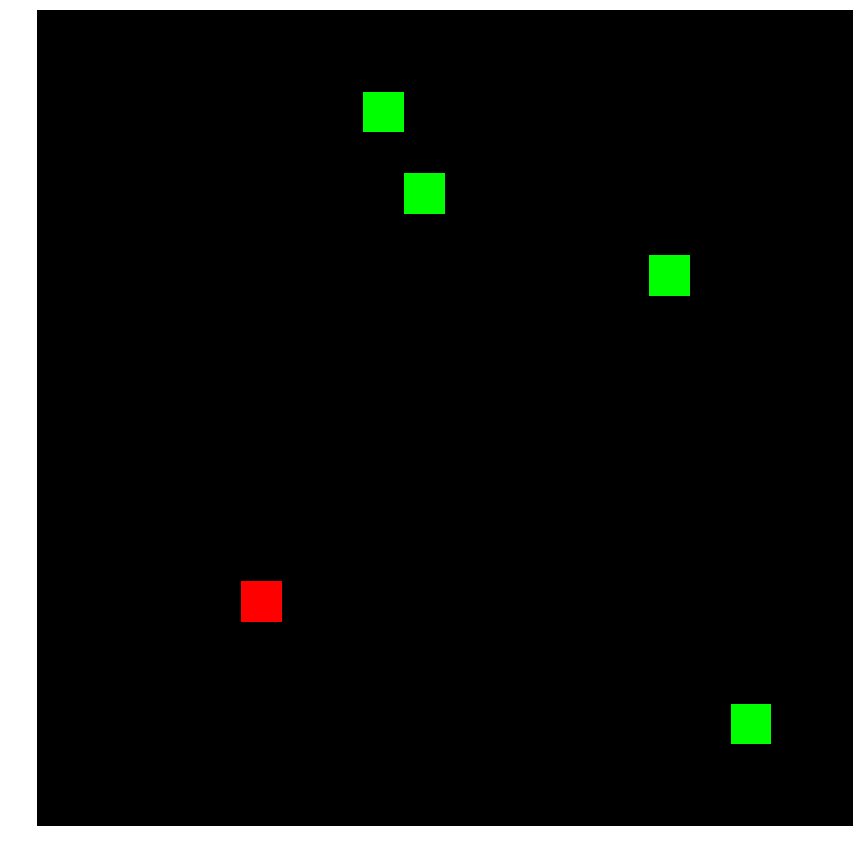

<Figure size 1080x1080 with 0 Axes>

[0]
[0]
[0]
[0]
[[[17, 1]], [[9, 14]], [[8, 16]], [[14, 13]]]


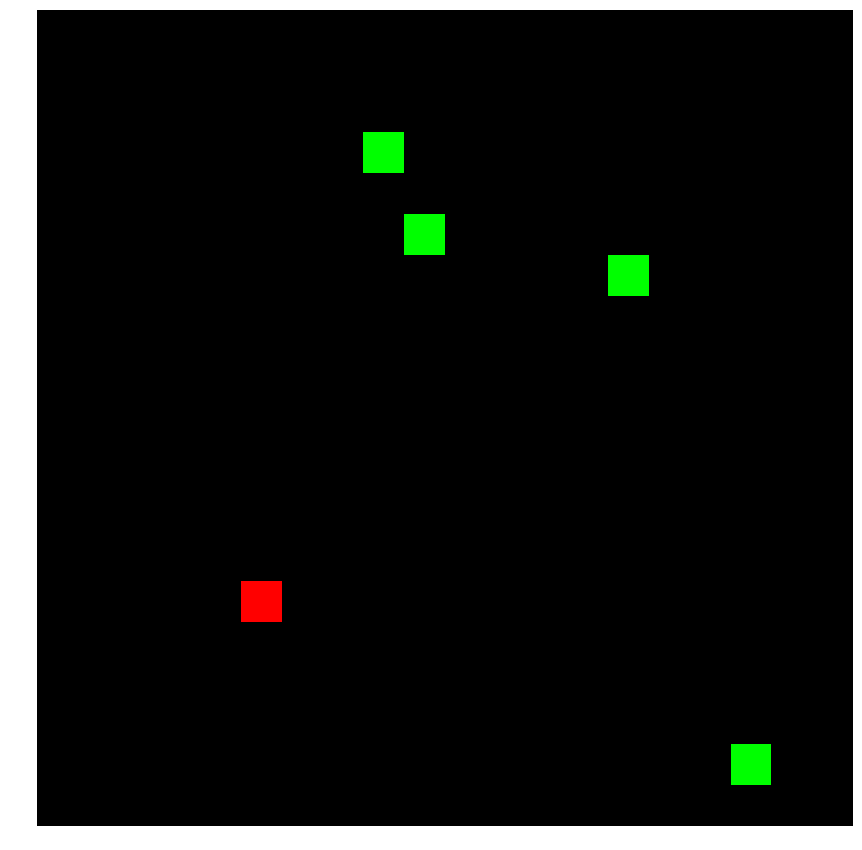

<Figure size 1080x1080 with 0 Axes>

[0]
[0]
[0]
[0]
[[[18, 1]], [[8, 14]], [[8, 17]], [[15, 13]]]


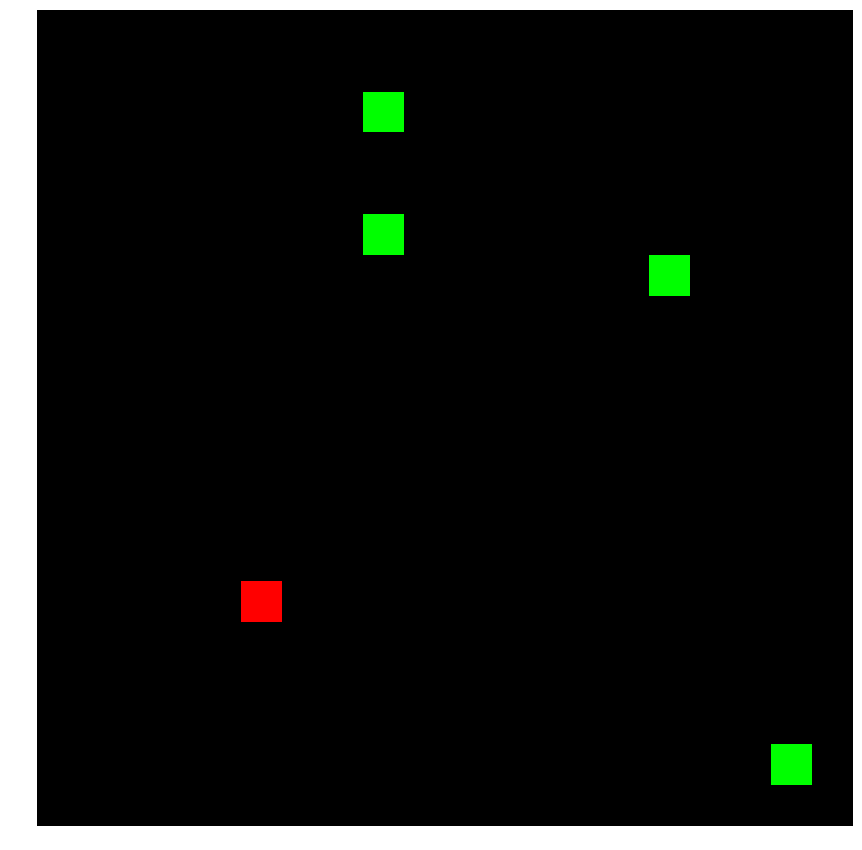

<Figure size 1080x1080 with 0 Axes>

[0]
[0]
[0]
[0]
[[[18, 0]], [[8, 13]], [[7, 17]], [[16, 13]]]


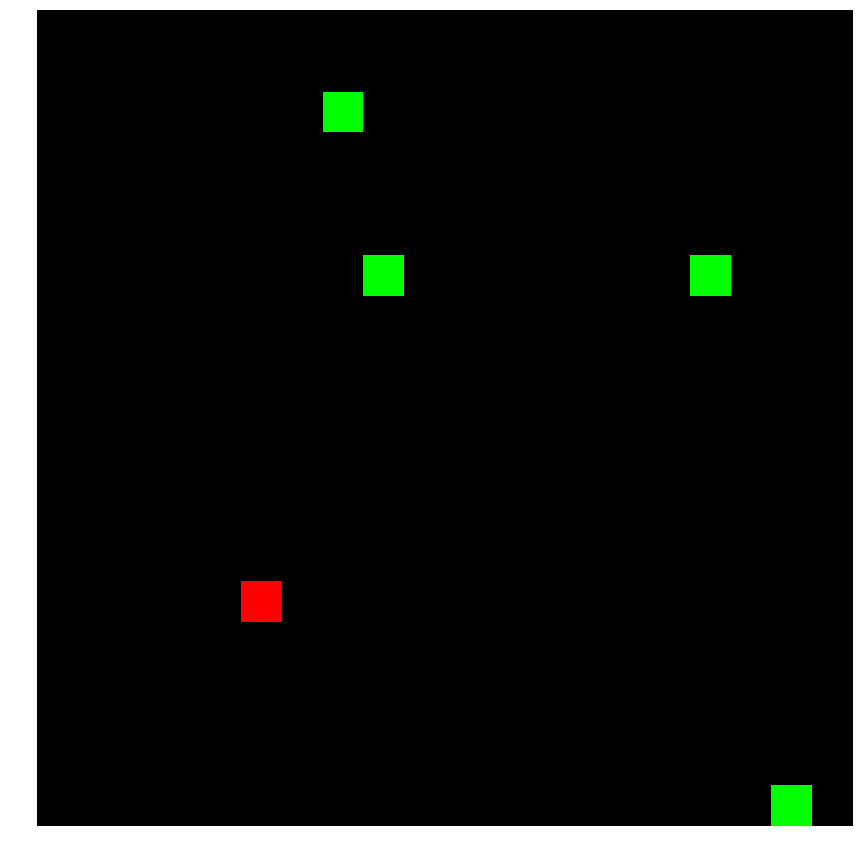

<Figure size 1080x1080 with 0 Axes>

[1]
[0]
[0]
[0]
[[[8, 14]], [[8, 17]], [[17, 13]]]


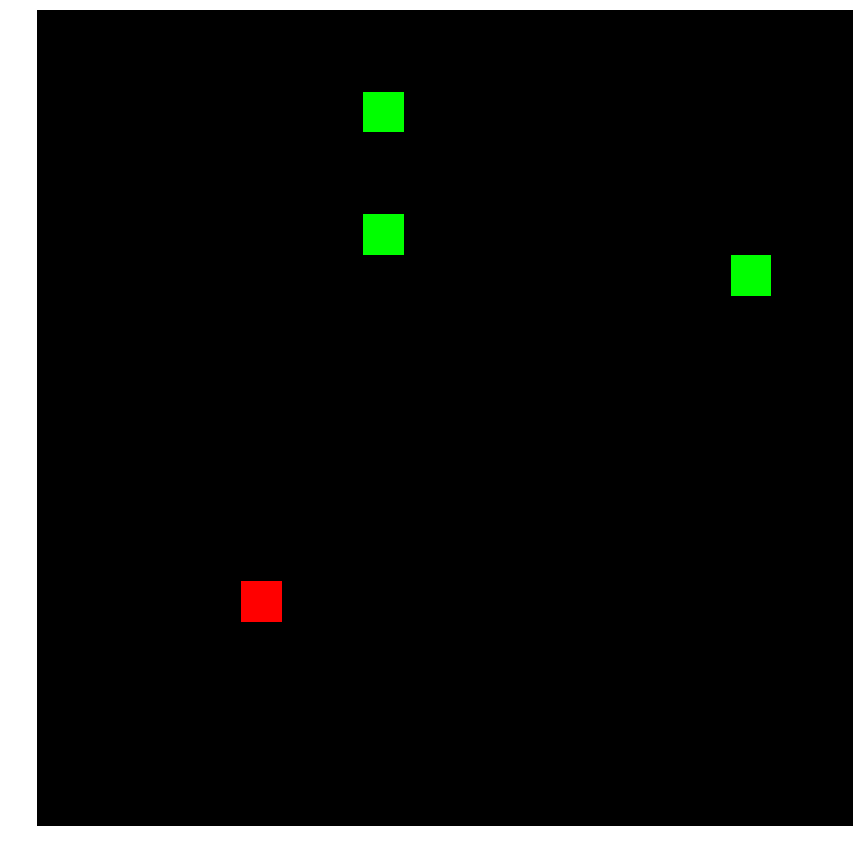

<Figure size 1080x1080 with 0 Axes>

[0]
[0]
[0]
[[[8, 15]], [[9, 17]], [[16, 13]]]


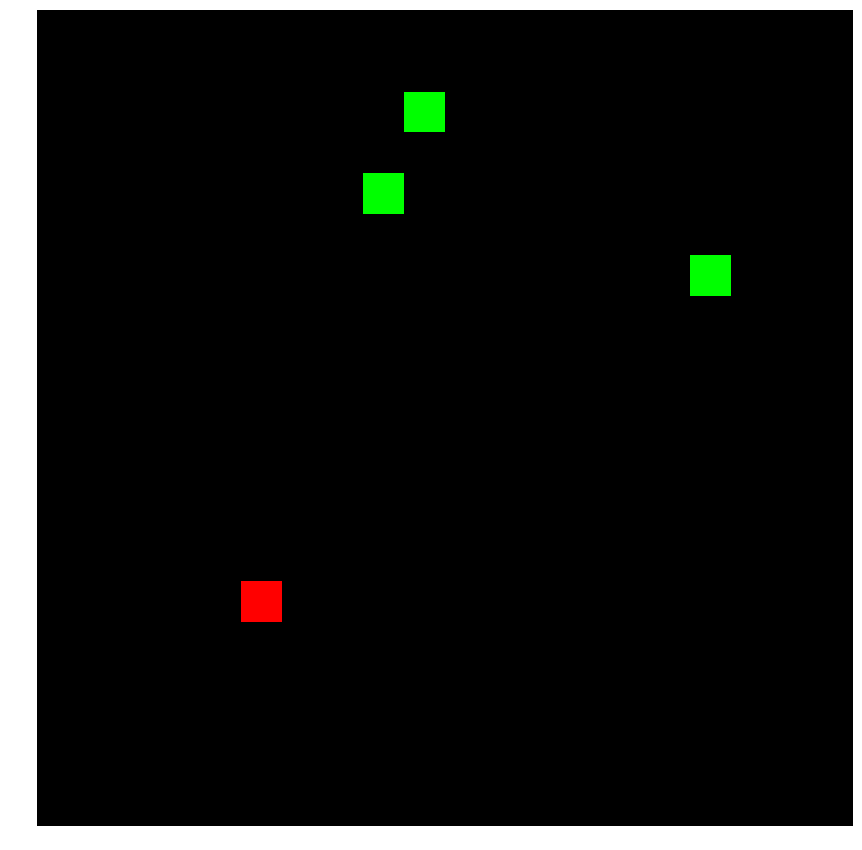

<Figure size 1080x1080 with 0 Axes>

[0]
[0]
[0]
[[[9, 15]], [[9, 18]], [[16, 14]]]


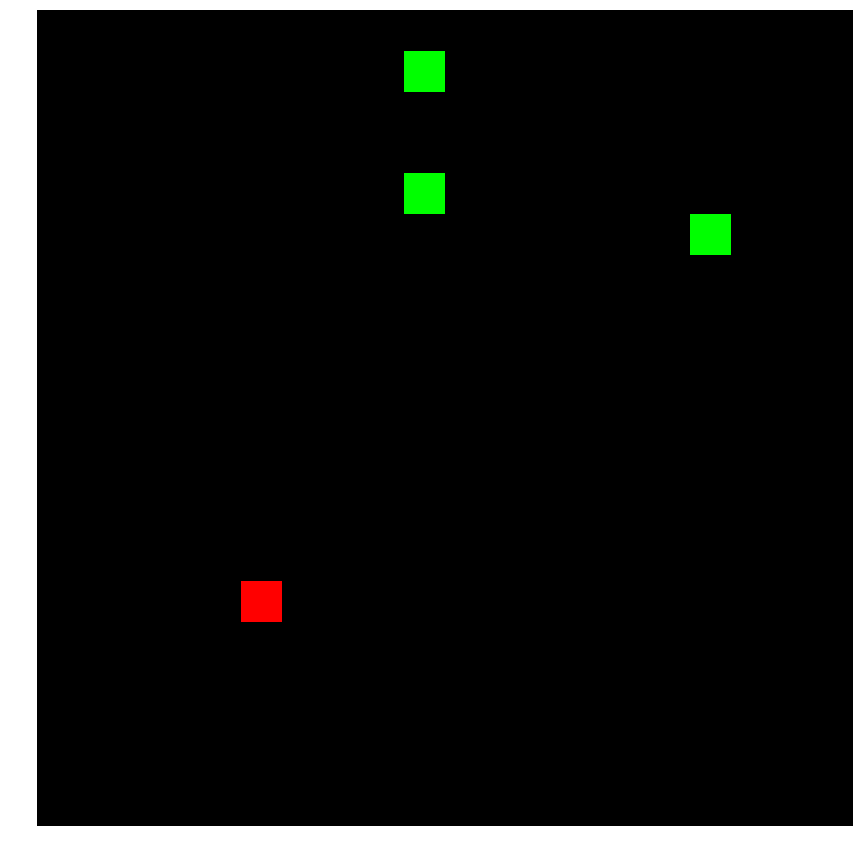

<Figure size 1080x1080 with 0 Axes>

[0]
[0]
[0]
[[[9, 14]], [[9, 19]], [[16, 13]]]


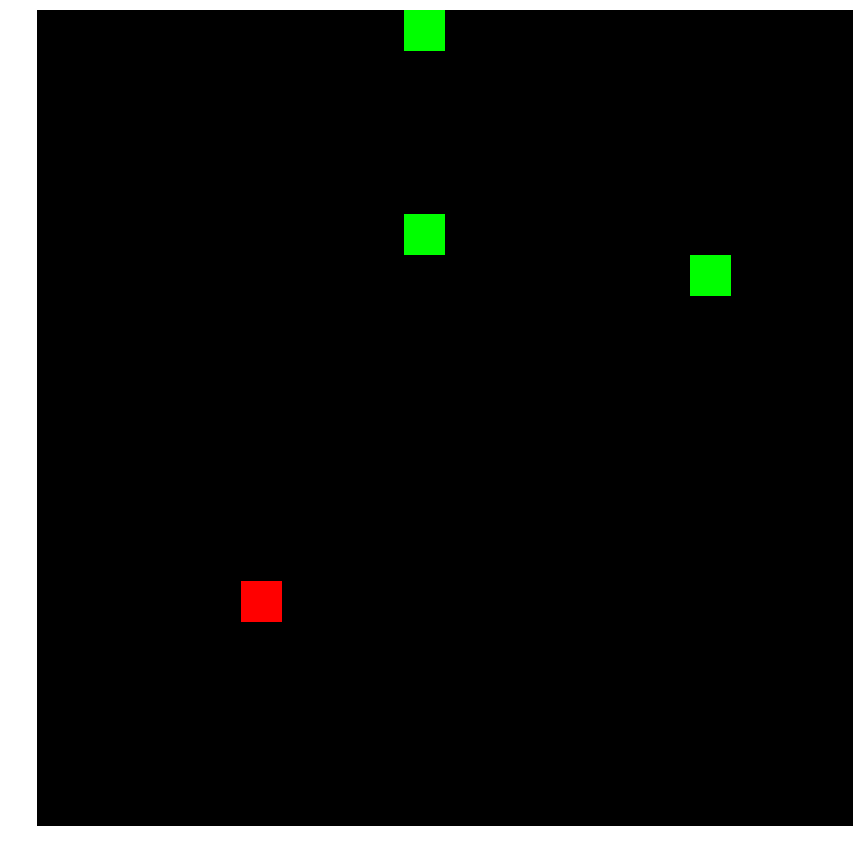

<Figure size 1080x1080 with 0 Axes>

[0]
[0]
[0]
[[[9, 15]], [[8, 19]], [[15, 13]]]


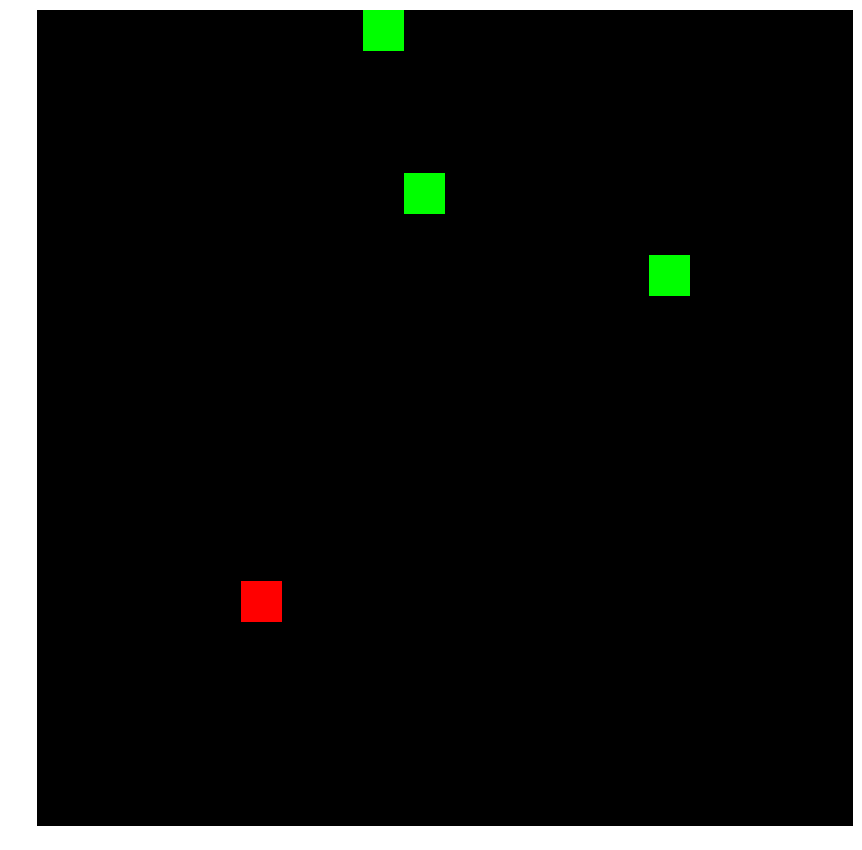

<Figure size 1080x1080 with 0 Axes>

[0]
[0]
[0]
[[[9, 14]], [[7, 19]], [[15, 14]]]


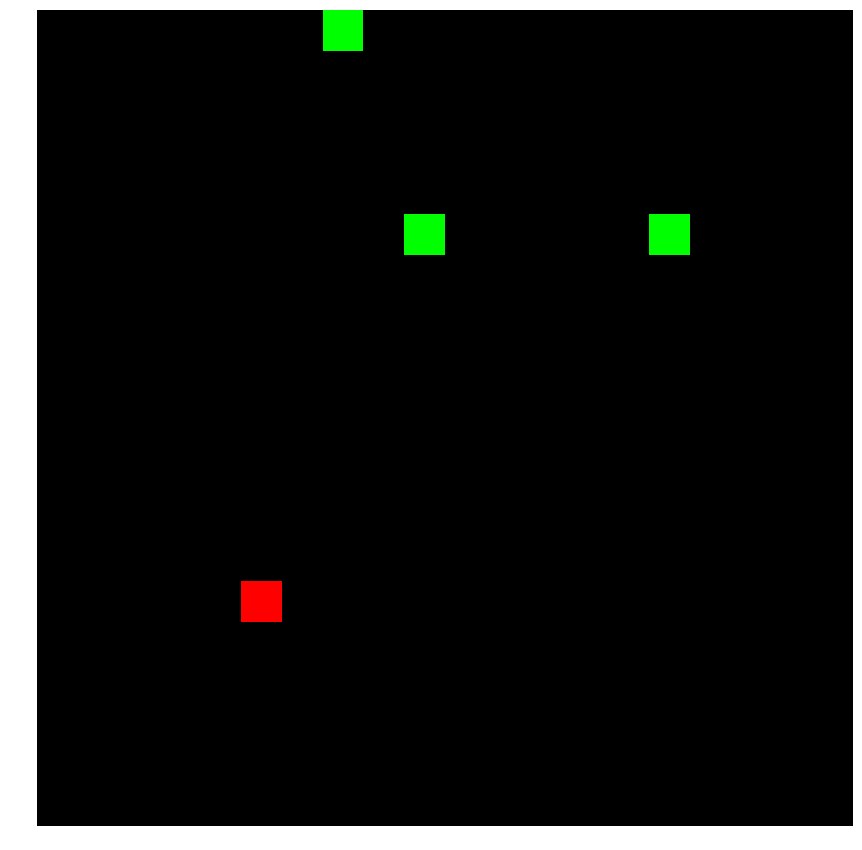

<Figure size 1080x1080 with 0 Axes>

[0]
[0]
[0]
[[[9, 15]], [[8, 19]], [[15, 13]]]


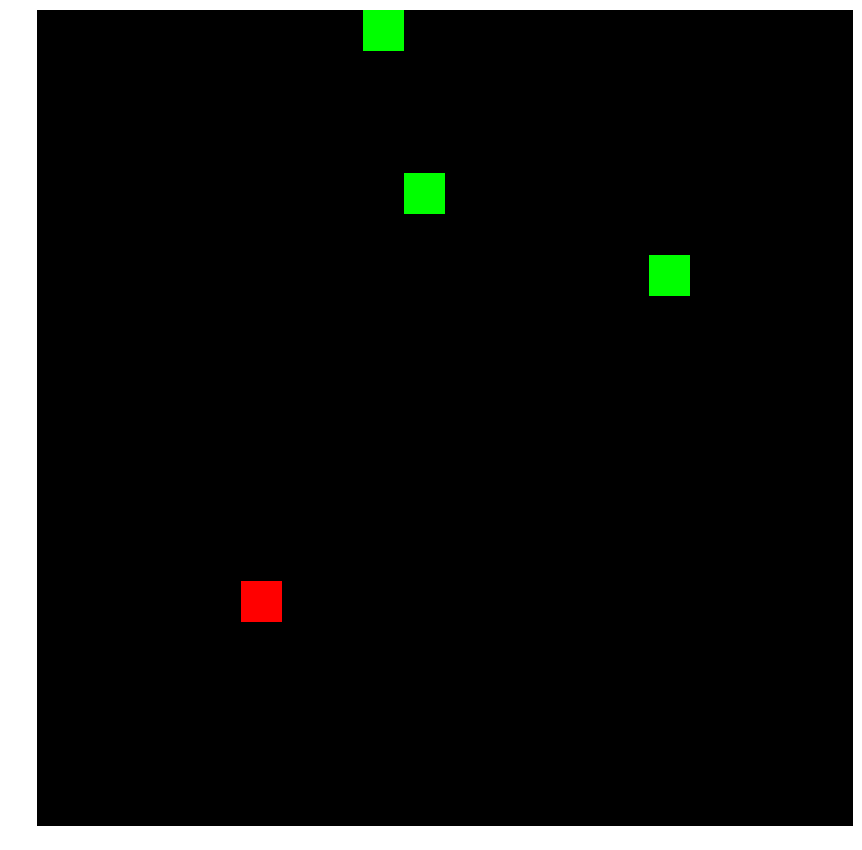

<Figure size 1080x1080 with 0 Axes>

[0]
[0]
[0]
[[[9, 14]], [[7, 19]], [[14, 13]]]


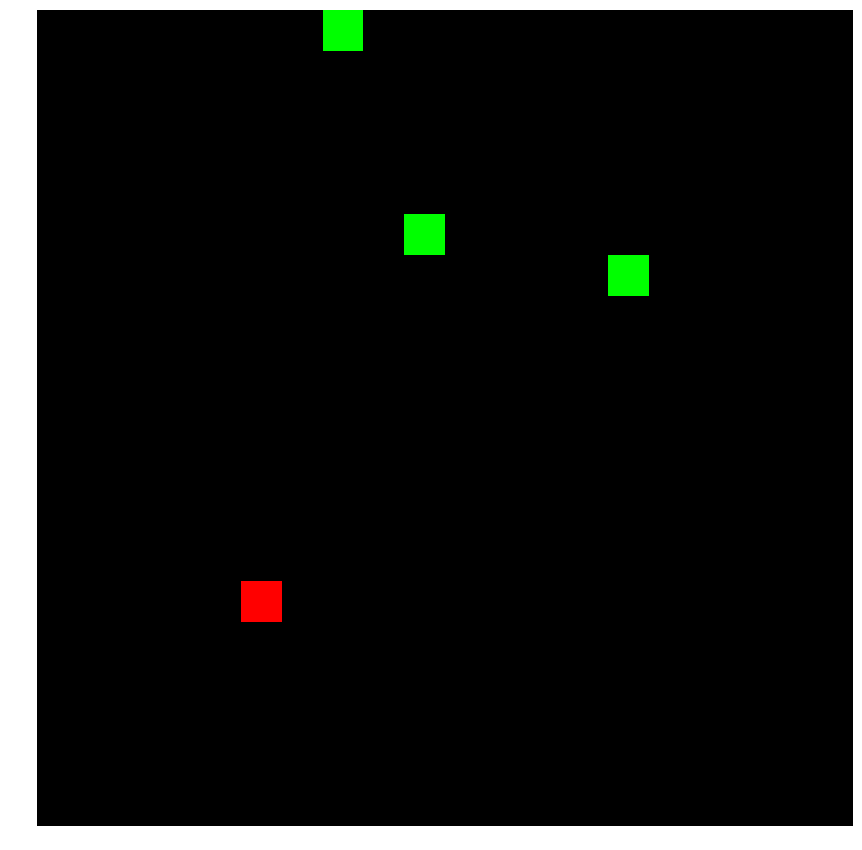

<Figure size 1080x1080 with 0 Axes>

[0]
[0]
[0]
[[[10, 14]], [[8, 19]], [[14, 12]]]


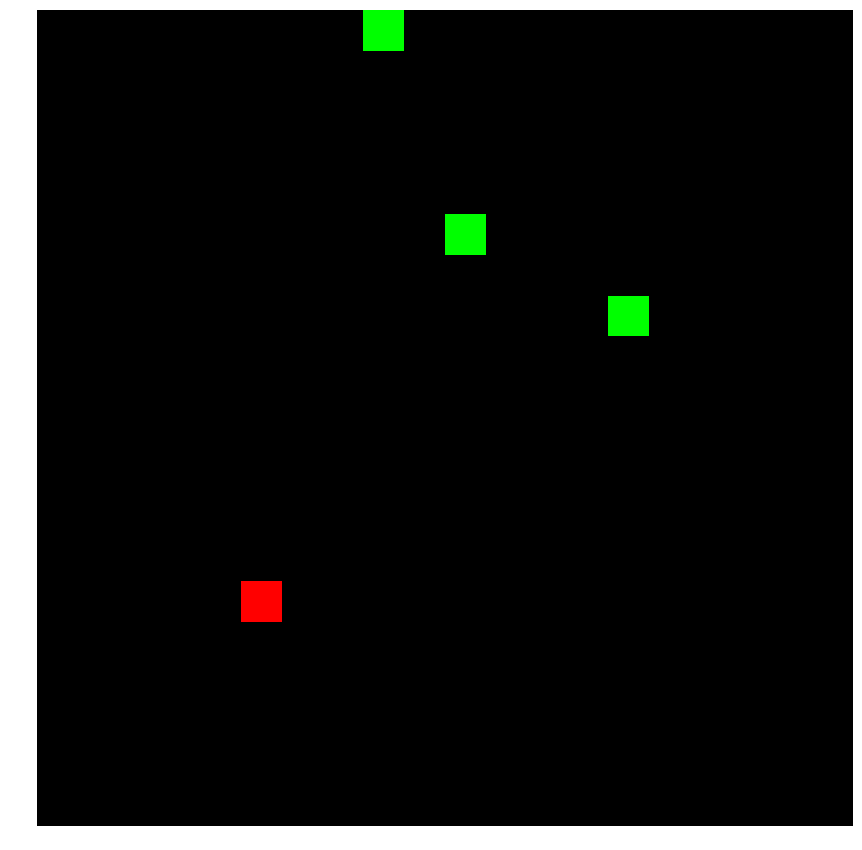

<Figure size 1080x1080 with 0 Axes>

[0]
[0]
[0]
[[[11, 14]], [[9, 19]], [[15, 12]]]


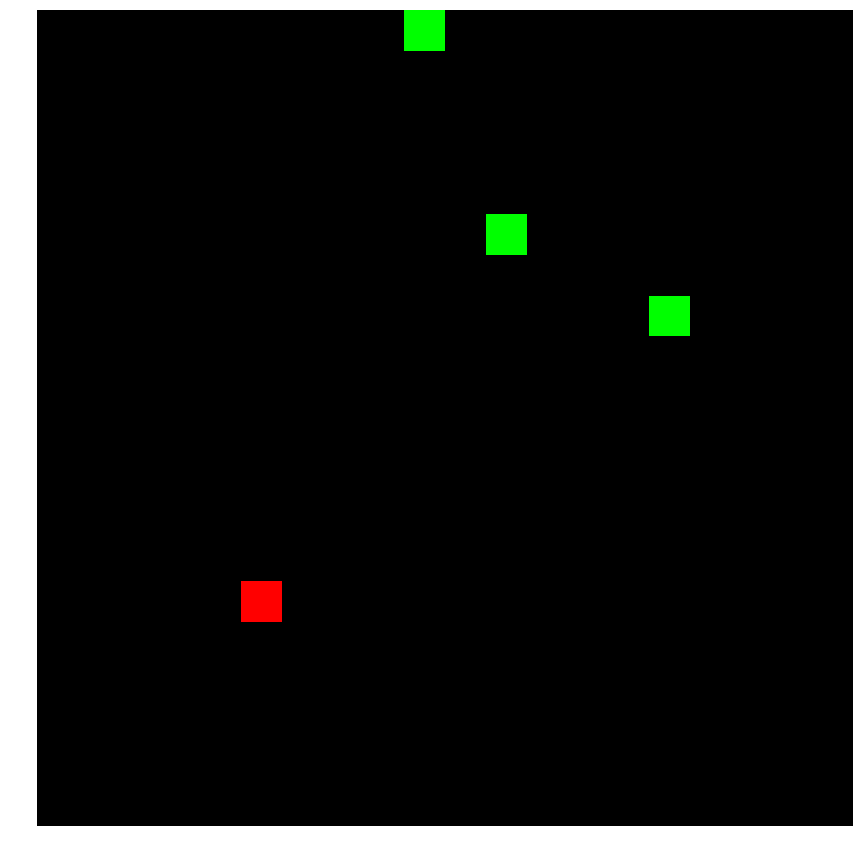

<Figure size 1080x1080 with 0 Axes>

[0]
[0]
[0]
[[[11, 15]], [[9, 18]], [[14, 12]]]


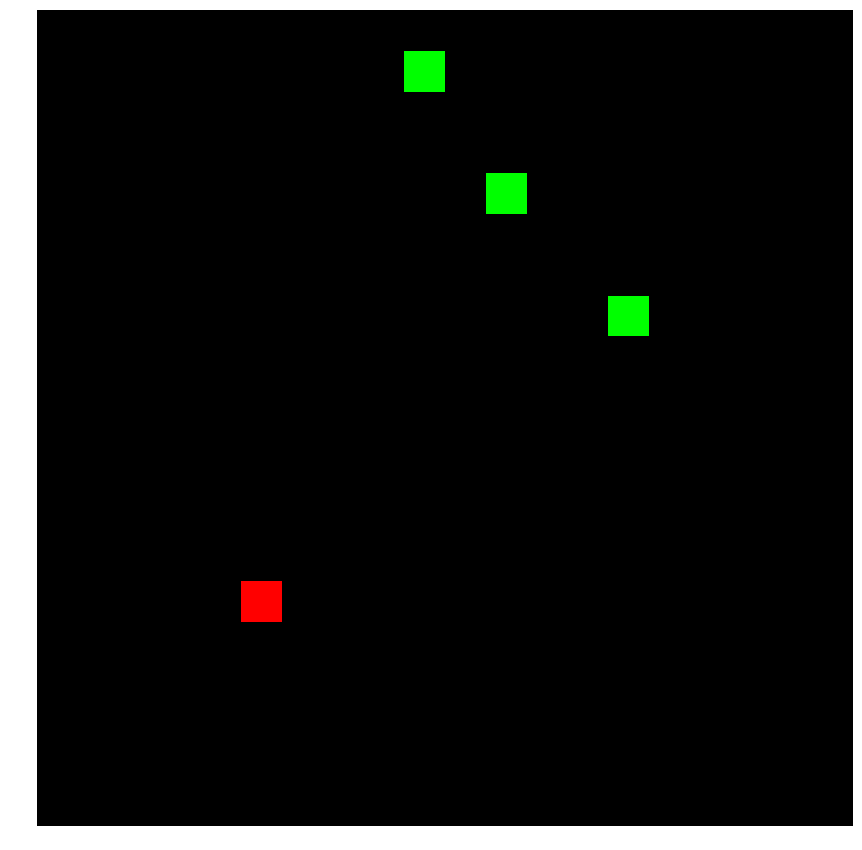

<Figure size 1080x1080 with 0 Axes>

[0]
[0]
[0]
[[[11, 14]], [[9, 17]], [[14, 13]]]


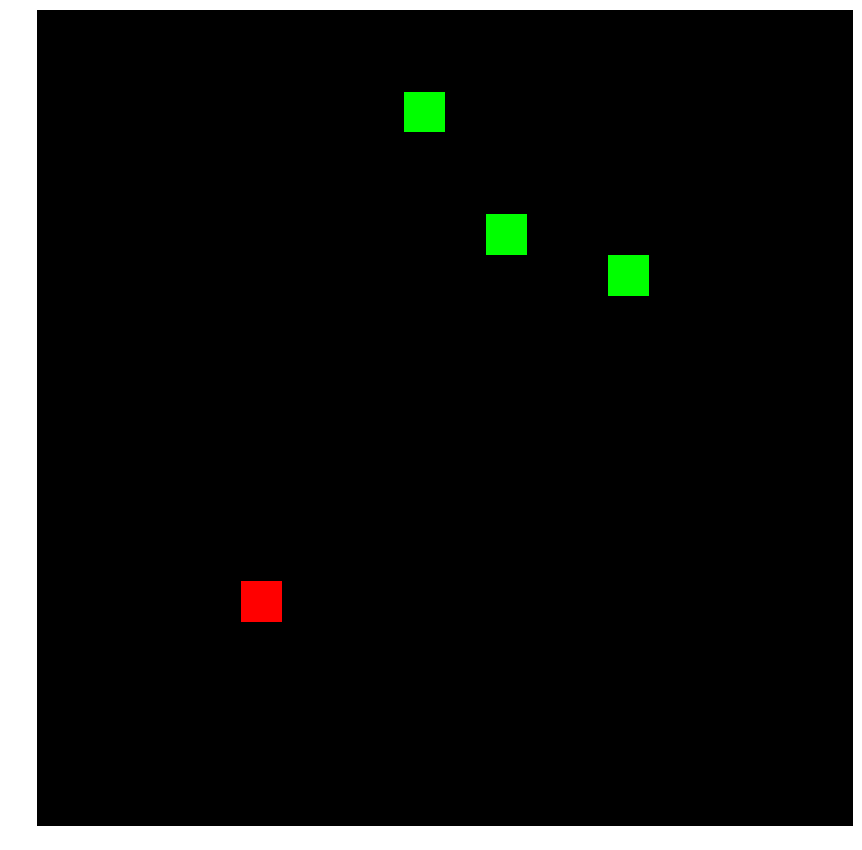

<Figure size 1080x1080 with 0 Axes>

[0]
[0]
[0]
[[[12, 14]], [[8, 17]], [[14, 12]]]


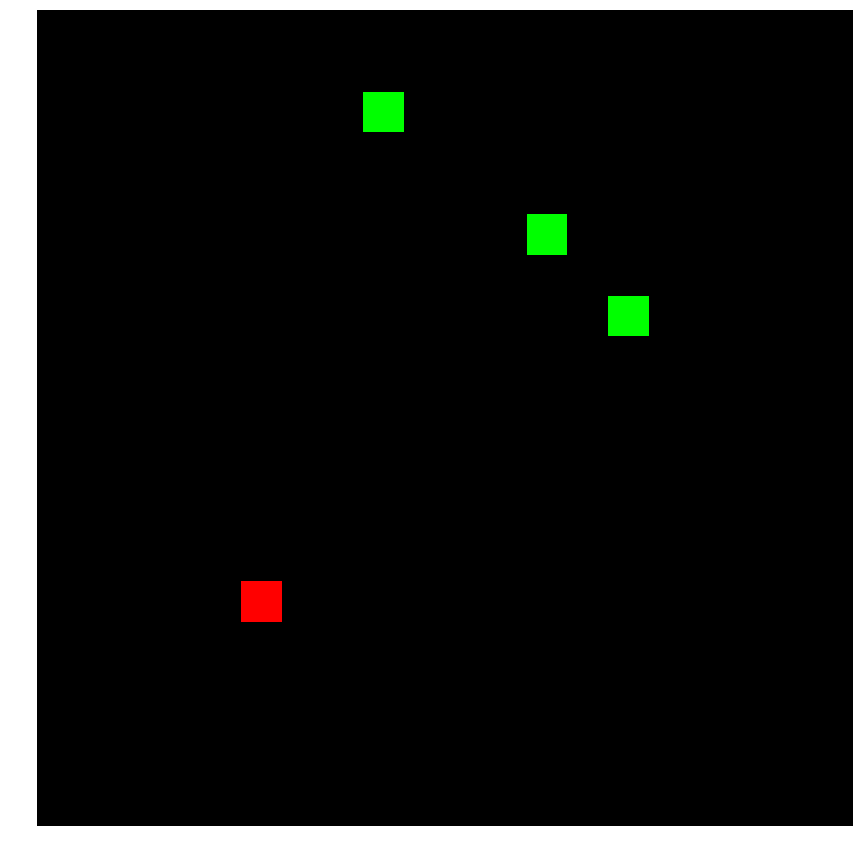

<Figure size 1080x1080 with 0 Axes>

[0]
[0]
[0]
[[[13, 14]], [[8, 16]], [[14, 13]]]


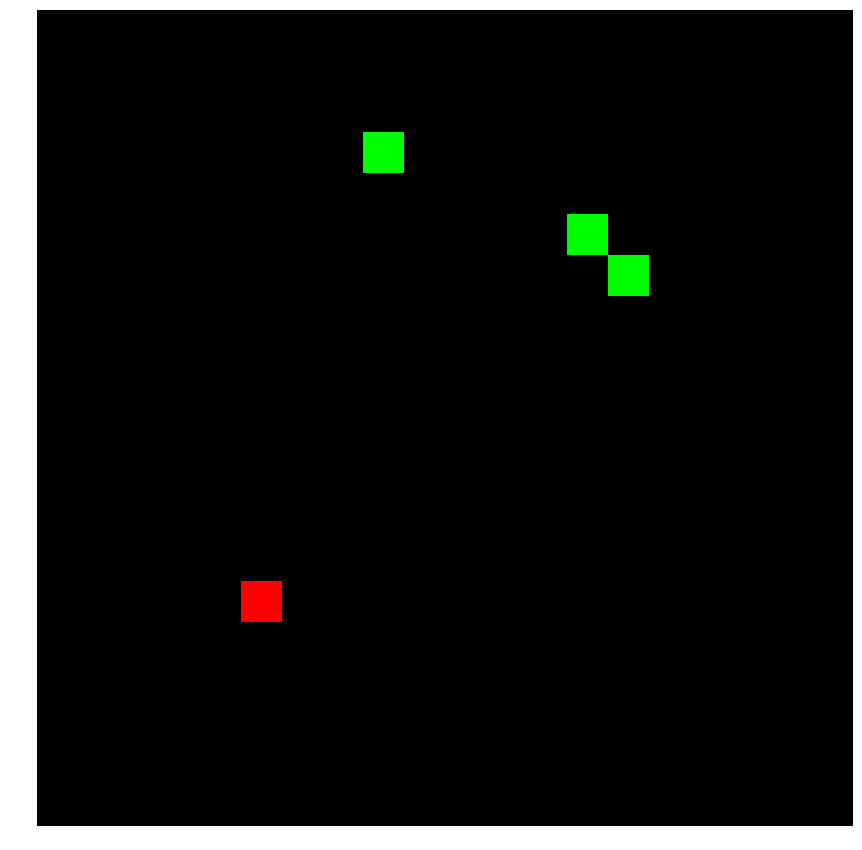

<Figure size 1080x1080 with 0 Axes>

[0]
[0]
[0]
[[[13, 13]], [[9, 16]], [[14, 14]]]


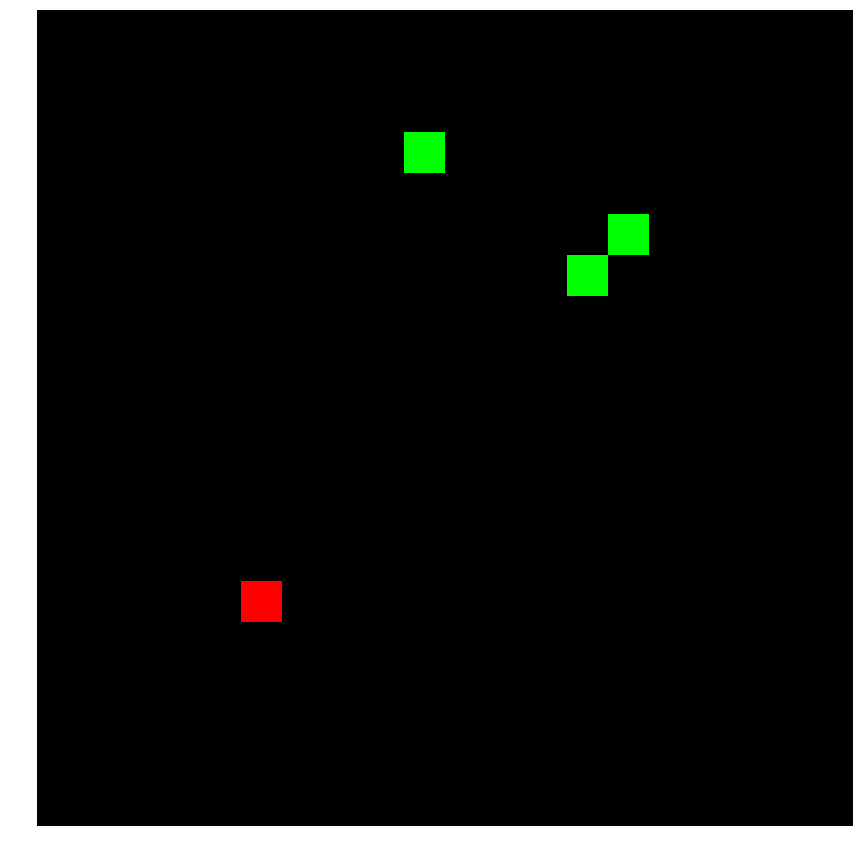

<Figure size 1080x1080 with 0 Axes>

[0]
[0]
[0]
[[[13, 12]], [[9, 15]], [[14, 15]]]


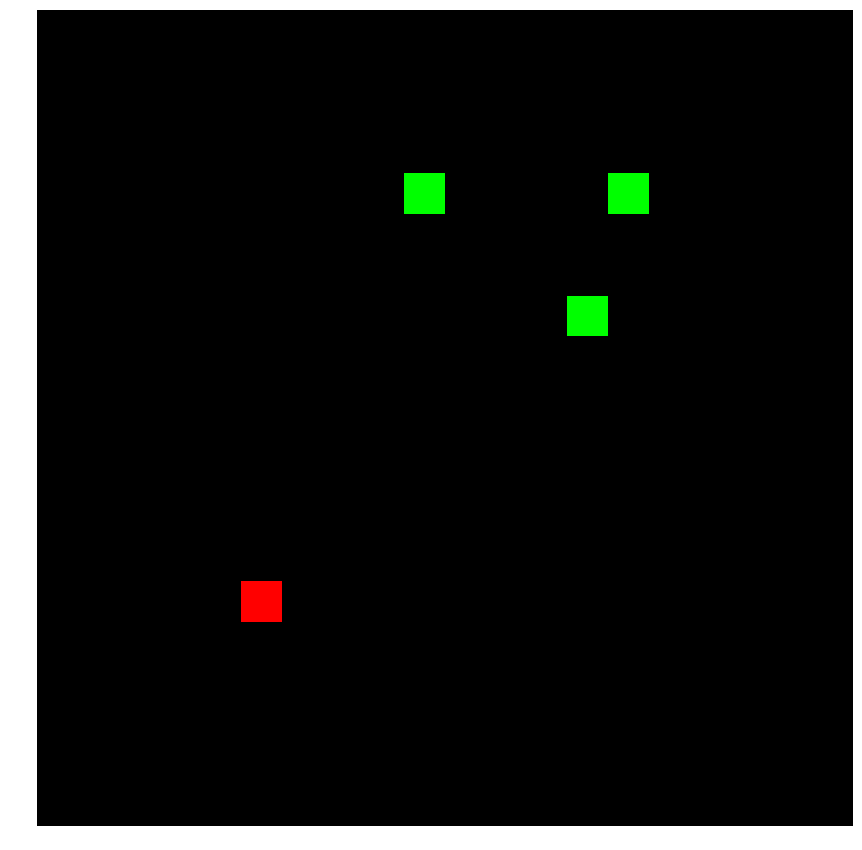

<Figure size 1080x1080 with 0 Axes>

[0]
[0]
[0]
[[[13, 11]], [[9, 16]], [[15, 15]]]


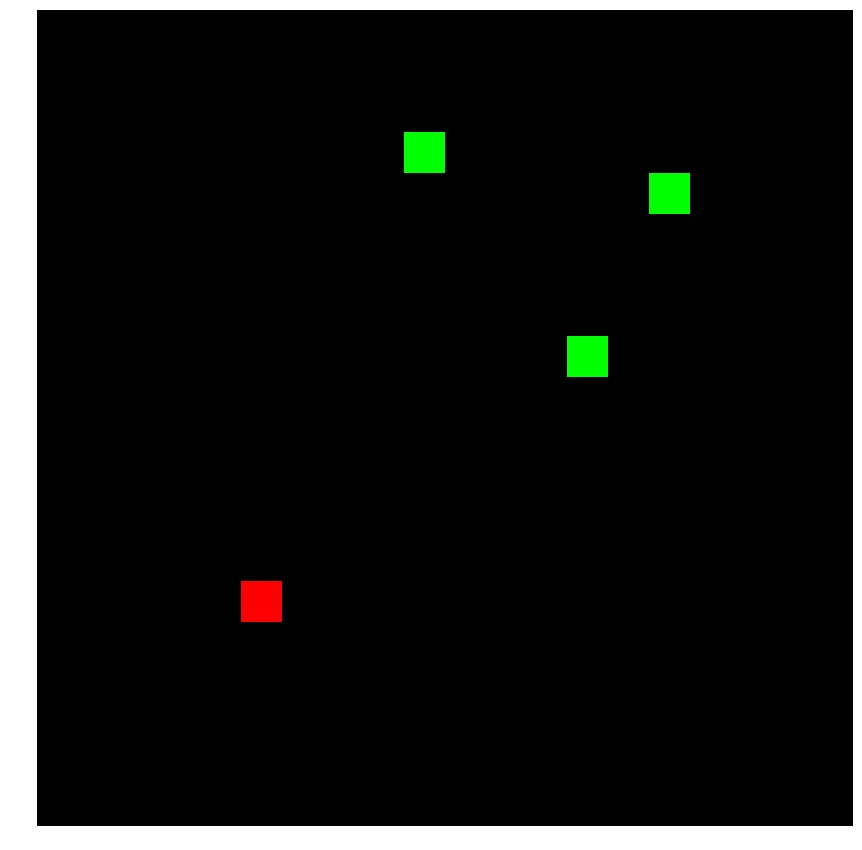

<Figure size 1080x1080 with 0 Axes>

[0]
[0]
[0]
[[[13, 10]], [[10, 16]], [[15, 16]]]


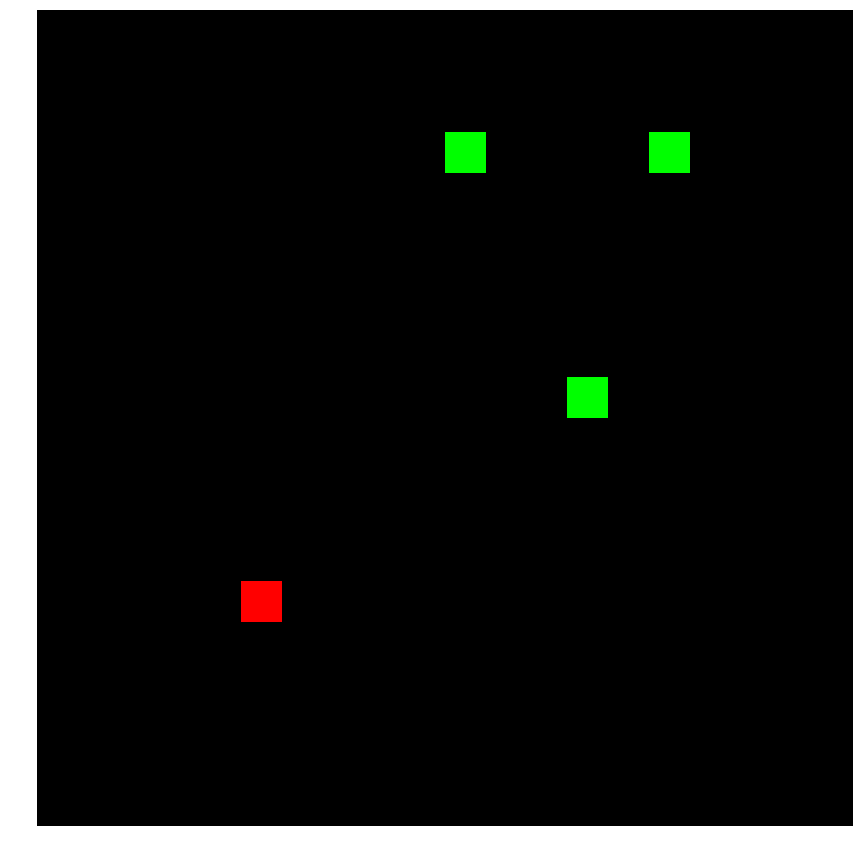

<Figure size 1080x1080 with 0 Axes>

[0]
[0]
[0]
[[[13, 11]], [[9, 16]], [[14, 16]]]


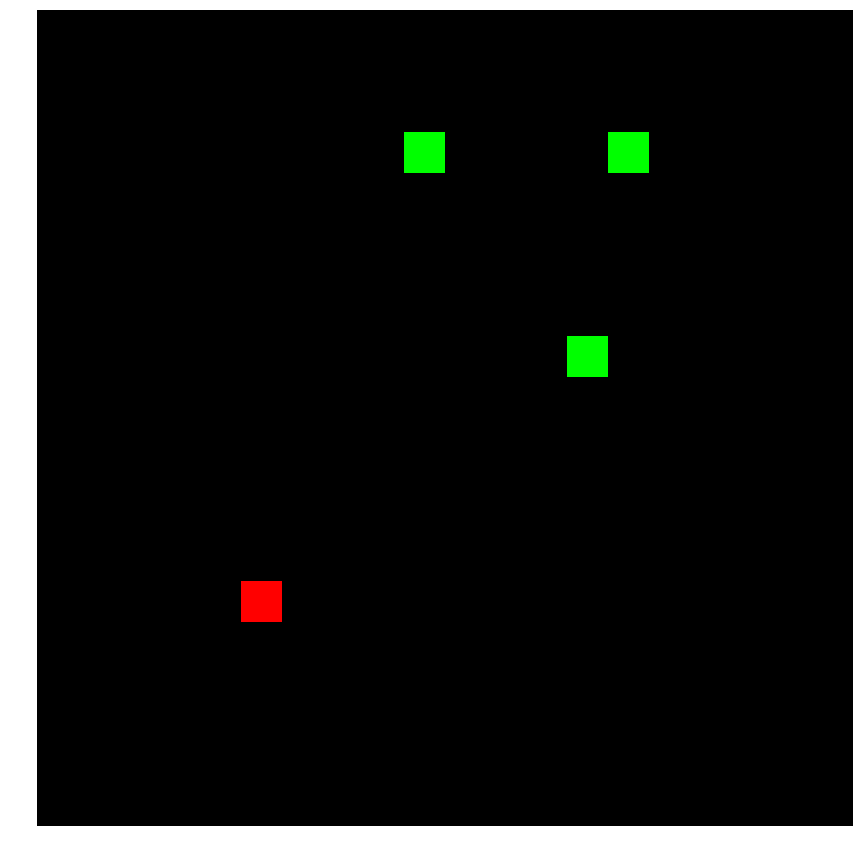

<Figure size 1080x1080 with 0 Axes>

[0]
[0]
[0]
[[[12, 11]], [[9, 17]], [[15, 16]]]


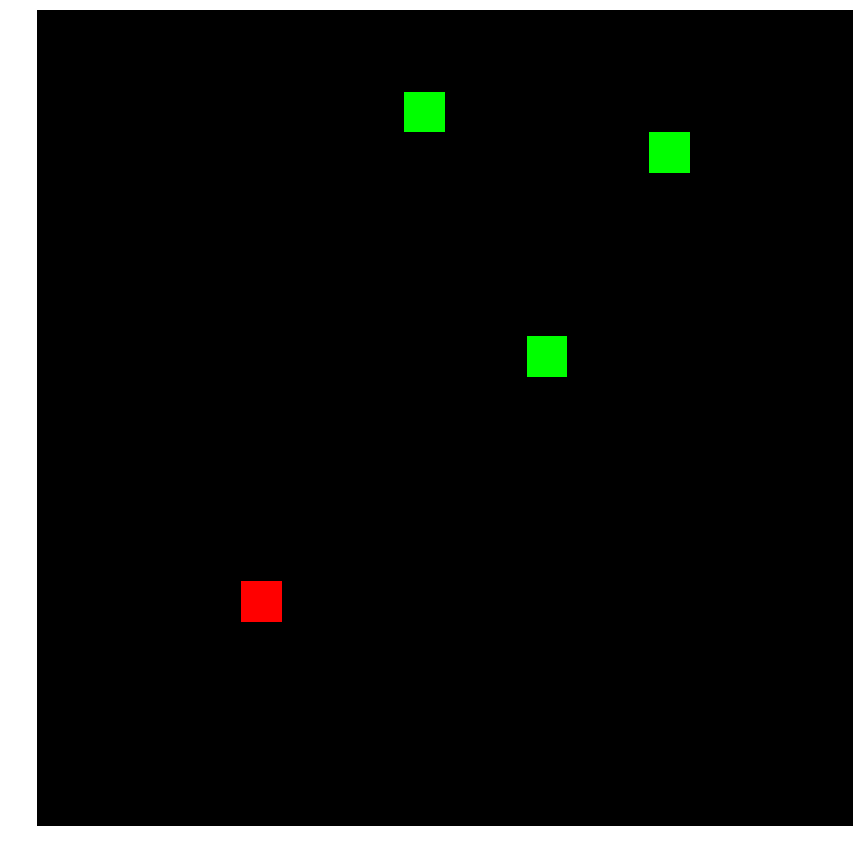

<Figure size 1080x1080 with 0 Axes>

[0]
[0]
[0]
[[[12, 12]], [[9, 16]], [[16, 16]]]


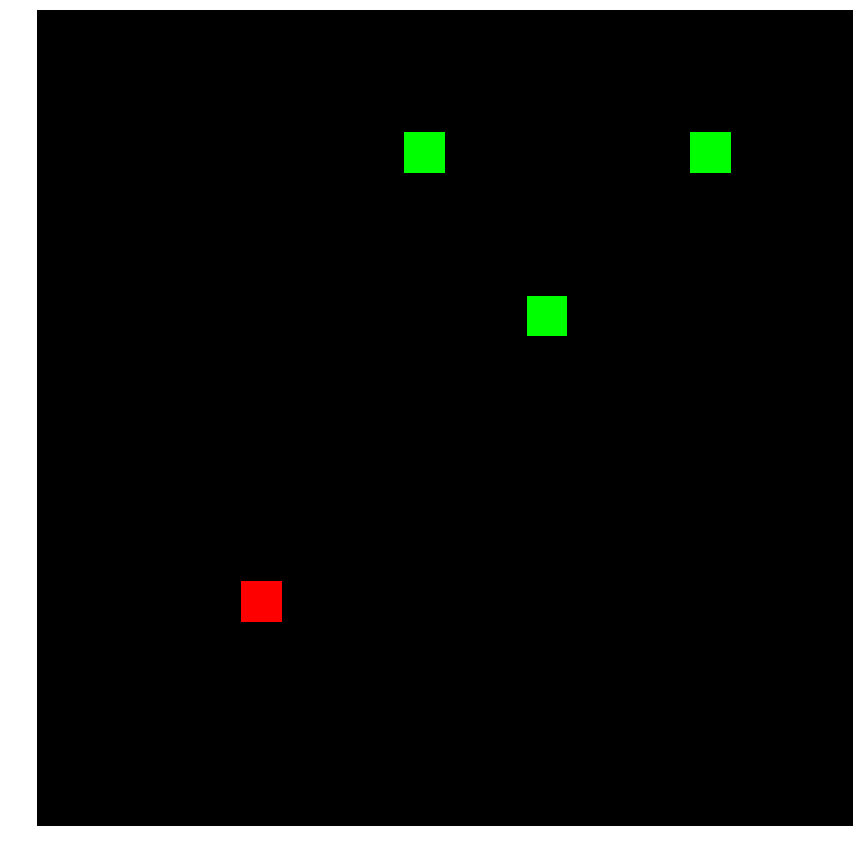

<Figure size 1080x1080 with 0 Axes>

[0]
[0]
[0]
[[[12, 13]], [[8, 16]], [[15, 16]]]


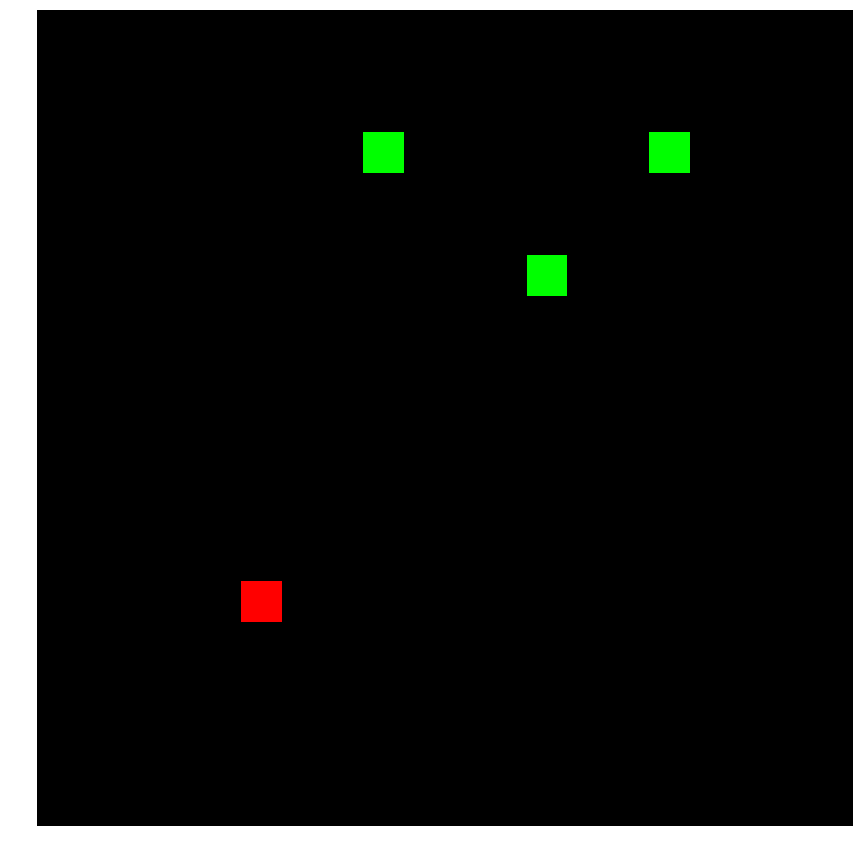

<Figure size 1080x1080 with 0 Axes>

[0]
[0]
[0]
[[[13, 13]], [[8, 15]], [[16, 16]]]


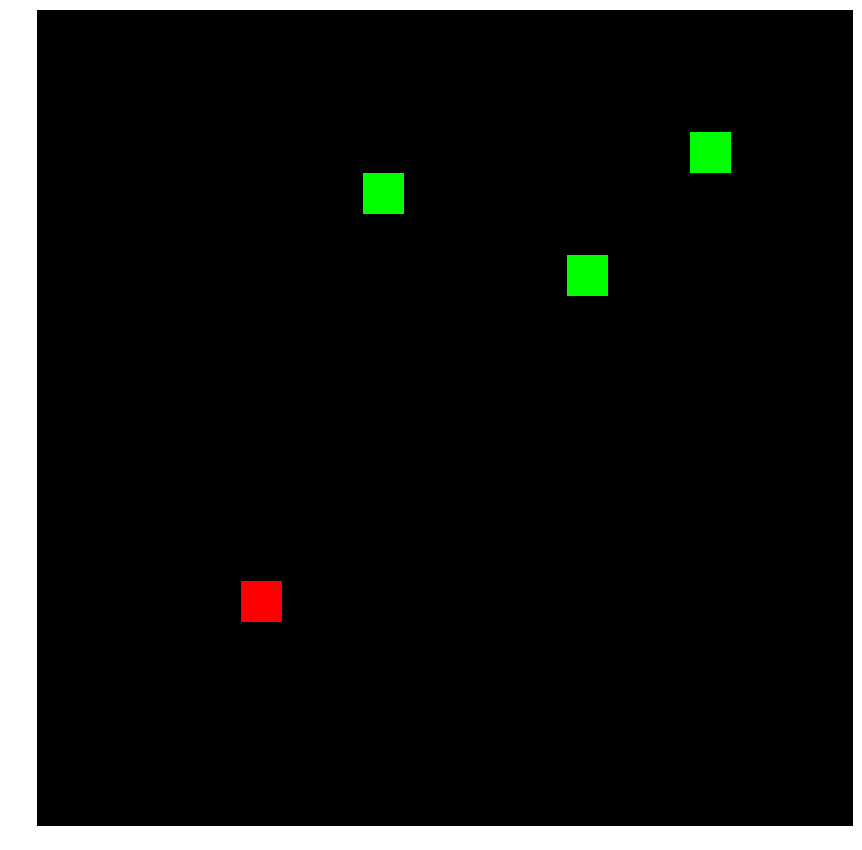

<Figure size 1080x1080 with 0 Axes>

[0]
[0]
[0]
[[[13, 12]], [[8, 14]], [[16, 15]]]


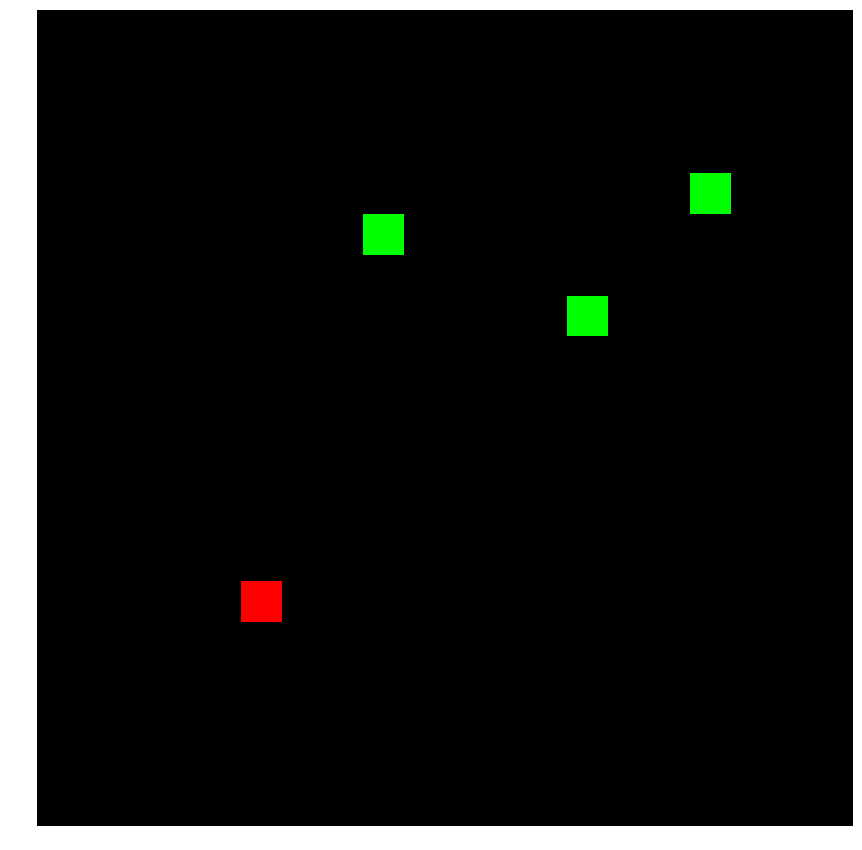

<Figure size 1080x1080 with 0 Axes>

[0]
[0]
[0]
[[[12, 12]], [[7, 14]], [[15, 15]]]


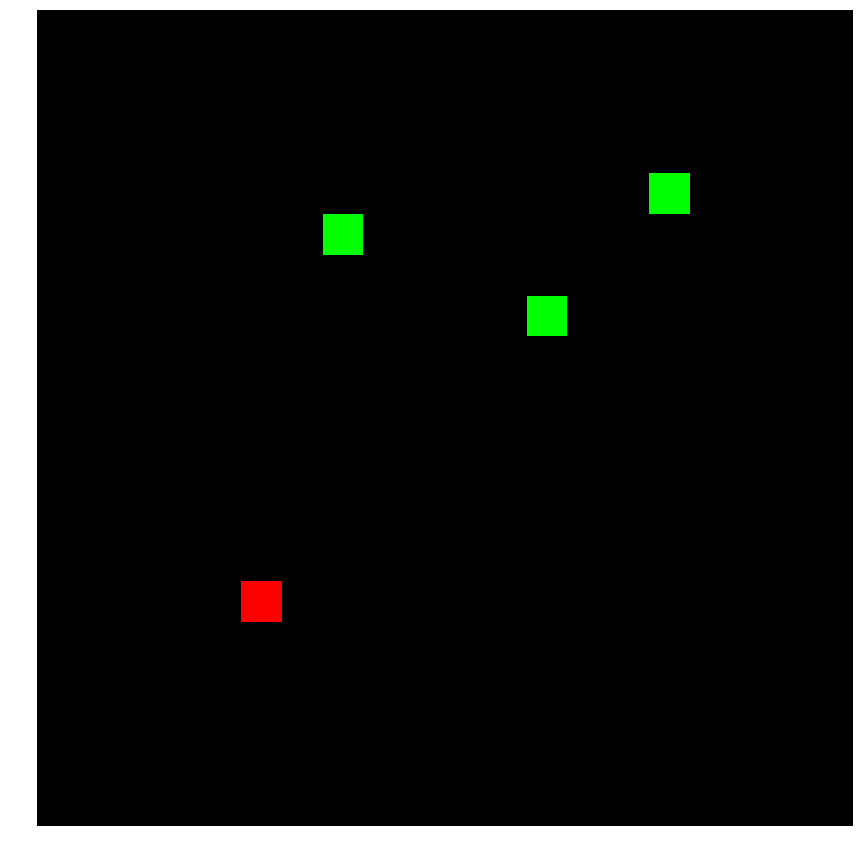

<Figure size 1080x1080 with 0 Axes>

[0]
[0]
[0]
[[[12, 13]], [[7, 15]], [[16, 15]]]


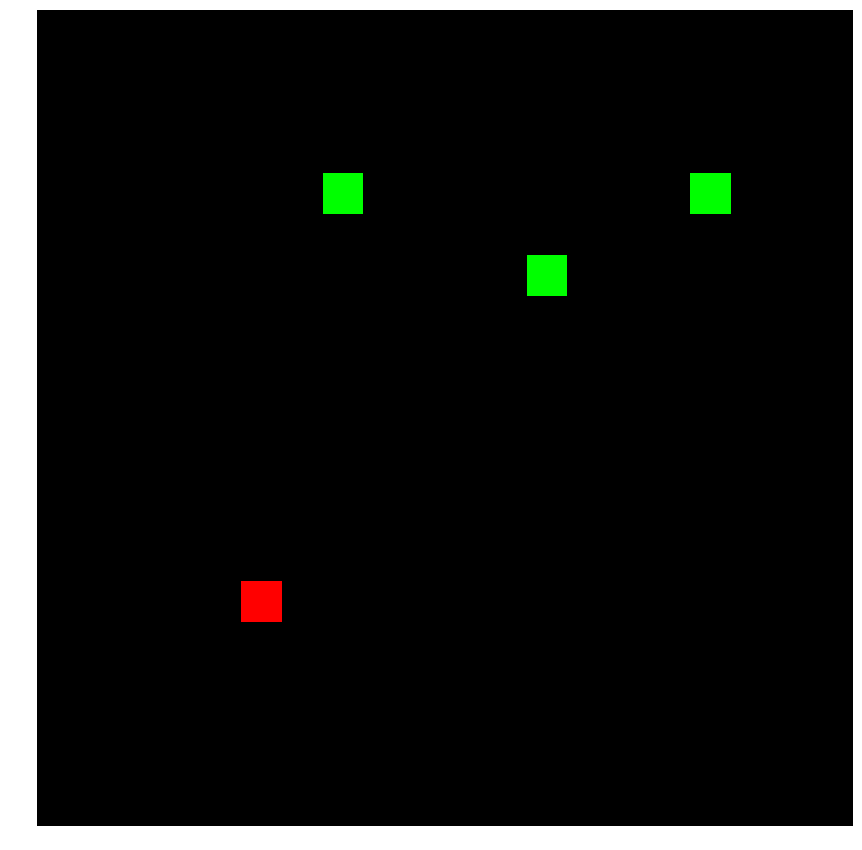

<Figure size 1080x1080 with 0 Axes>

[0]
[0]
[0]
[[[13, 13]], [[6, 15]], [[17, 15]]]


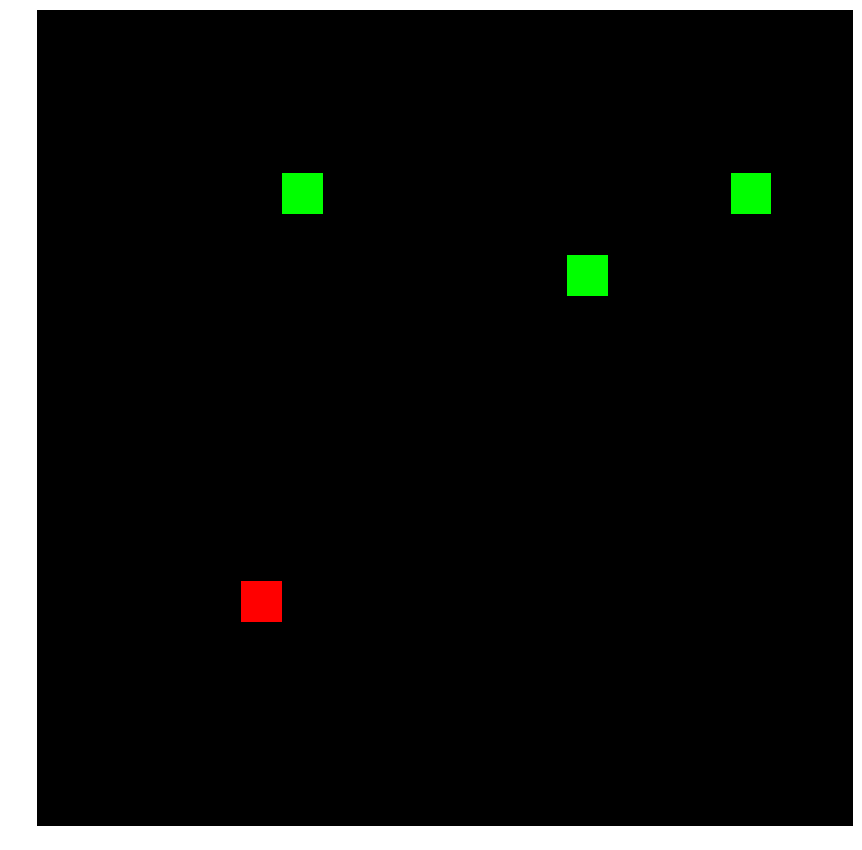

<Figure size 1080x1080 with 0 Axes>

[0]
[0]
[0]
[[[14, 13]], [[5, 15]], [[17, 14]]]


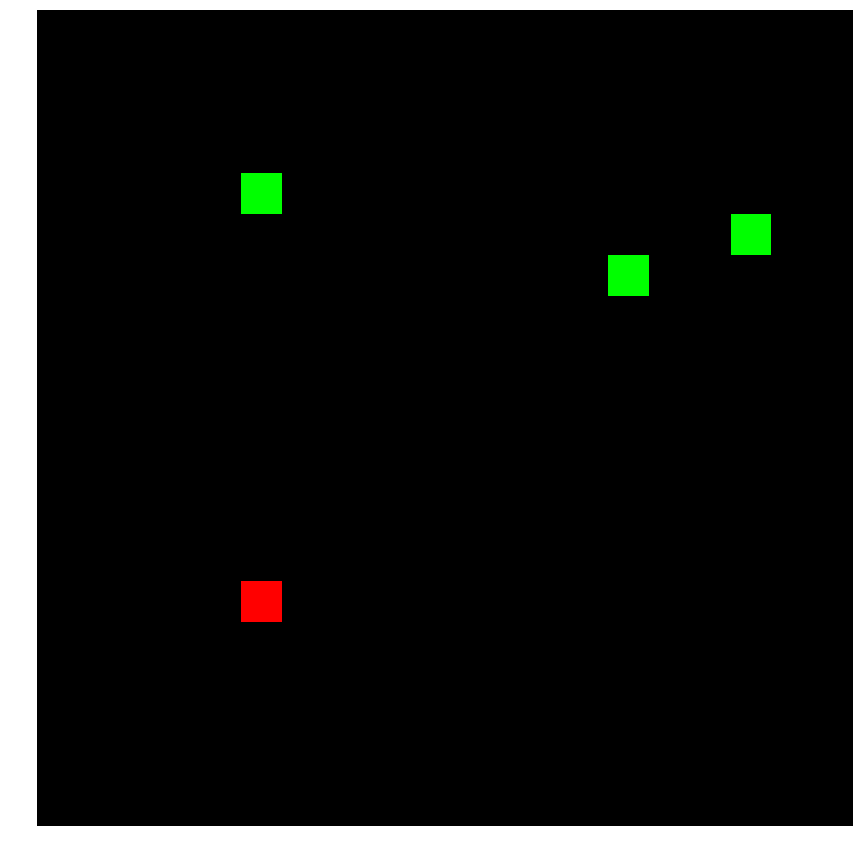

<Figure size 1080x1080 with 0 Axes>

[0]
[0]
[0]
[[[14, 12]], [[5, 16]], [[16, 14]]]


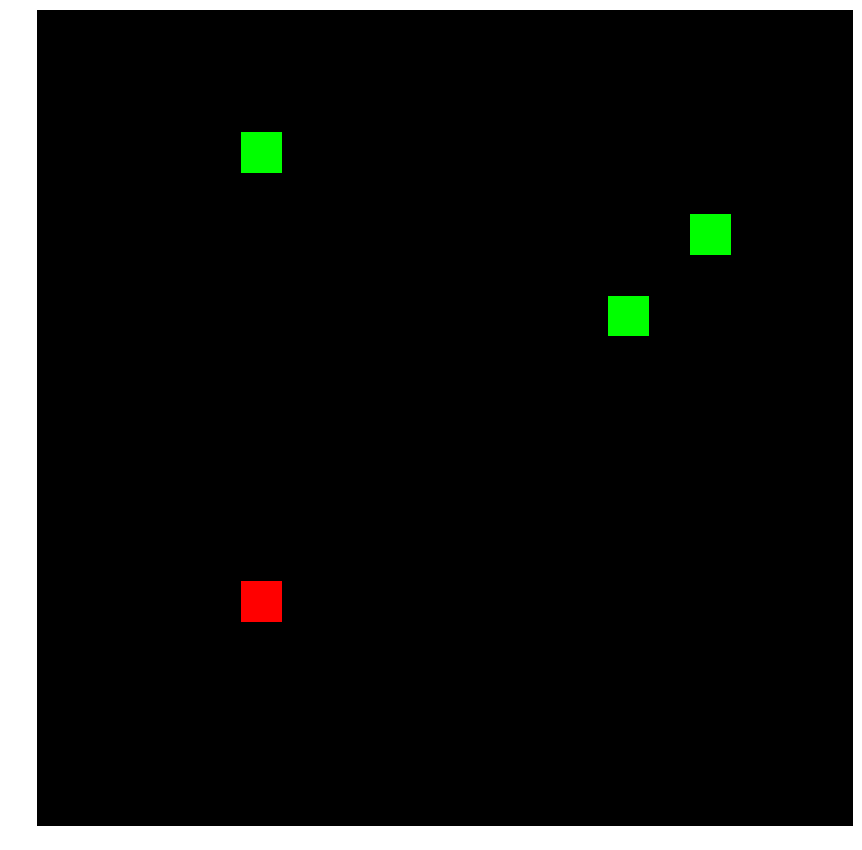

<Figure size 1080x1080 with 0 Axes>

[0]
[0]
[0]
[[[13, 12]], [[5, 15]], [[15, 14]]]


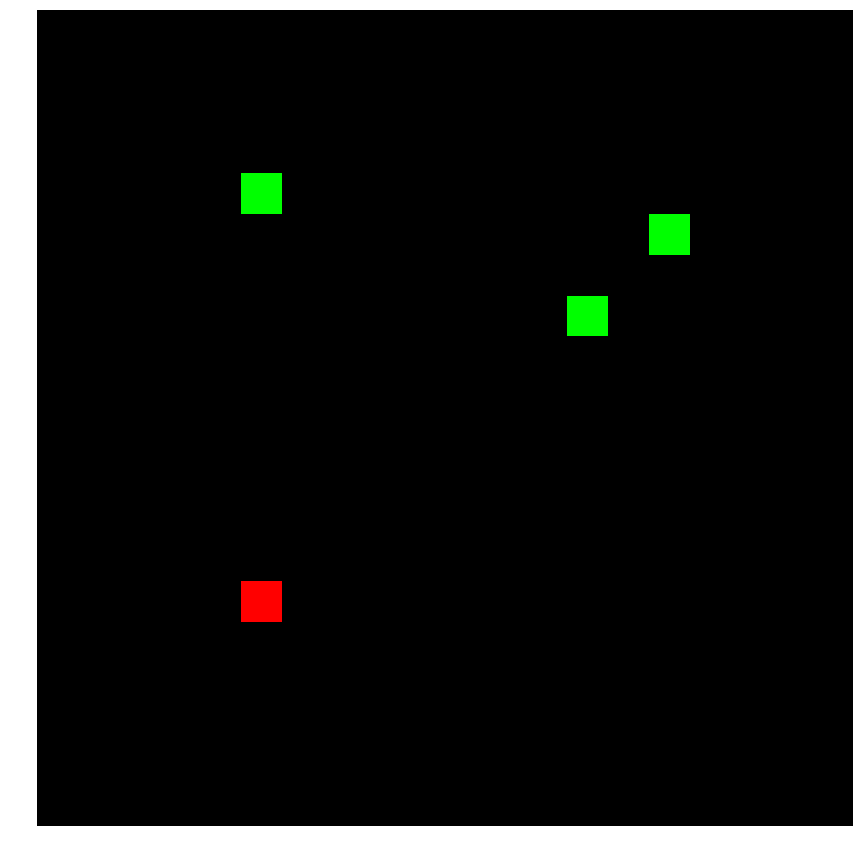

<Figure size 1080x1080 with 0 Axes>

In [10]:
for iter in range (0,100):

    if len(bacters)<=2:
        addN = randint(1,3)
        for i in range(0,addN):
            bacters = bacters + bacter0(foods)
        
    #check growth then move
    
    for i in range(0,len(bacters)):
        current = bacters[i]
        updated = growth(bacters[i],foods) #if there's food next to it, bacteria grow (increase list)
        bacters[i]=updated
  
    for i in range (0,len(bacters)):
        for j in range(0,len(bacters[i])):
            A[bacters[i][j][0],bacters[i][j][1],1] = 0. #change bacteria current location to black
            A[bacters[i][j][0],bacters[i][j][1],0] = 0. #if it's food it's not changed color already

        bacterium = bacters[i] #finding new position of bacteria
        newpos = move(bacterium)
        bacters[i]=newpos
        
    #check if new location is outside of border,if any part of cell is outside, whole bacterium is removed    
    bacters = checkOutside(bacters)
                 
    #refill in color of bacteria if not outside of border already
    for i in range (0,len(bacters)):
        for j in range(0,len(bacters[i])):
            A[bacters[i][j][0],bacters[i][j][1],1] = 1.0


    
    display(A)
    
    if A[foods[0],foods[0],0]!=1.:
        foods = food()
        A[foods[0],foods[0],0]=1.
        display(A)

In [11]:
from matplotlib.animation import FFMpegWriter


metadata = dict(title='bacter', artist='Matplotlib',comment='Wakanda is coming.')
writer = FFMpegWriter(fps=15, metadata=metadata)
fig = plt.figure()

with writer.saving(fig, "wave1d_qt.mp4", dpi=200):
    nf = 100
    for i in range (0,nf):
        print('working');
    #if neighobor is food,turn food intp self, else keep moving
        
        A[bx,by,1] = 0.
        bx,by = move(bx,by)
        A[bx,by,1]=1.
        display(A)
        writer.grab_frame()
    
    
print(bx,by)

working


NameError: name 'bx' is not defined

<Figure size 1080x1080 with 0 Axes>